# import modules

In [1]:
import sys

sys.path.insert(0, "../")

from modules.Classes_ver1 import *
from modules.default_params_ver1 import *
from modules.functions_ver1_draft import *
plt.rcParams["figure.dpi"] = 150

# assign params

In [3]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

order of arguments: phi_S, theta_S, phi_J, theta_J
0.48296291314453416


In [4]:
# comparing wrong vs right C_amp
phi_S, theta_S, phi_J, theta_J = lens_params["phi_S"], lens_params["theta_S"], lens_params["phi_J"], lens_params["theta_J"]

C_amp_correct = np.sqrt(
            0.25
            * (1 + (np.cos(theta_S)) ** 2) ** 2
            * ((np.cos(2 * phi_S)) ** 2)
            + ((np.cos(theta_S)) ** 2 * (np.sin(2 * phi_S)) ** 2)
        )

C_amp_wrong = np.sqrt(
            0.25
            * (
                (1 + (np.cos(theta_S)) ** 2) ** 2 * ((np.cos(2 * phi_S)) ** 2)
                + ((np.cos(2 * theta_S)) ** 2 * (np.sin(2 * phi_S)) ** 2)
            )
        )

print(C_amp_correct, C_amp_wrong)

6.845983728302534e-17 0.5


# optimize mismatch between template NP and source L over $\mathcal{M}_{\text{NP}}$

## define functions

In [6]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

def get_fcut_from_mcz(mcz):
    lens_params["mcz"] = mcz * solar_mass
    inst = LensingGeo(lens_params)
    f_cut = inst.f_cut()
    return f_cut

In [20]:
mcz_L_arr = np.linspace(10, 90, 300)

def mismatch_plot(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch("NP & L", lens_params, RP_params, NP_params, use_optimized_match=opt_match)[0] # type: ignore
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz("NP & L", lens_params, RP_params, NP_params, use_optimized_match=opt_match)
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    optimized_mcz_dict = {"mcz_L_arr": mcz_L_arr, "ep_NP_L_arr": ep_NP_L_arr, "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr, "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz}

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="--")
    plt.plot(mcz_L_arr, optimized_mcz_dict["optimized_ep_NP_L_arr"], label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$", ls="-")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    ep_horizontal = 1 - (1 + I)**(-1/2)
    plt.axhline(y=ep_horizontal, c='grey', ls=':')

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$")

    return optimized_mcz_dict

In [21]:
mcz_L_arr = np.linspace(10, 90, 400)

def mismatch_plot_general(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general(NP_params, lens_params, use_optimized_match=opt_match)["mismatch"]
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_general(NP_params, lens_params, use_optimized_match=opt_match)
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    optimized_mcz_dict = {"mcz_L_arr": mcz_L_arr, "ep_NP_L_arr": ep_NP_L_arr, "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr, "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz}

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="--")
    plt.plot(mcz_L_arr, optimized_mcz_dict["optimized_ep_NP_L_arr"], label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$", ls="-")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    ep_horizontal = 1 - (1 + I)**(-1/2)
    plt.axhline(y=ep_horizontal, c='grey', ls=':')

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$")

    return optimized_mcz_dict

In [22]:
mcz_L_arr = np.linspace(10, 90, 400)
f_cut_arr = np.array([get_fcut_from_mcz(mcz) for mcz in mcz_L_arr])

def mismatch_plot_general_slice(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general_slice(NP_params, lens_params, use_optimized_match=opt_match)["mismatch"]
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_general_slice(NP_params, lens_params, use_optimized_match=opt_match)
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    optimized_mcz_dict = {"mcz_L_arr": mcz_L_arr, "ep_NP_L_arr": ep_NP_L_arr, "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr, "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz}

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="--")
    plt.plot(mcz_L_arr, optimized_mcz_dict["optimized_ep_NP_L_arr"], label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$", ls="-")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    ep_horizontal = 1 - (1 + I)**(-1/2)
    plt.axhline(y=ep_horizontal, c='grey', ls=':')

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$")

    return optimized_mcz_dict

In [23]:
mcz_L_arr = np.linspace(10, 90, 250)

def mismatch_plot_psd(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general_psd(NP_params, lens_params, use_optimized_match=opt_match)["mismatch"]
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_psd(NP_params, lens_params, use_optimized_match=opt_match)
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"]

    optimized_mcz_dict = {"mcz_L_arr": mcz_L_arr, "ep_NP_L_arr": ep_NP_L_arr, "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr, "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz}

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="--")
    plt.plot(mcz_L_arr, optimized_mcz_dict["optimized_ep_NP_L_arr"], label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$", ls="-")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    ep_horizontal = 1 - (1 + I)**(-1/2)
    plt.axhline(y=ep_horizontal, c='grey', ls=':')

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$")

    return optimized_mcz_dict

In [18]:
mcz_L_arr = np.linspace(10, 90, 20)

def opt_mismatch_plot(opt_match=True):
    optimized_mcz_dict = {}
    ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_arr = np.zeros(len(mcz_L_arr))
    optimized_ep_NP_L_mcz = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = RP_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass

        ep_NP_L = mismatch_general(NP_params, lens_params, use_optimized_match=opt_match)["mismatch"]
        ep_NP_L_arr[i] = ep_NP_L

        optimized_ep_NP_L_dict = optimize_mismatch_mcz_general(NP_params, lens_params, use_optimized_match=opt_match)
        optimized_ep_NP_L_arr[i] = optimized_ep_NP_L_dict["ep_min"]
        optimized_ep_NP_L_mcz[i] = optimized_ep_NP_L_dict["ep_min_mcz"] / solar_mass

    optimized_mcz_dict = {"mcz_L_arr": mcz_L_arr, "ep_NP_L_arr": ep_NP_L_arr, "optimized_ep_NP_L_arr": optimized_ep_NP_L_arr, "optimized_ep_NP_L_mcz": optimized_ep_NP_L_mcz}

    # plot mismatch vs mcz
    plt.plot(mcz_L_arr, optimized_mcz_dict["ep_NP_L_arr"], label=r"$\epsilon$", ls="--")
    plt.plot(mcz_L_arr, optimized_mcz_dict["optimized_ep_NP_L_arr"], label=r"$\min_{\mathcal{M}_{\rm t}}$ $\epsilon$", ls="-")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    ep_horizontal = 1 - (1 + I)**(-1/2)
    plt.axhline(y=ep_horizontal, c='grey', ls=':')

    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    plt.legend()
    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

    plt.suptitle(r"Mismatch Between NP Templates & Lensed Source Minimized Over $\mathcal{M}_{\rm t}$")

    return optimized_mcz_dict

## plot mismatch optimized over $\mathcal{M}_{\text{t}}$

### using Taman's `mismatch` function

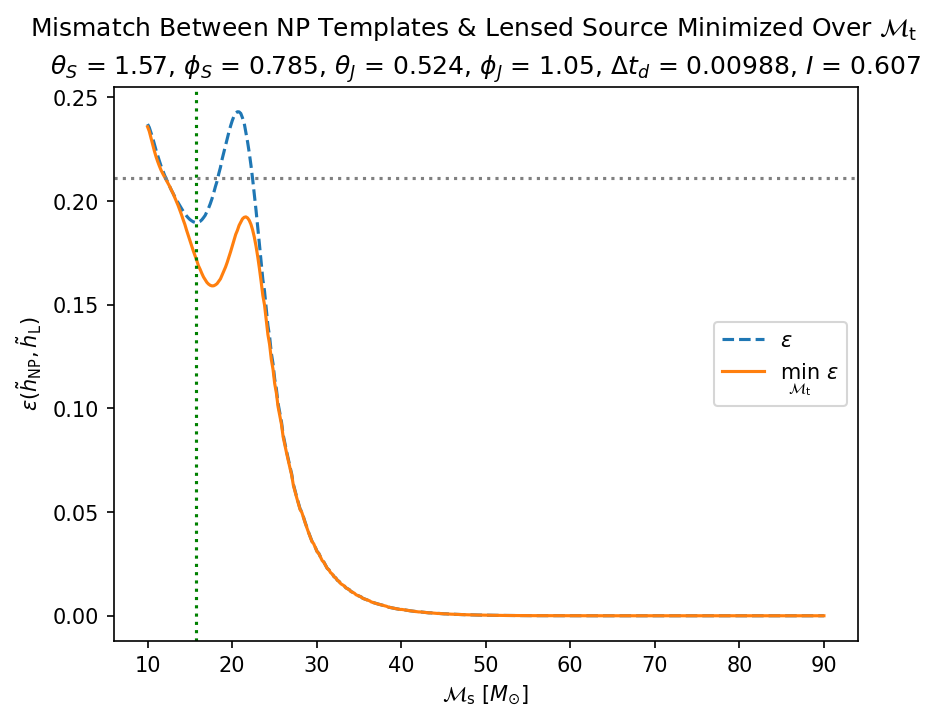

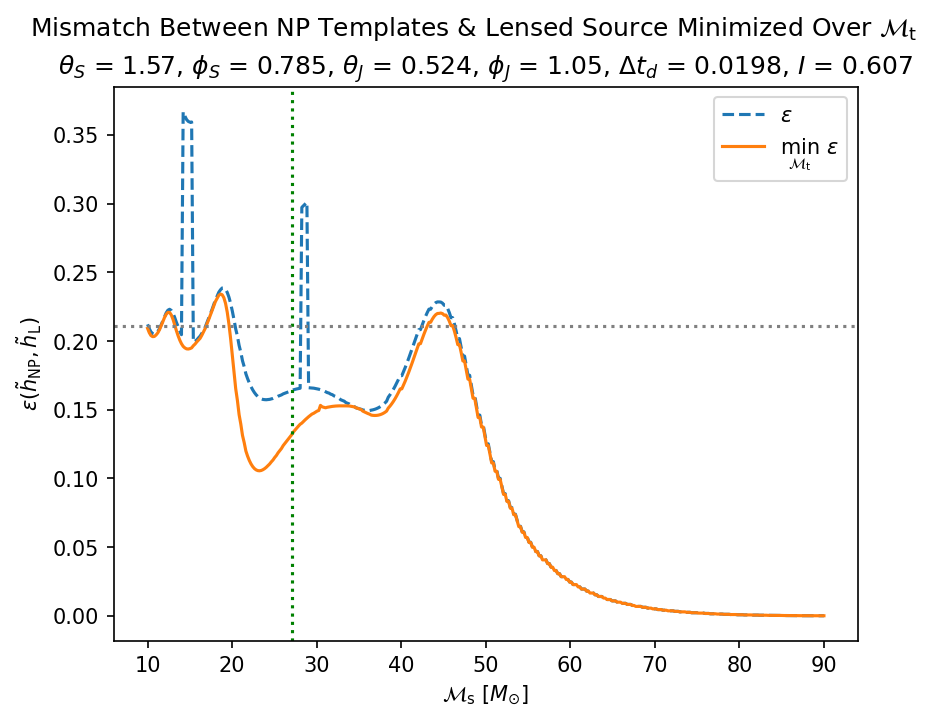

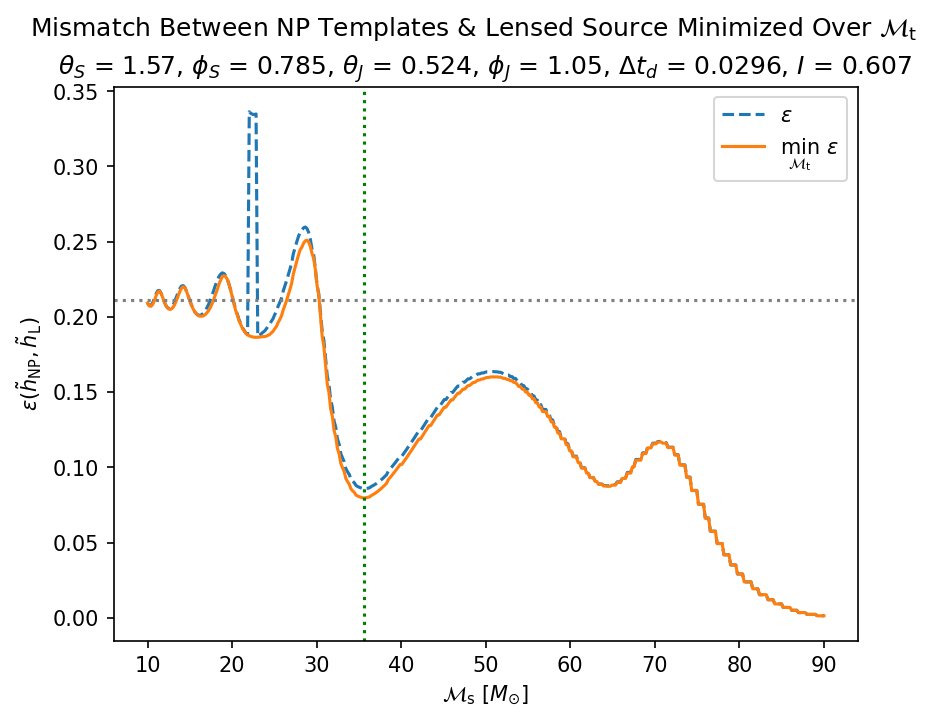

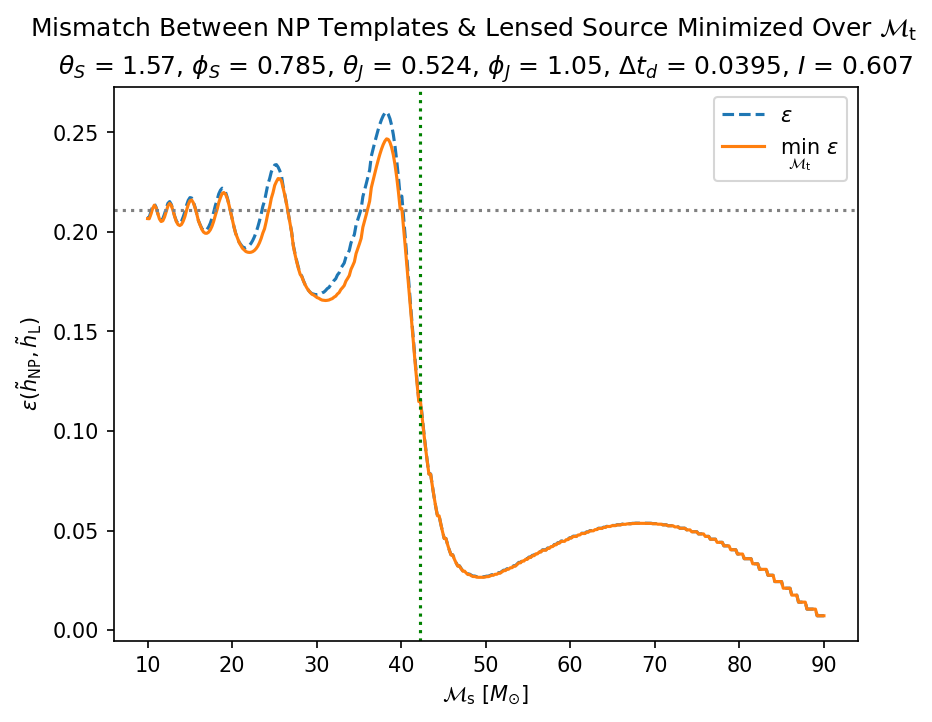

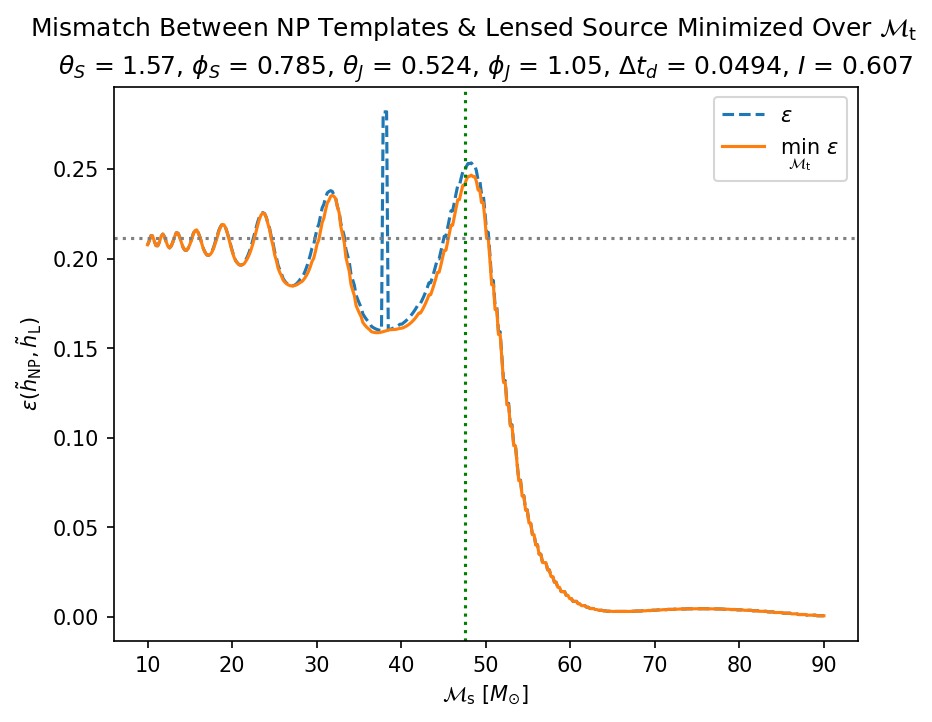

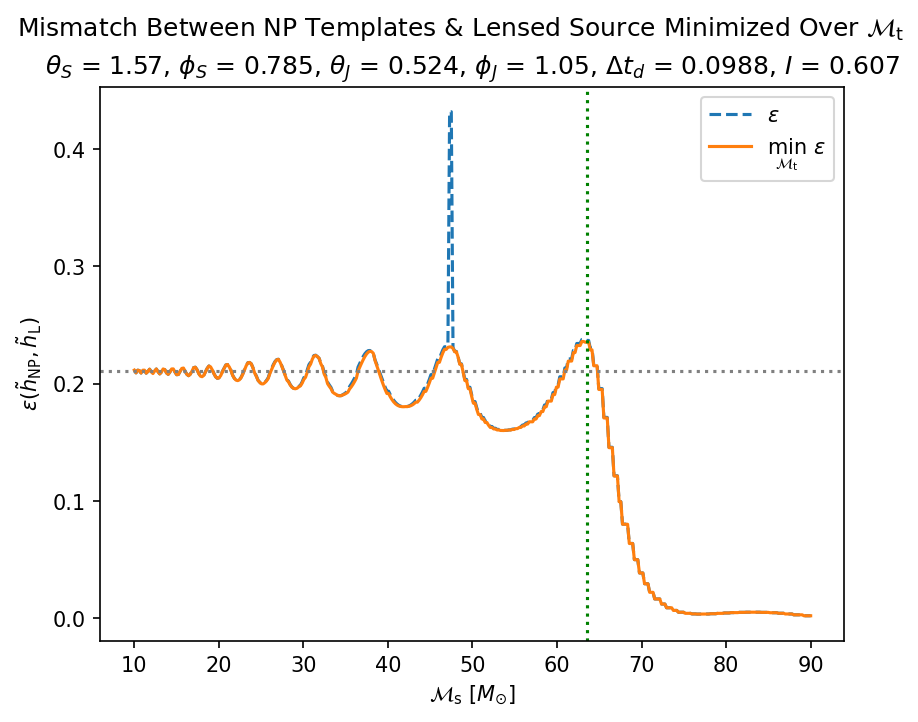

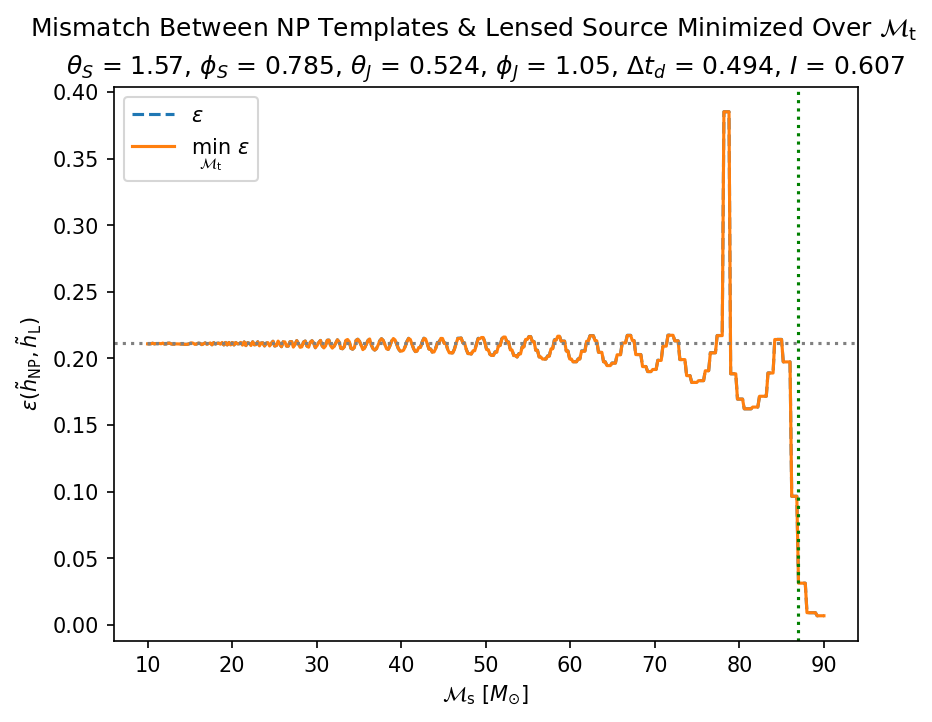

In [6]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

MLz_range = np.array([1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot(opt_match=True) # using optimized_mismatch
    plt.show()

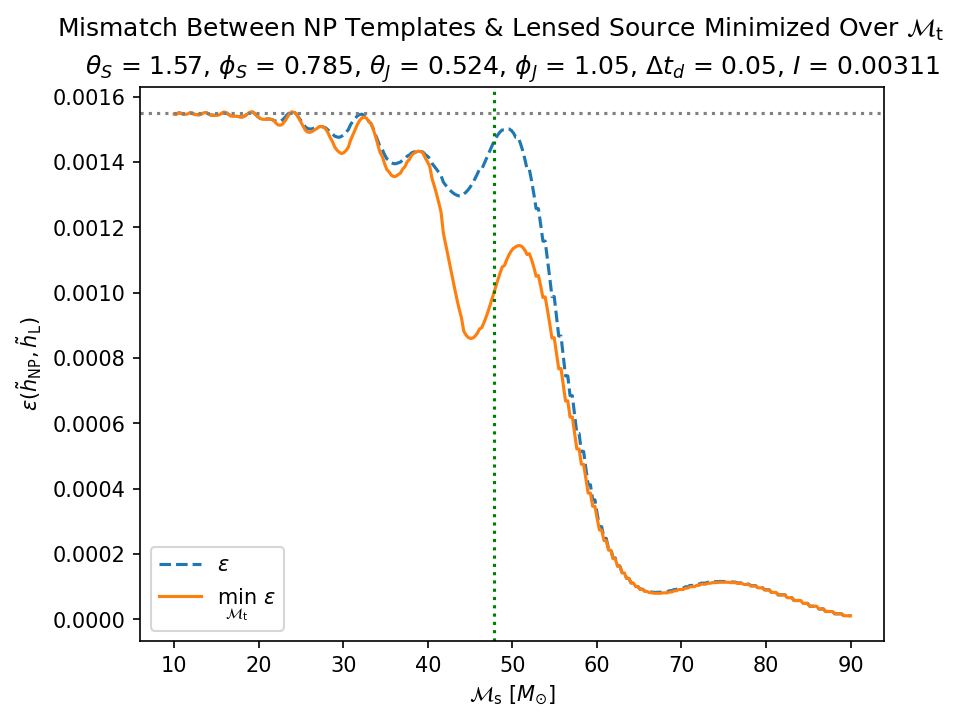

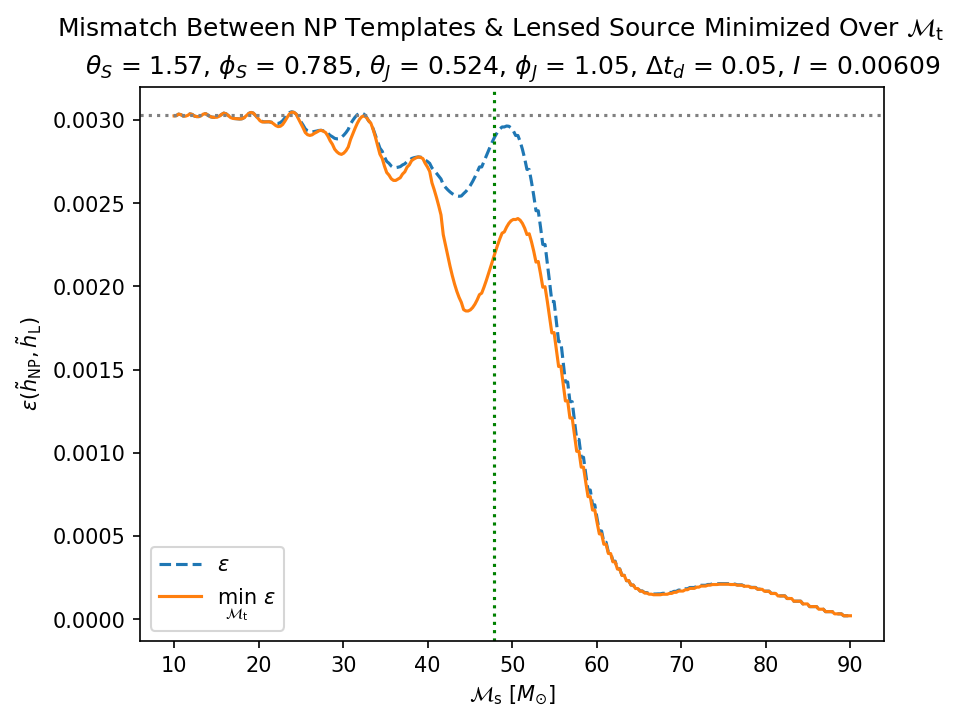

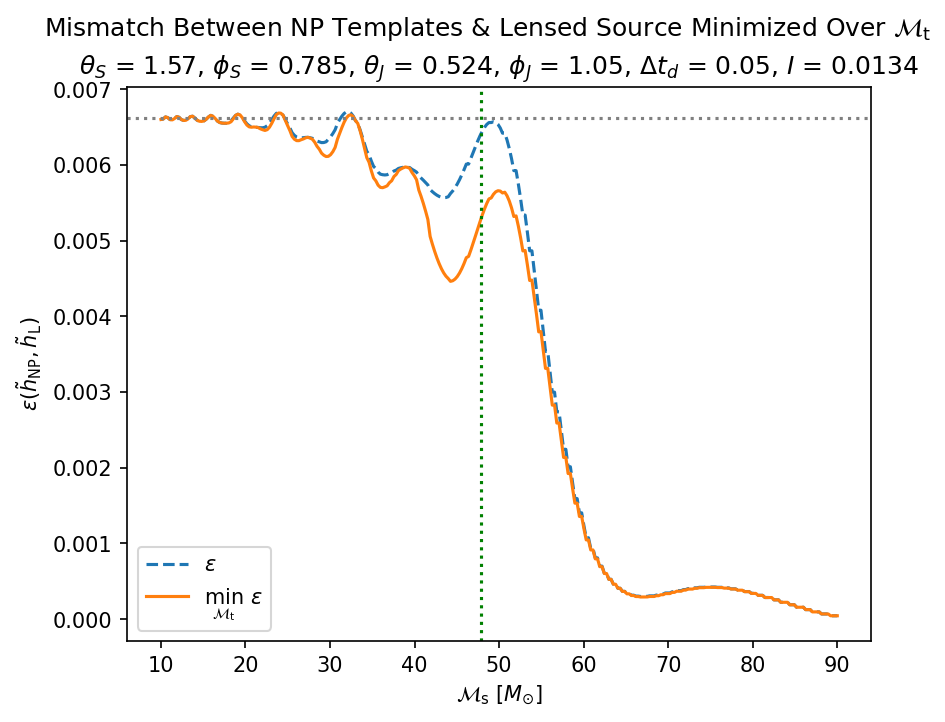

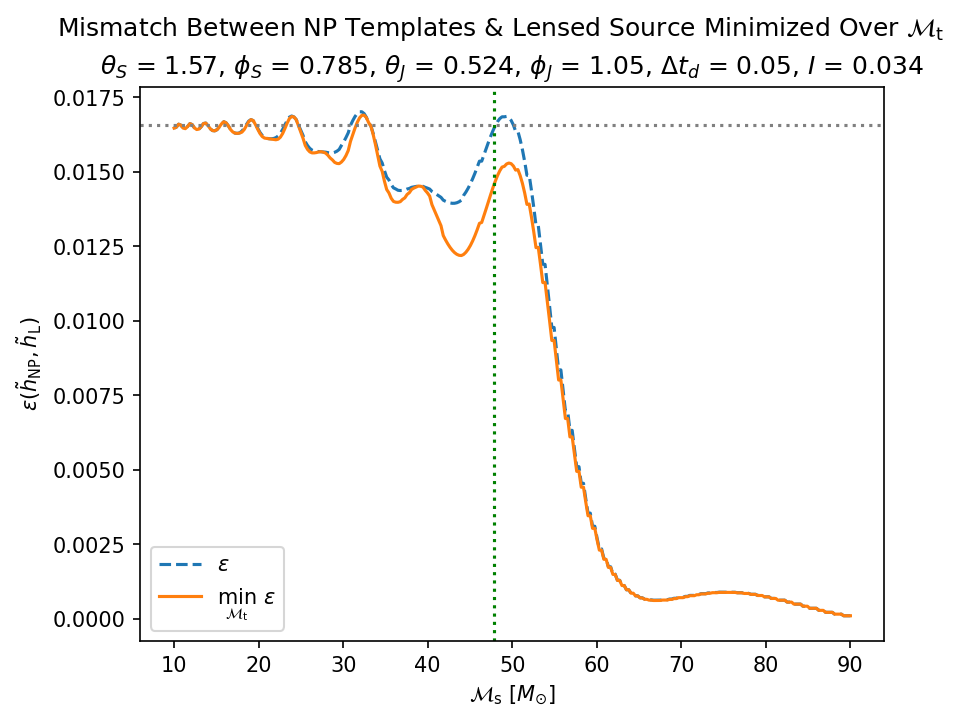

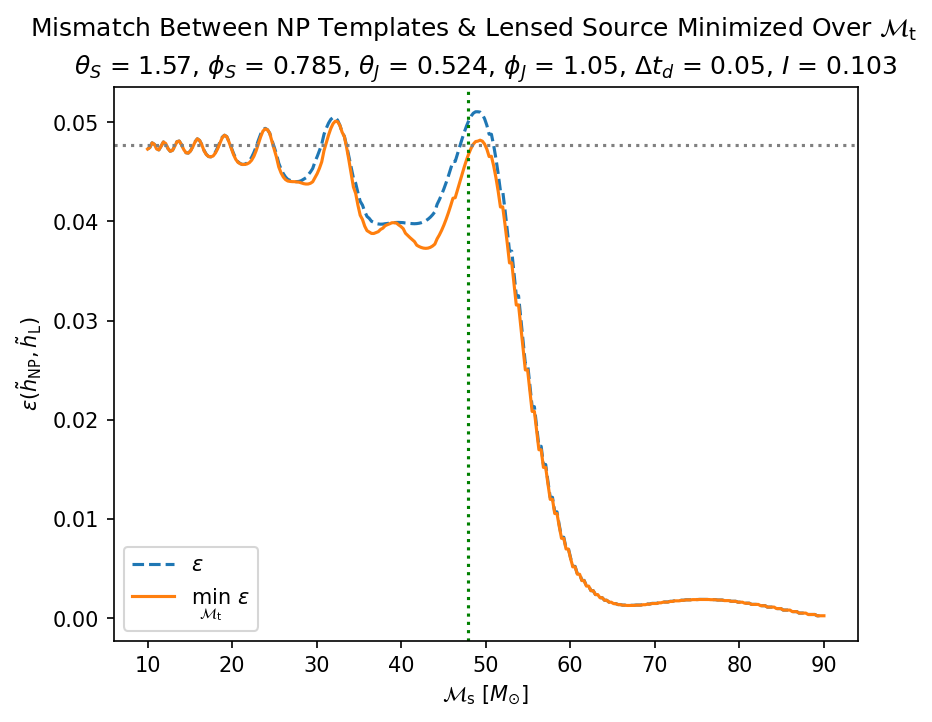

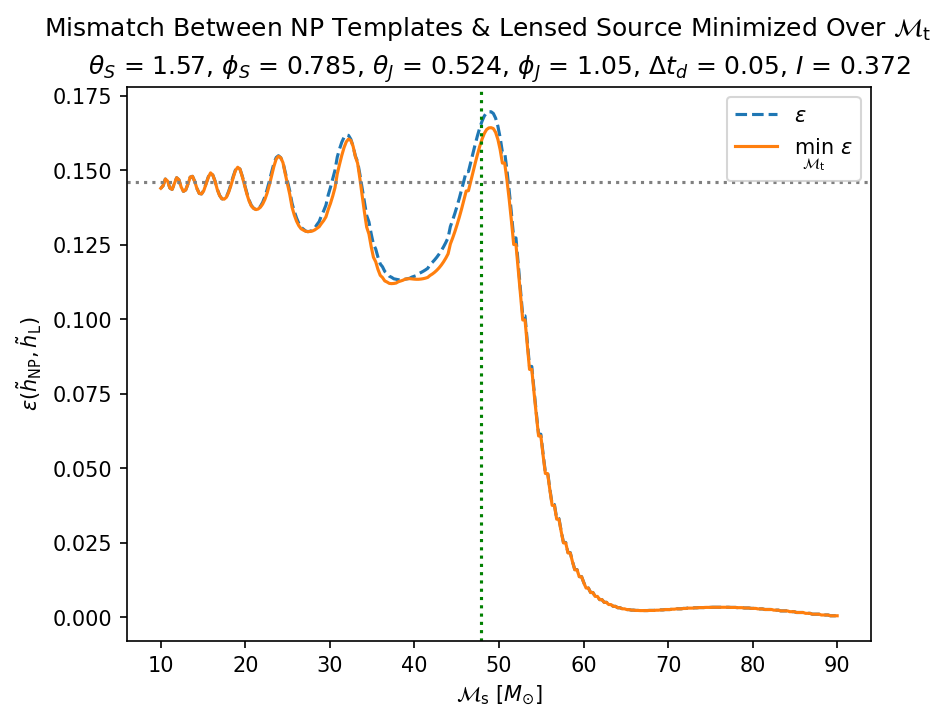

In [50]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 4, 6)
y_range = y_range[::-1]

time_delay = 0.05
MLz_range = get_MLz_from_time_delay(time_delay, y_range)

for i in range(len(MLz_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i] * solar_mass
    mismatch_plot(opt_match=True) # using optimized_mismatch
    plt.show()

### using `mismatch_general` with resizing

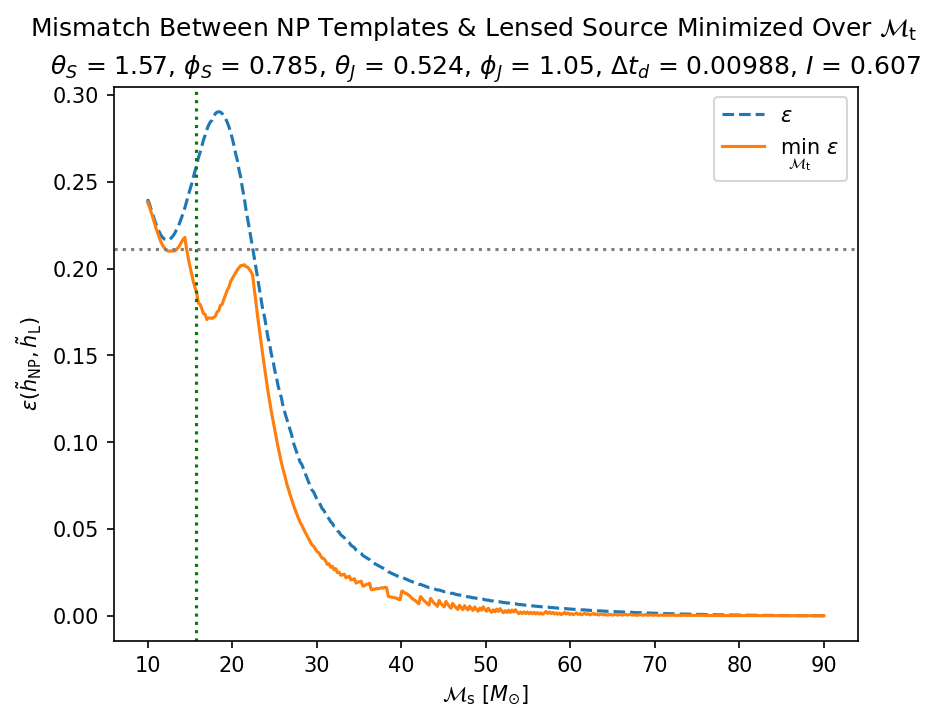

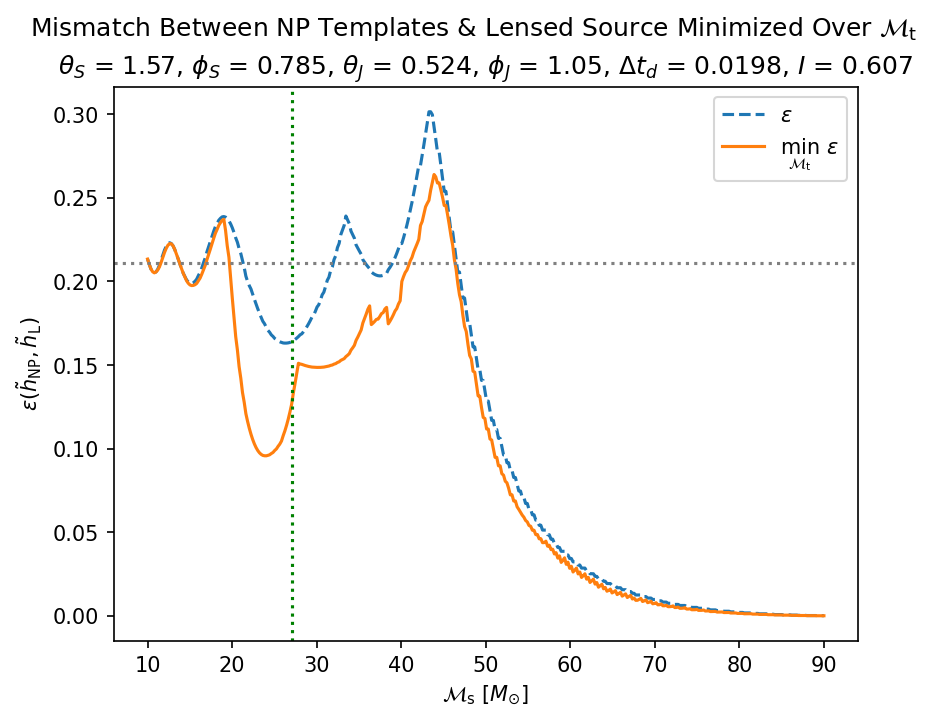

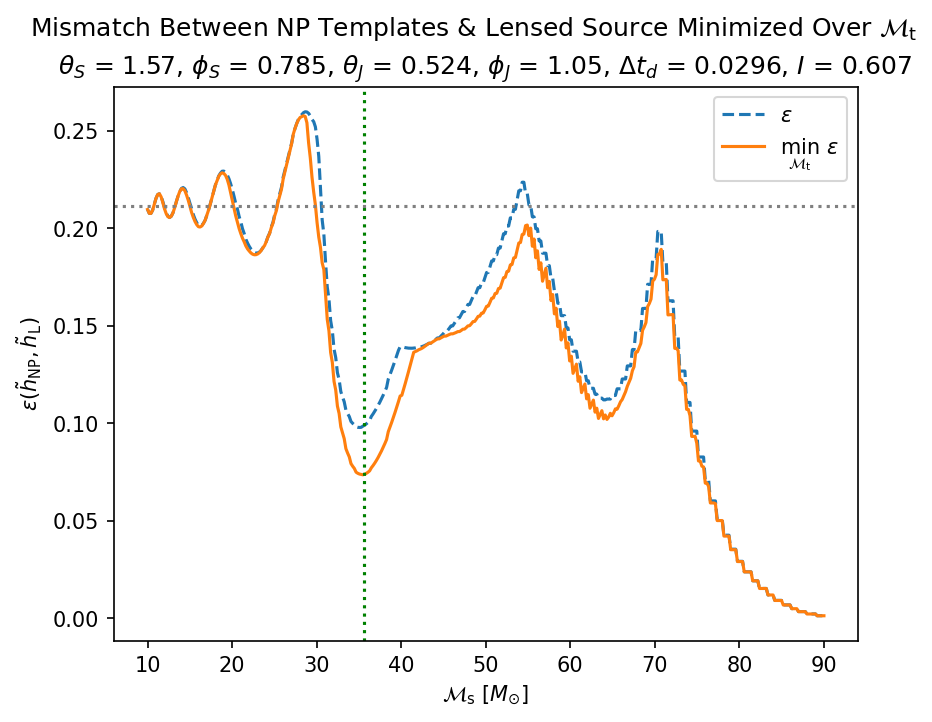

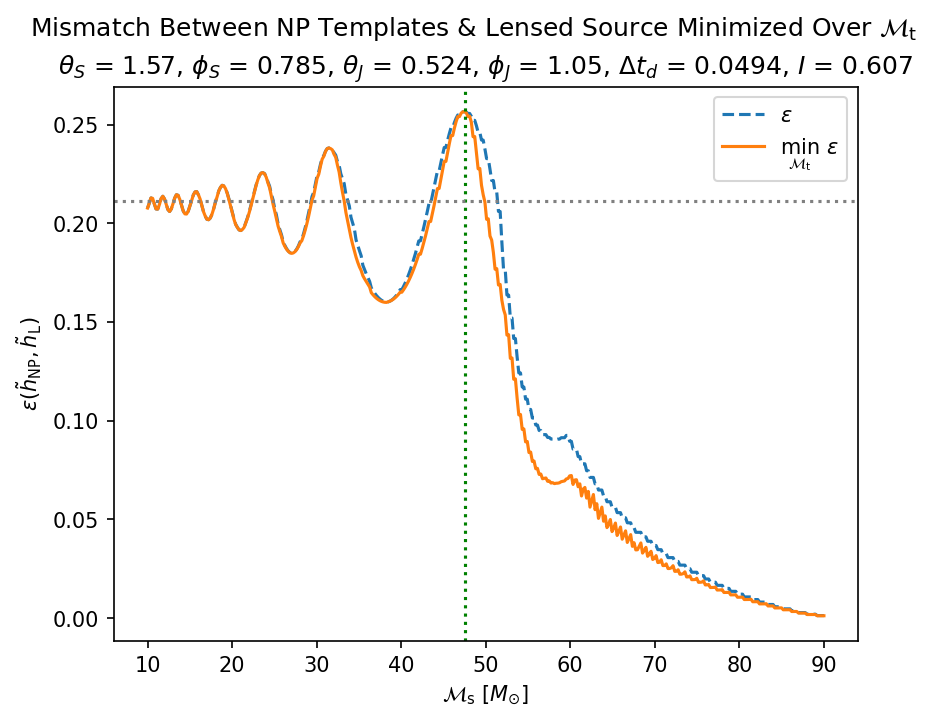

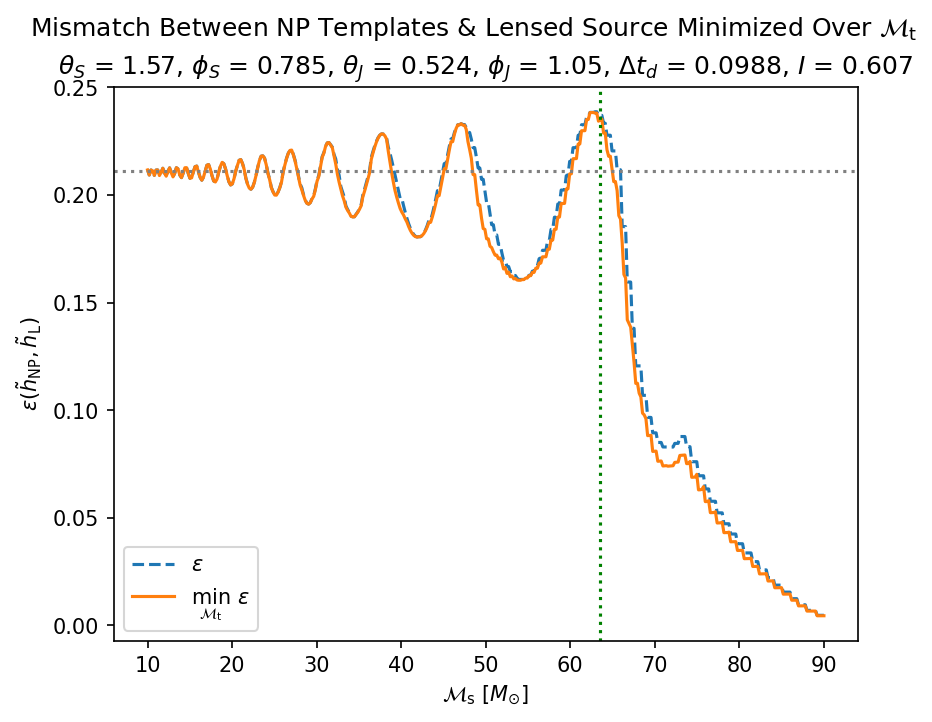

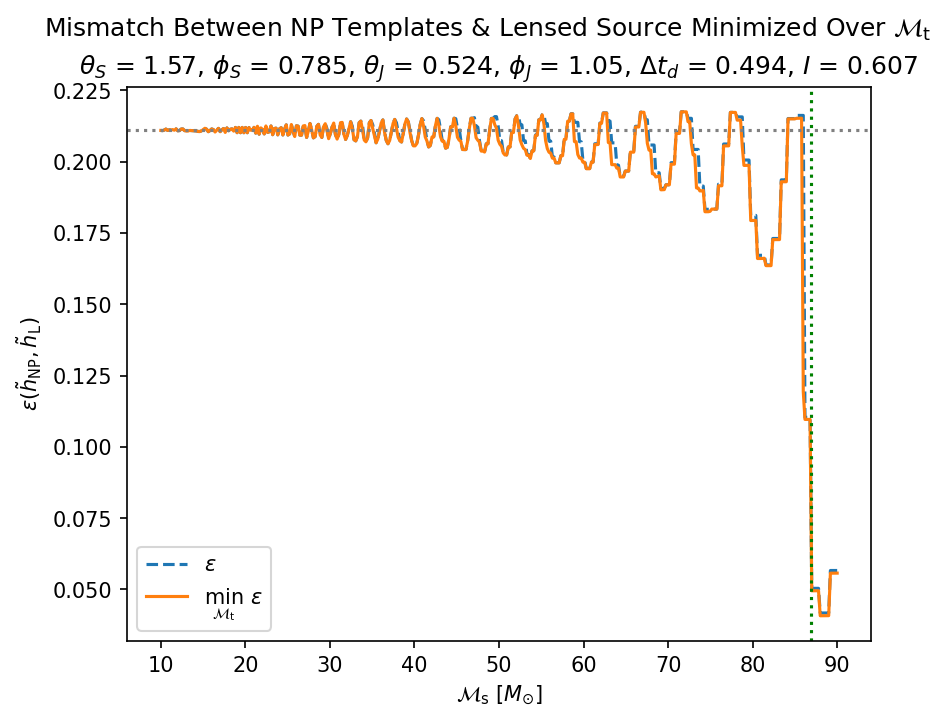

In [12]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

MLz_range = np.array([1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_general(opt_match=False) # NOT using optimized_mismatch
    plt.show()

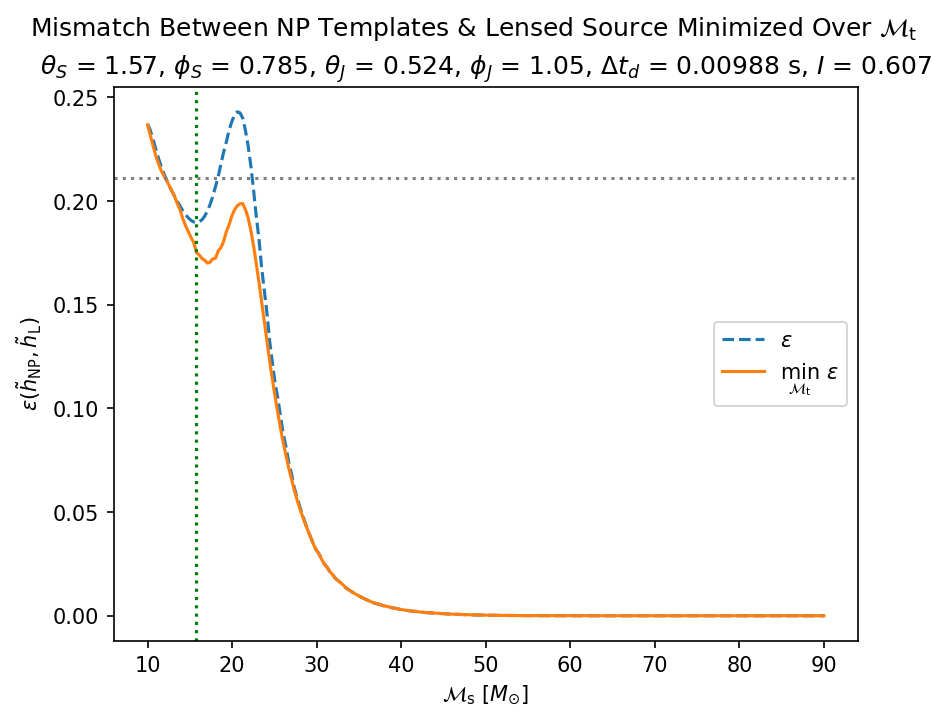

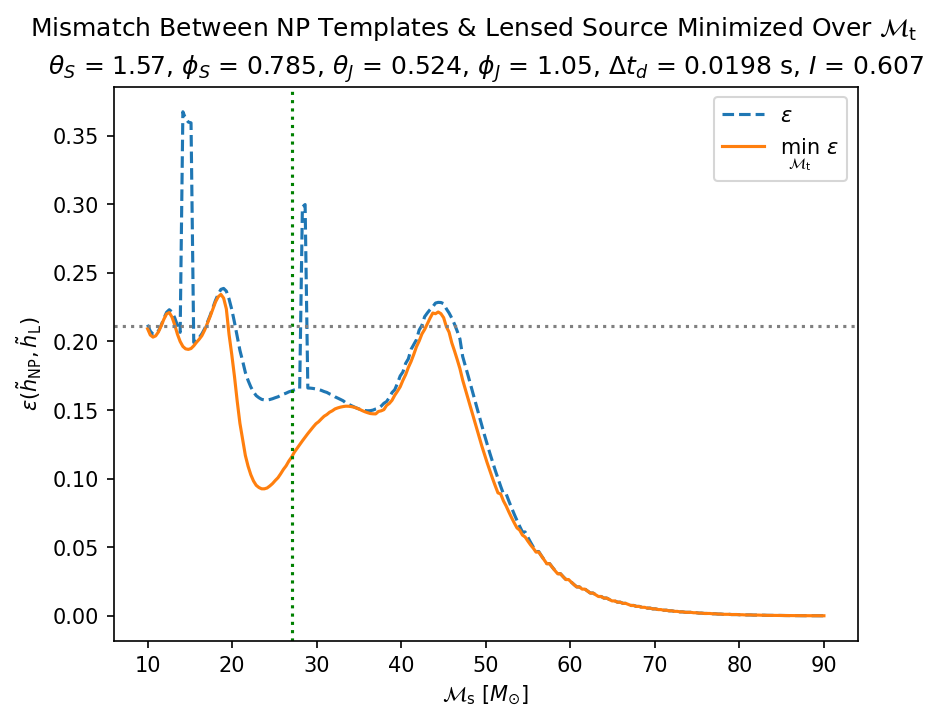

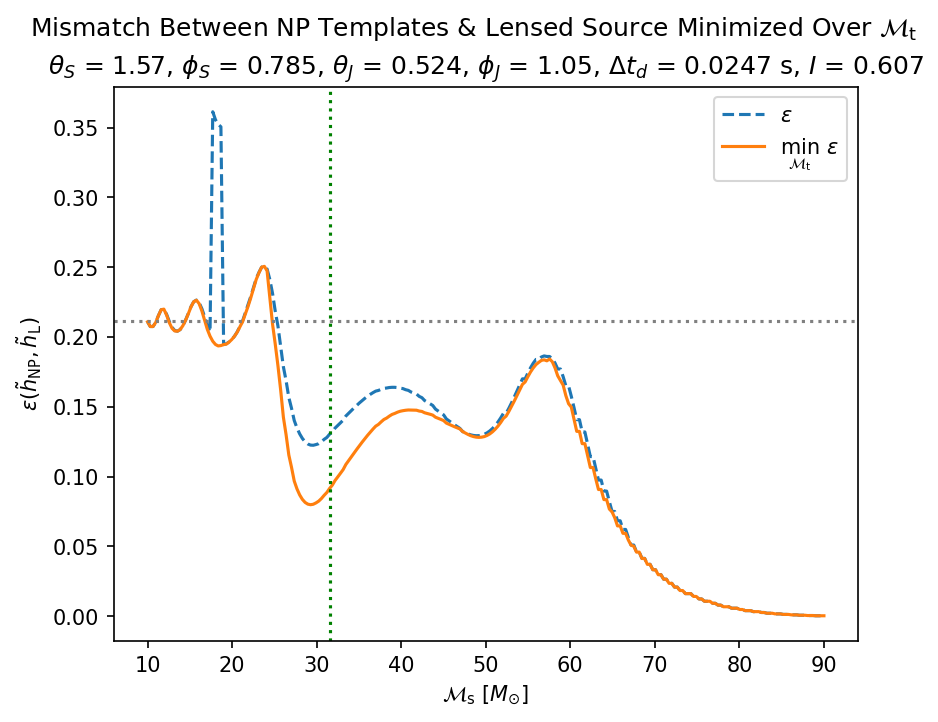

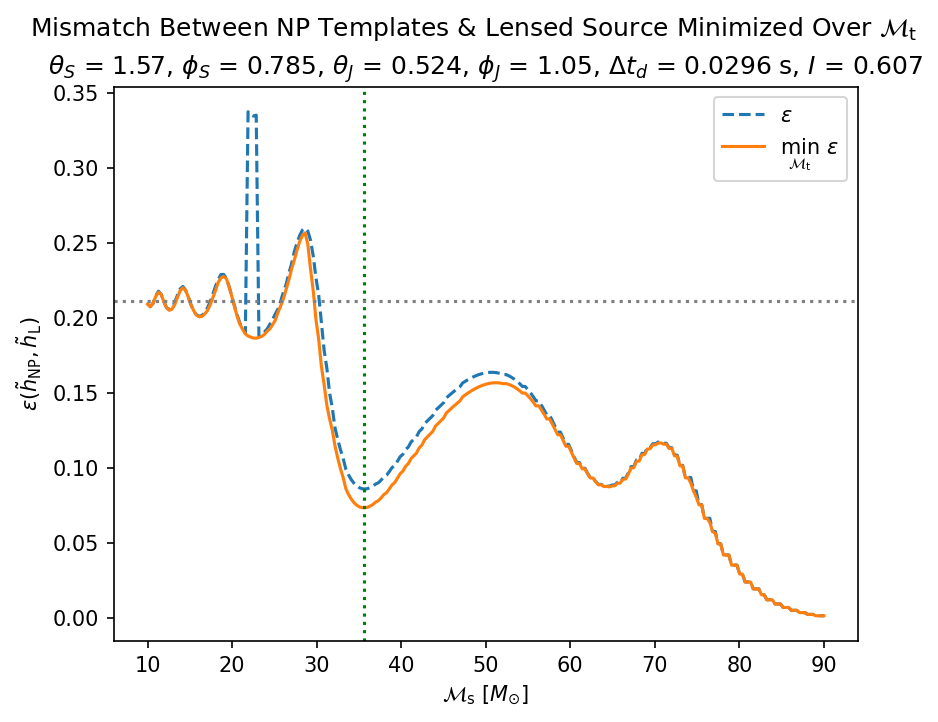

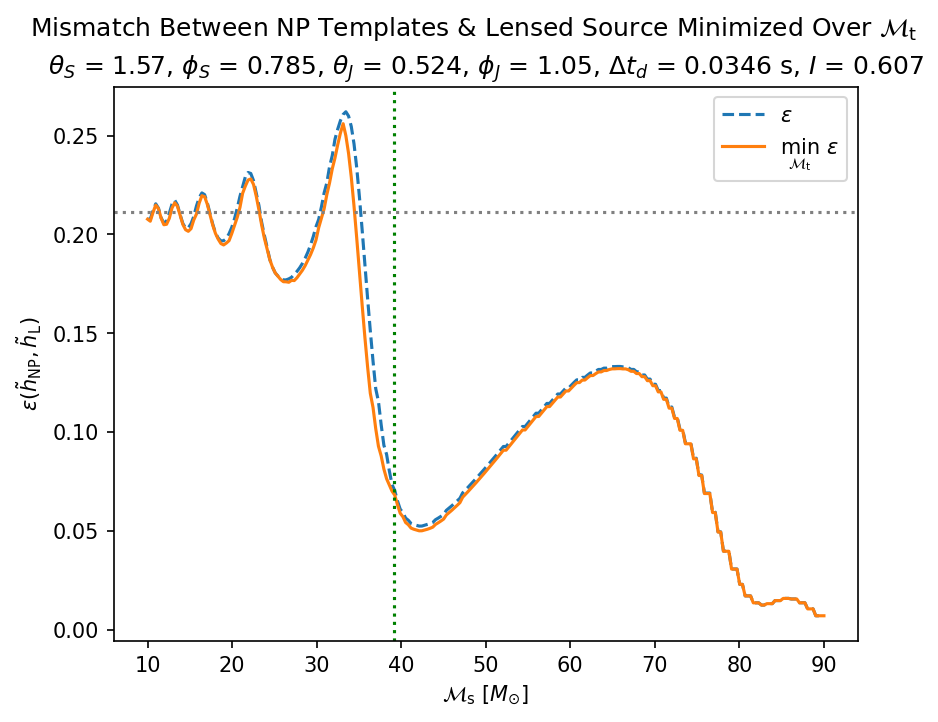

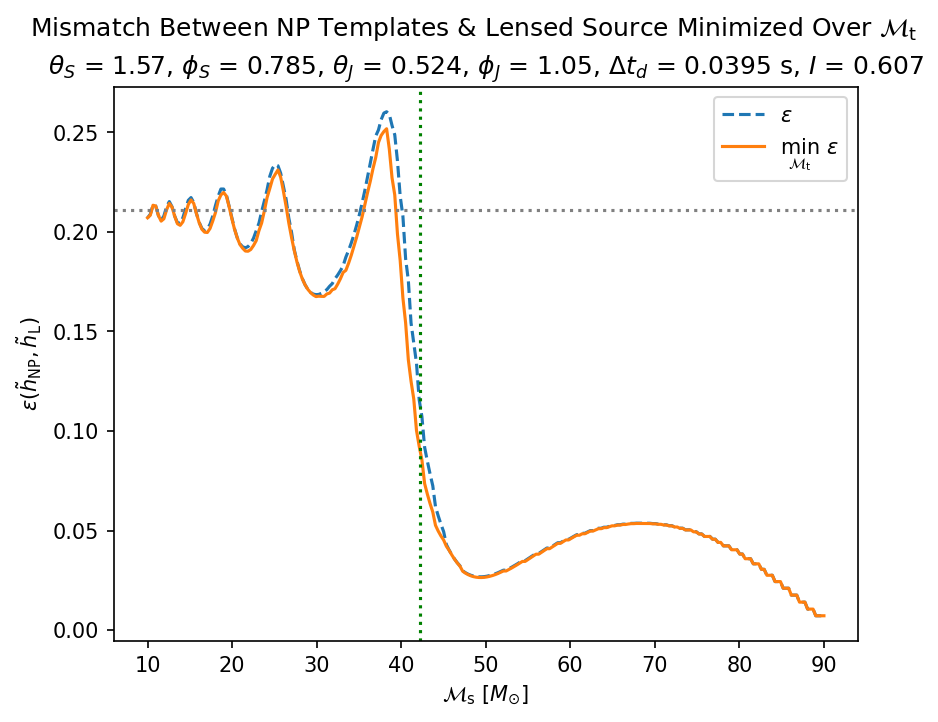

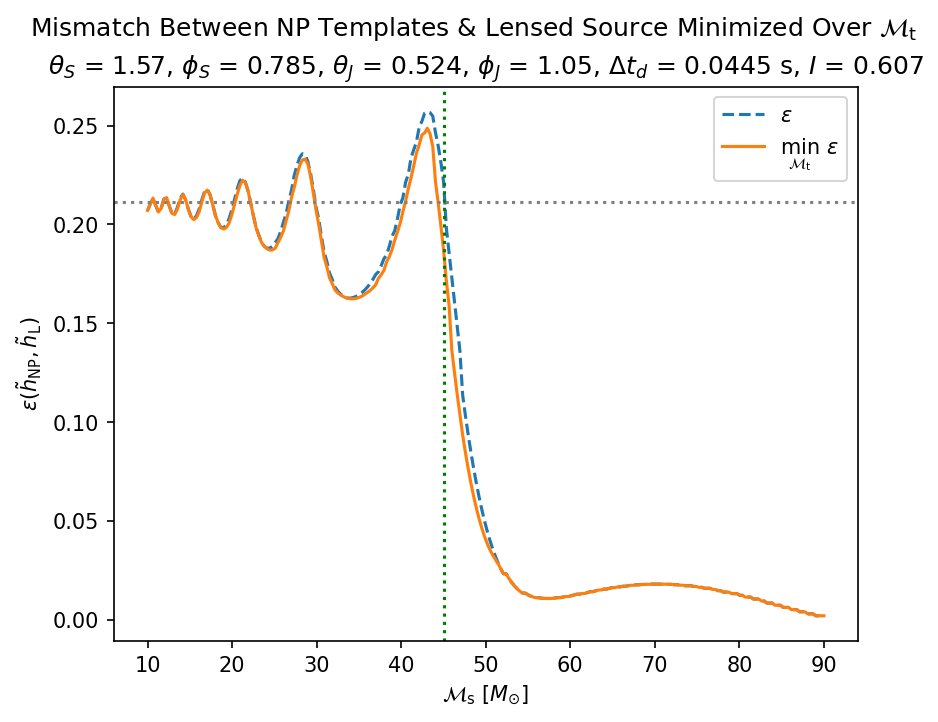

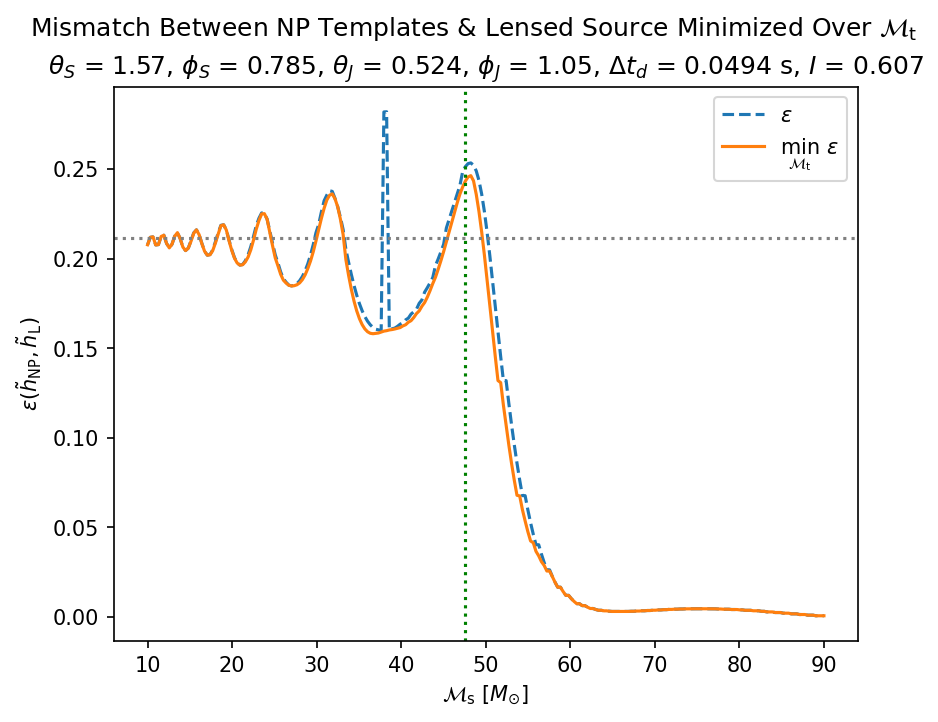

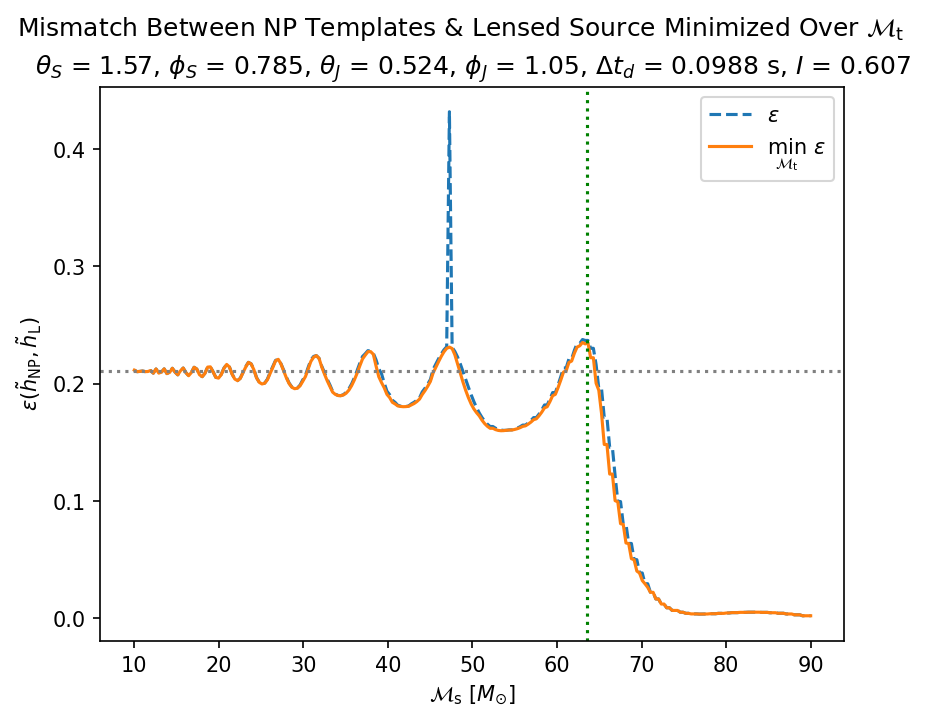

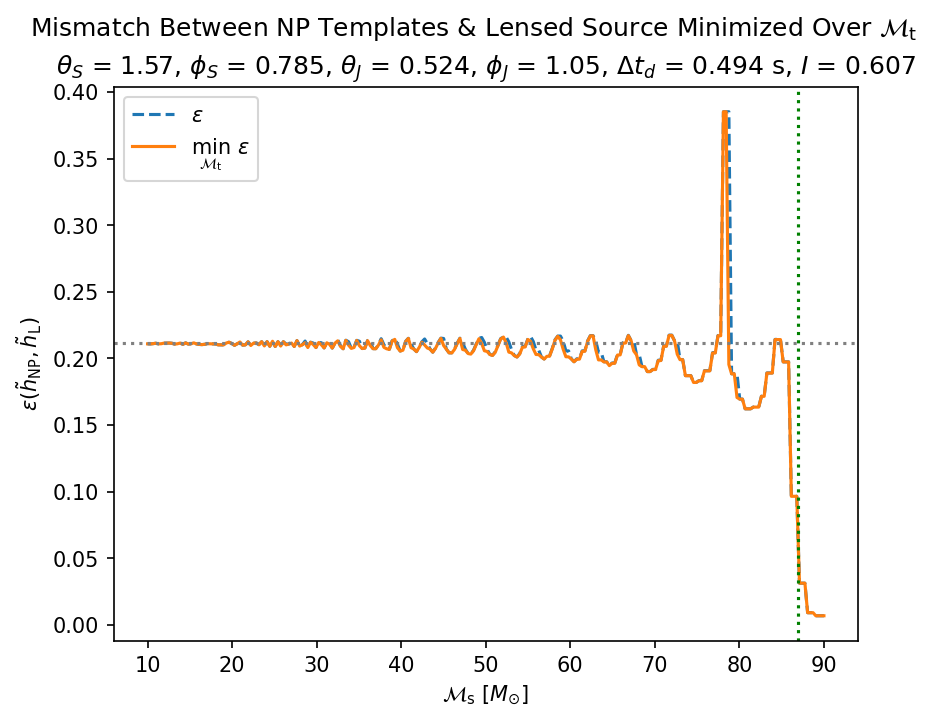

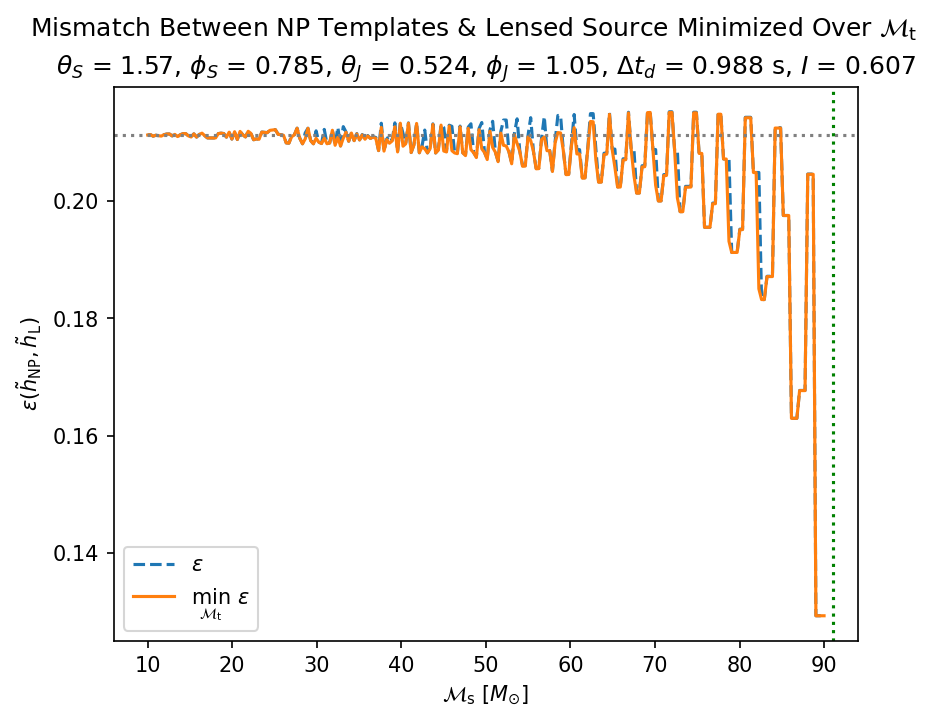

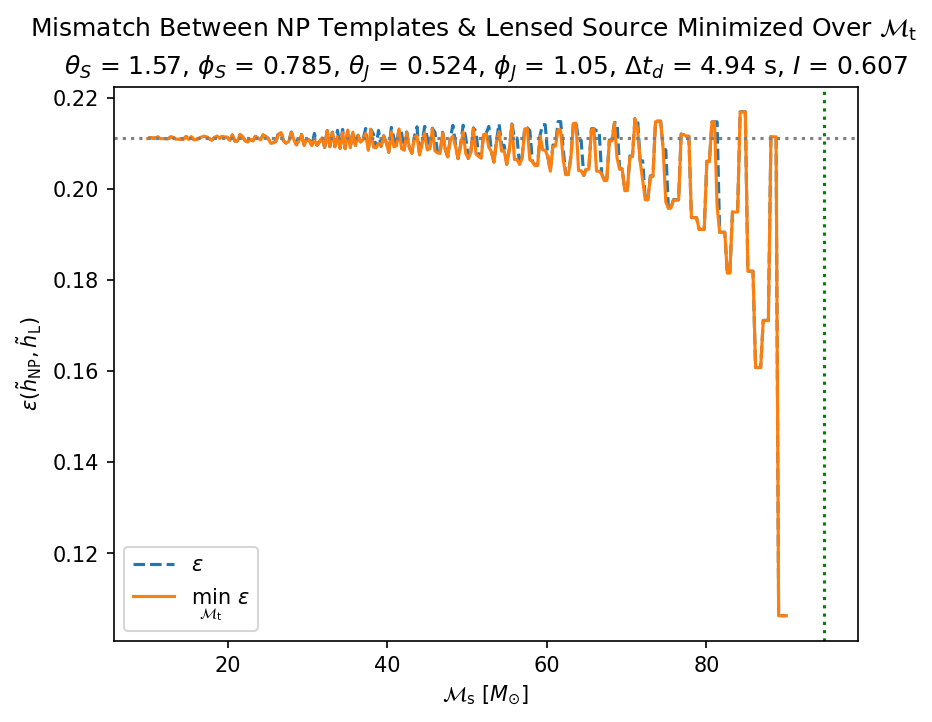

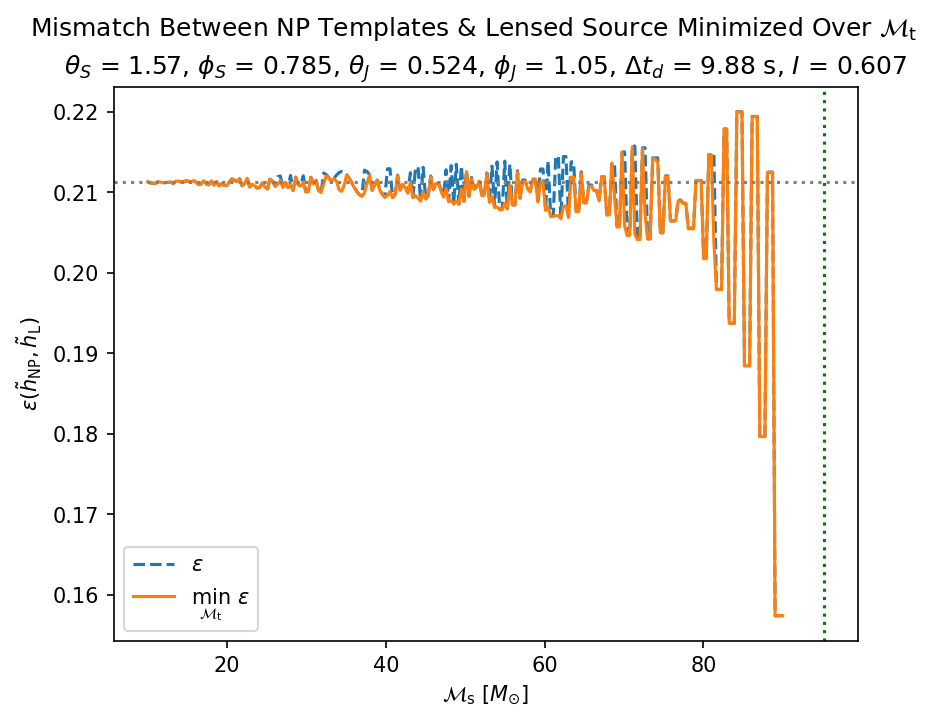

In [36]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 4500, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_general(opt_match=True) # using optimized_mismatch
    plt.show()

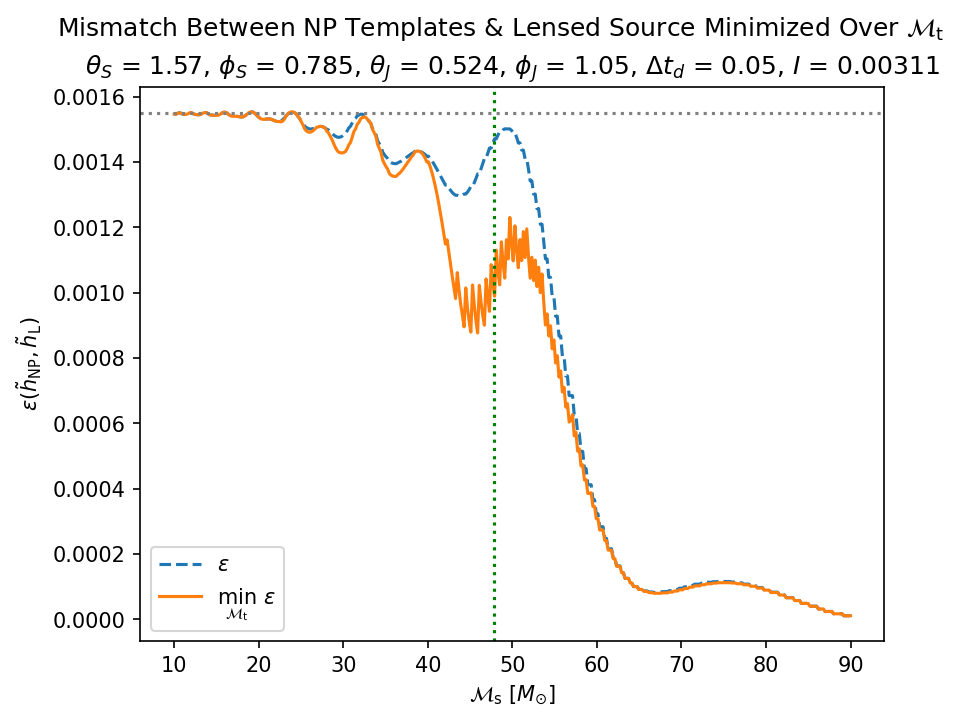

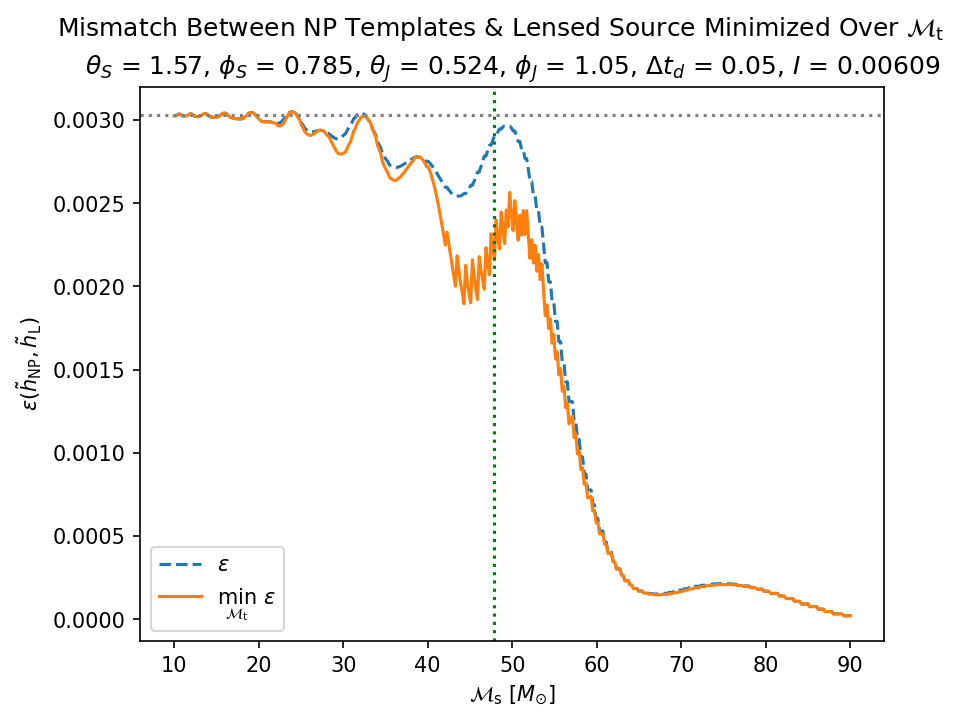

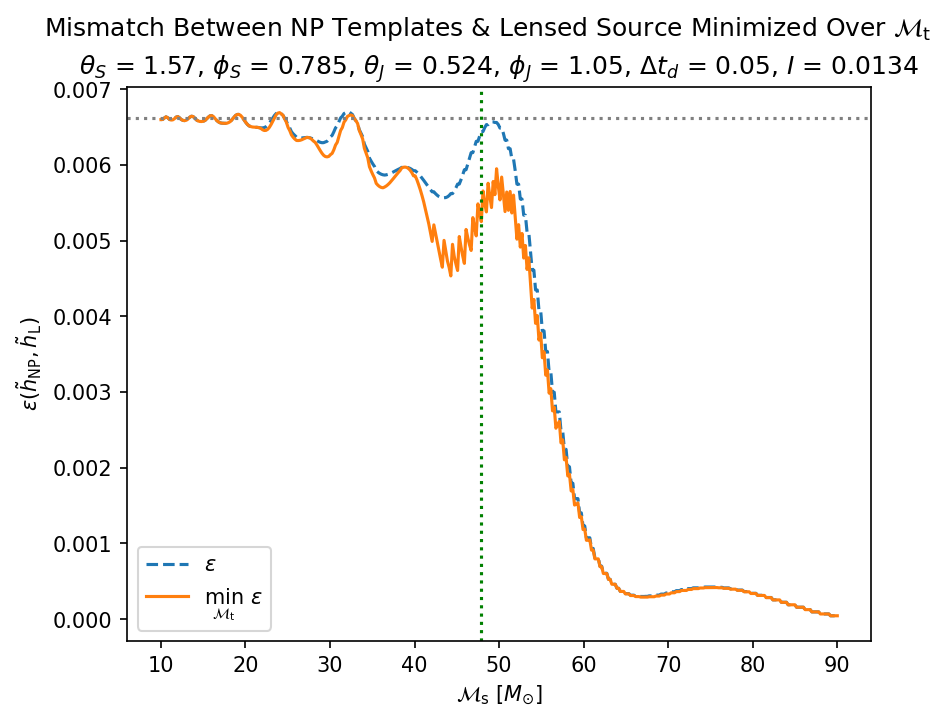

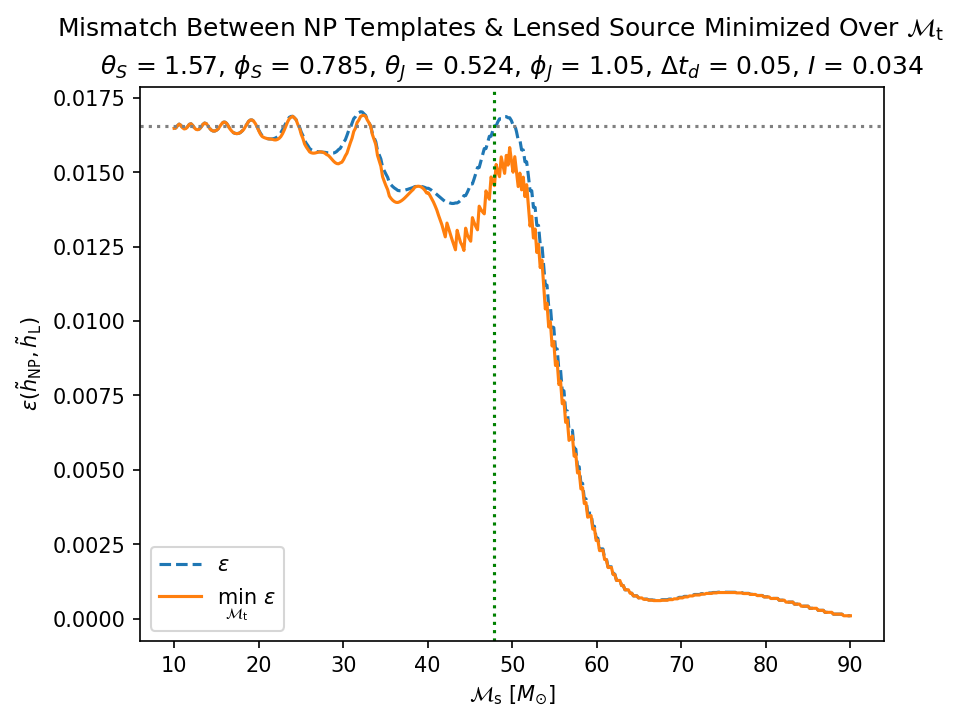

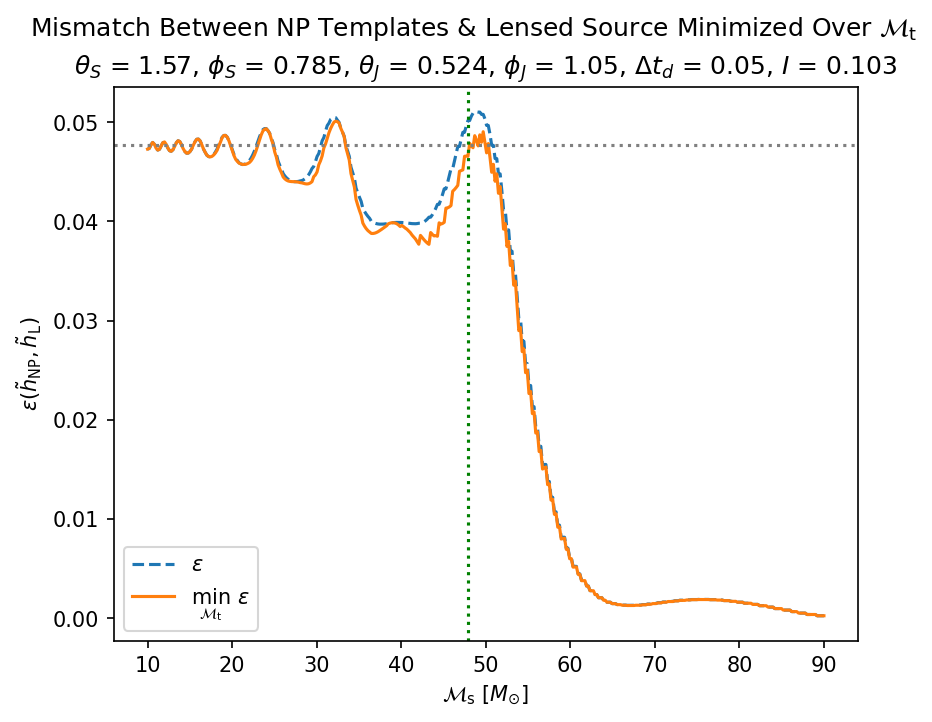

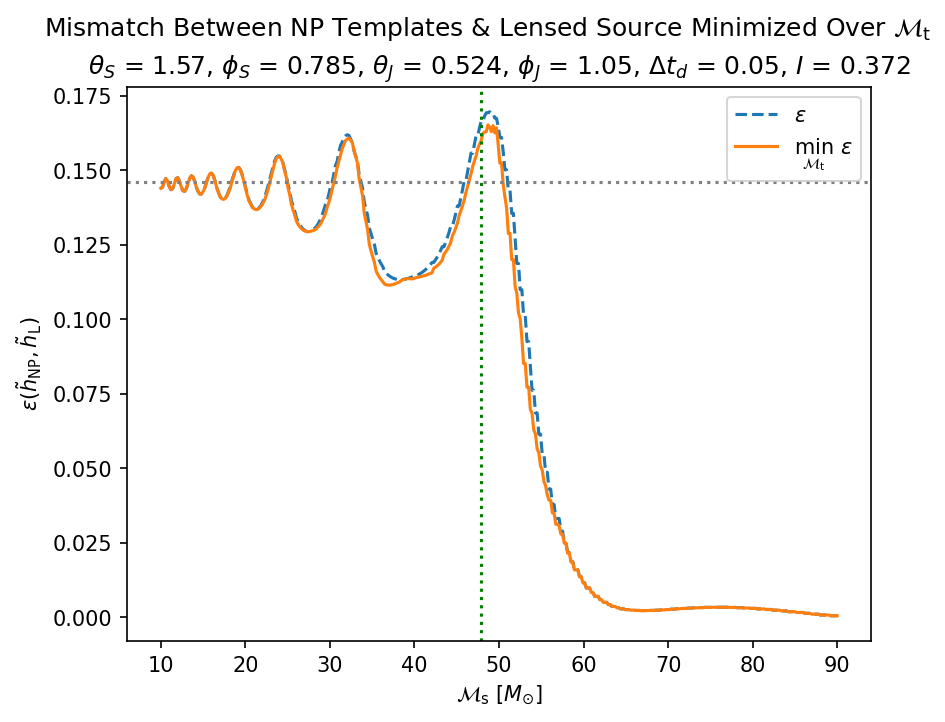

In [11]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 4, 6)
y_range = y_range[::-1]

time_delay = 0.05
MLz_range = get_MLz_from_time_delay(time_delay, y_range)

for i in range(len(MLz_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i] * solar_mass
    mismatch_plot_general(opt_match=True) # using optimized_mismatch
    plt.show()

### using `mismatch_general_slice` with slicing

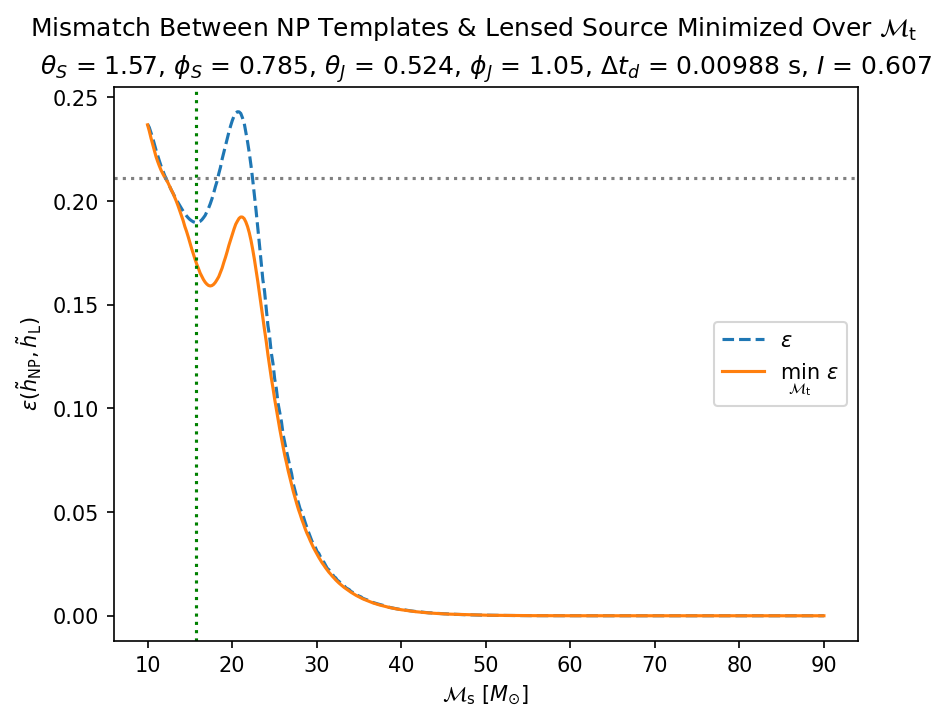

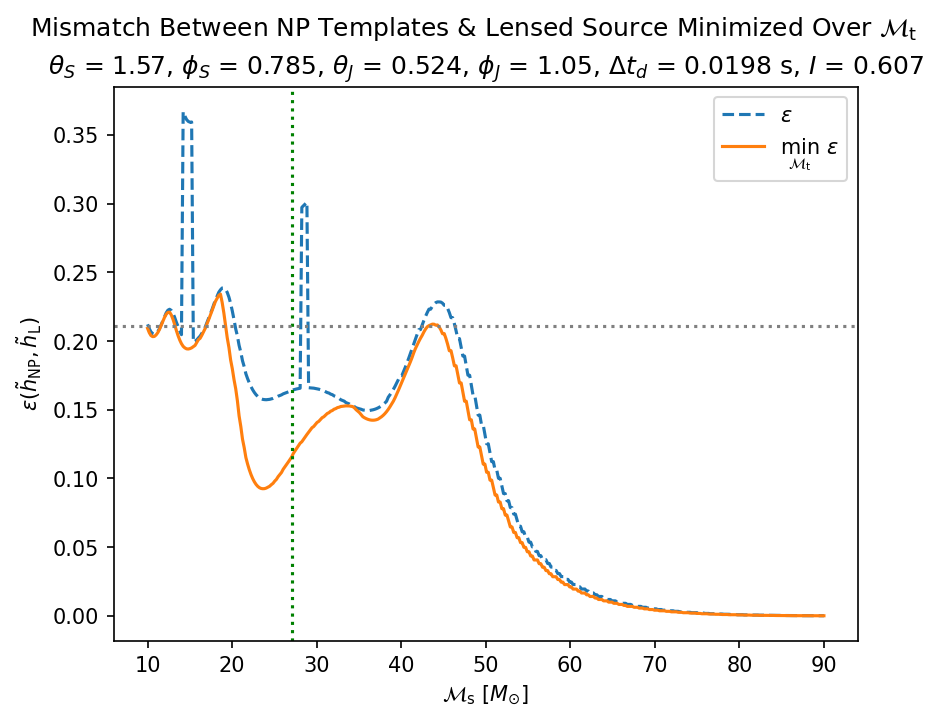

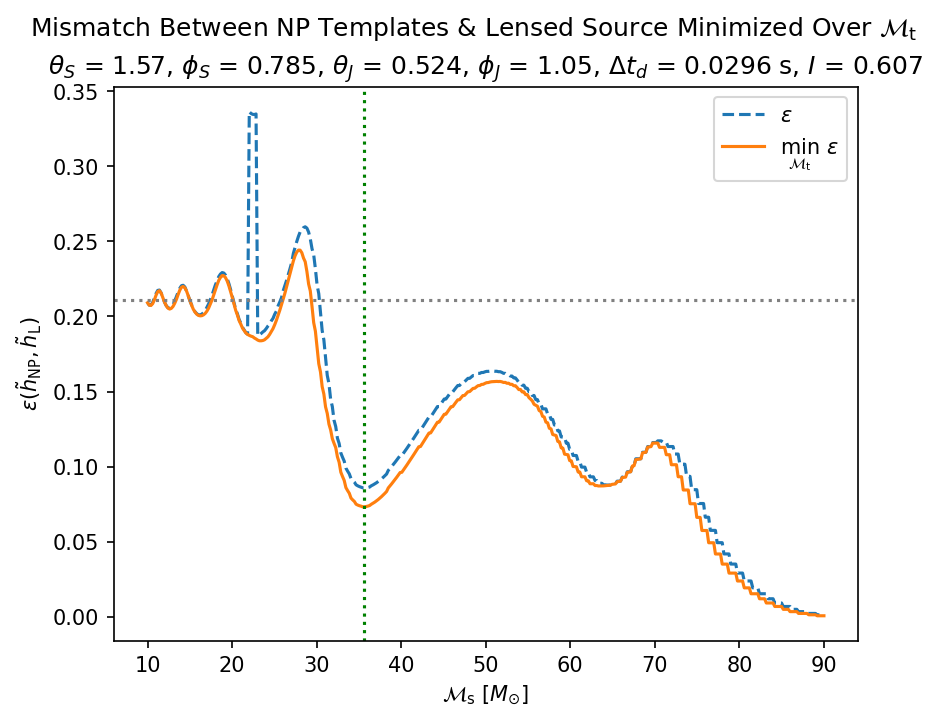

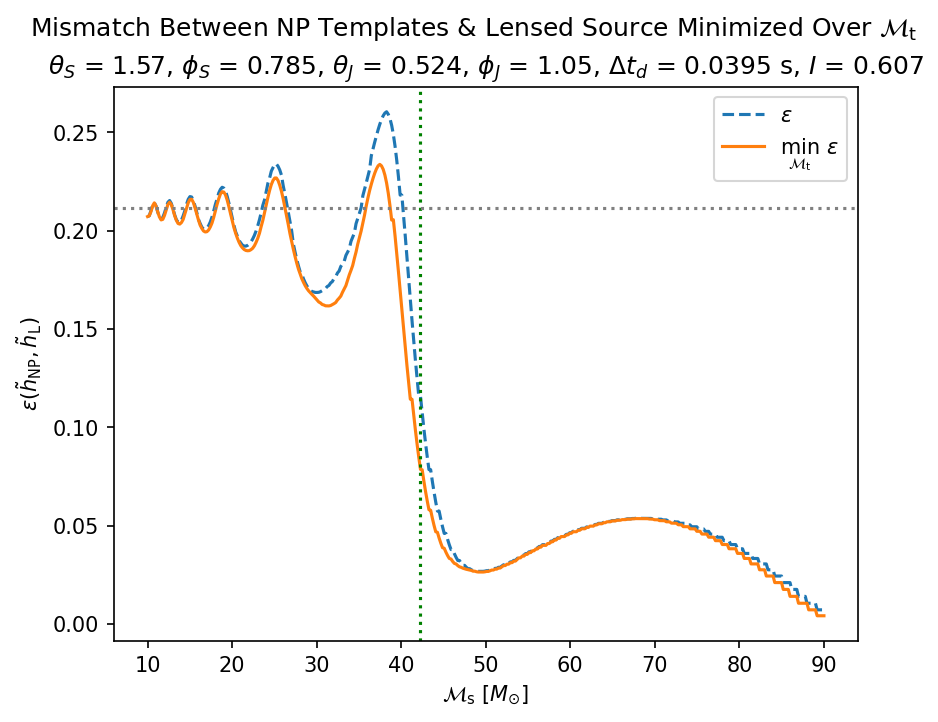

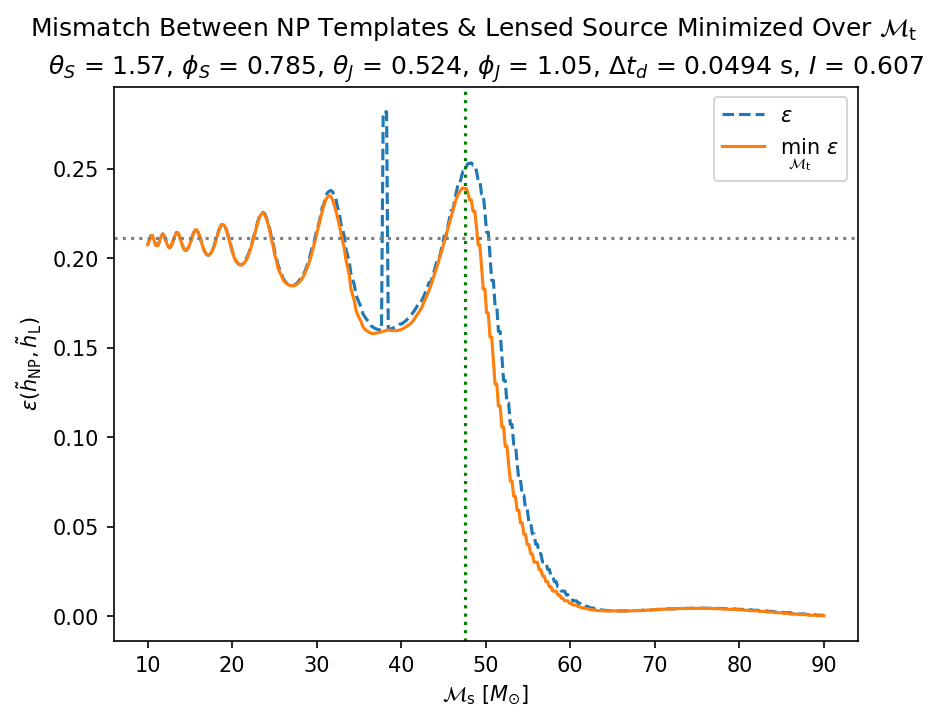

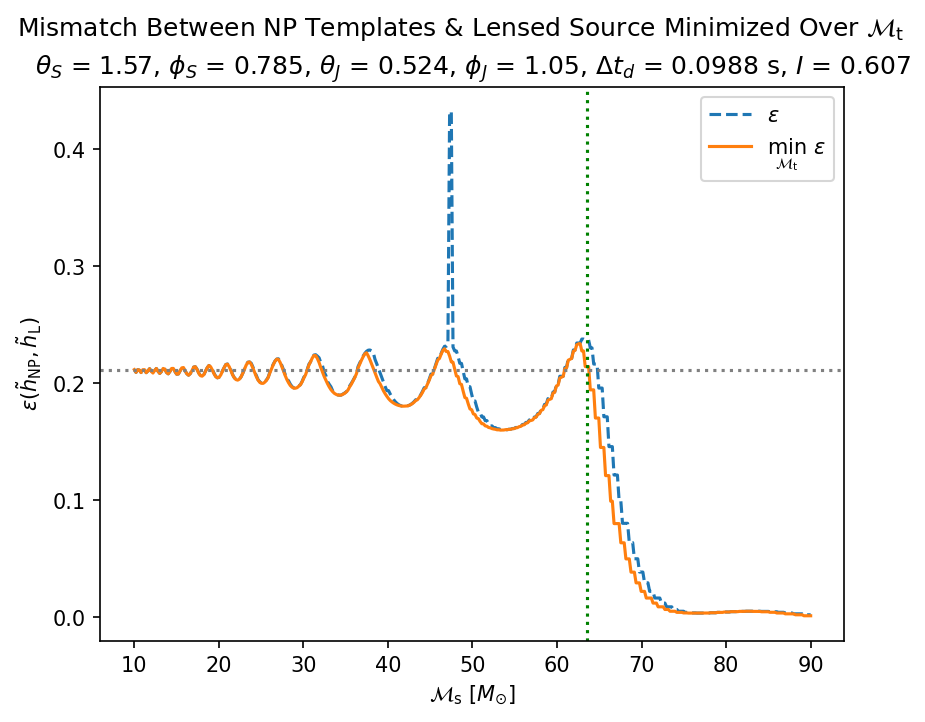

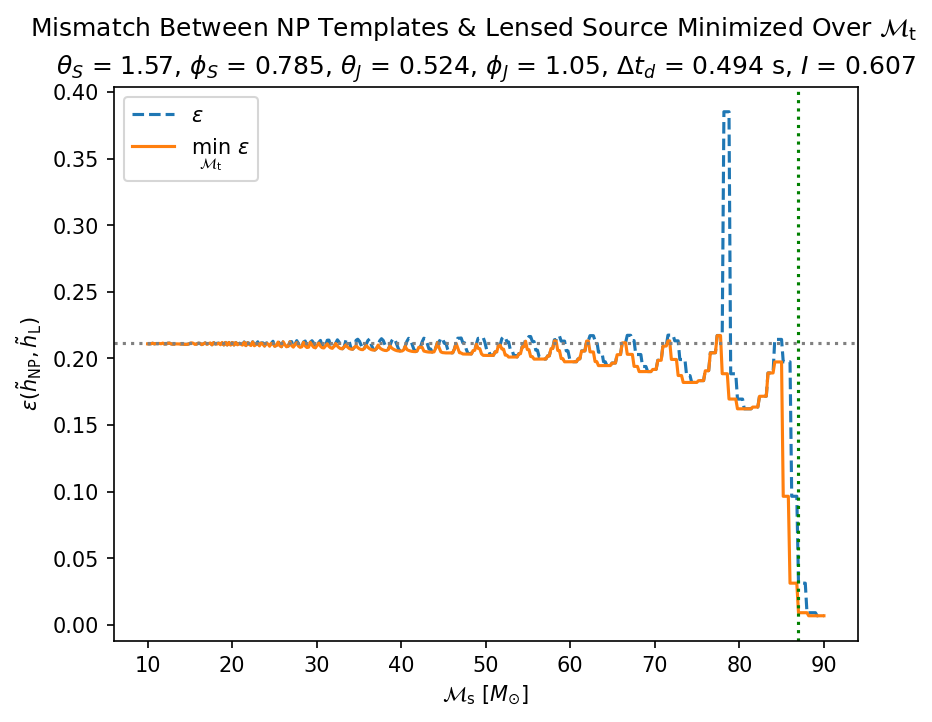

In [10]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

MLz_range = np.array([1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_general_slice(opt_match=True)
    plt.show()

### using `mismatch_general_psd` with flat psd

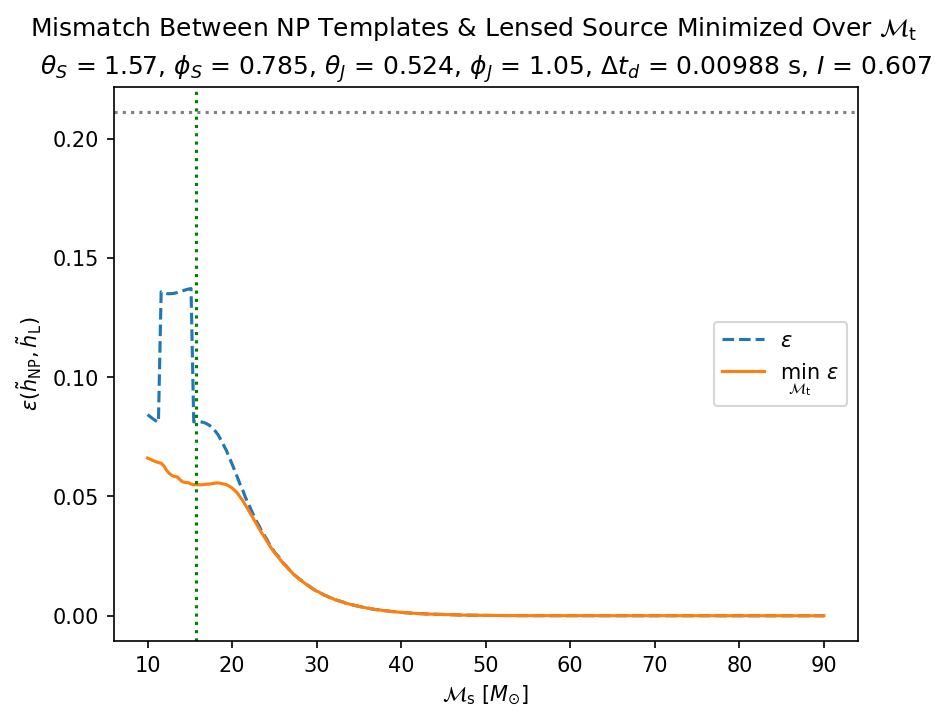

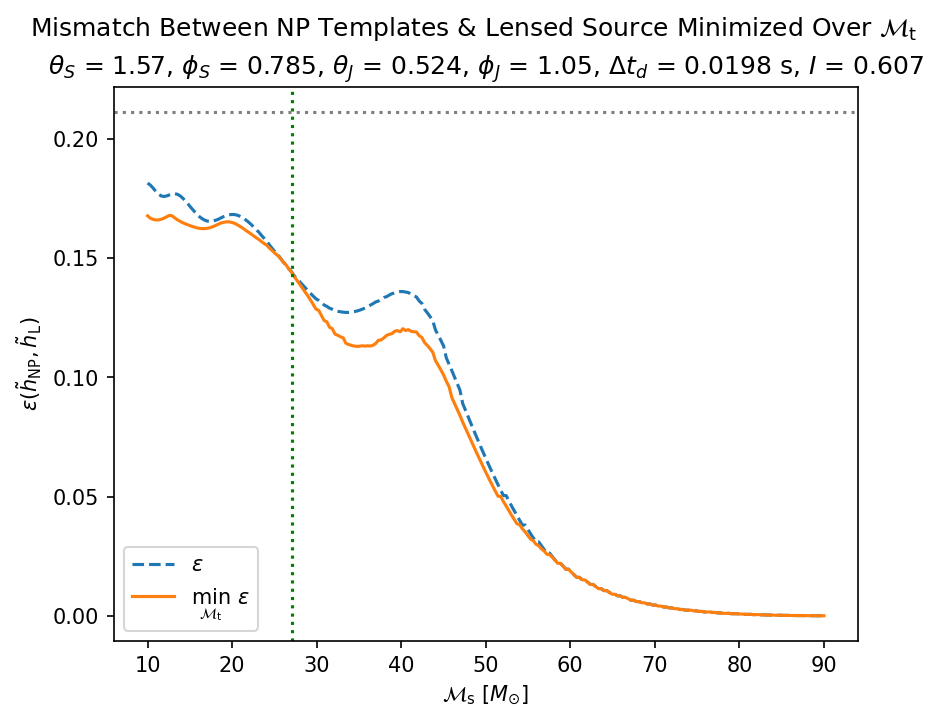

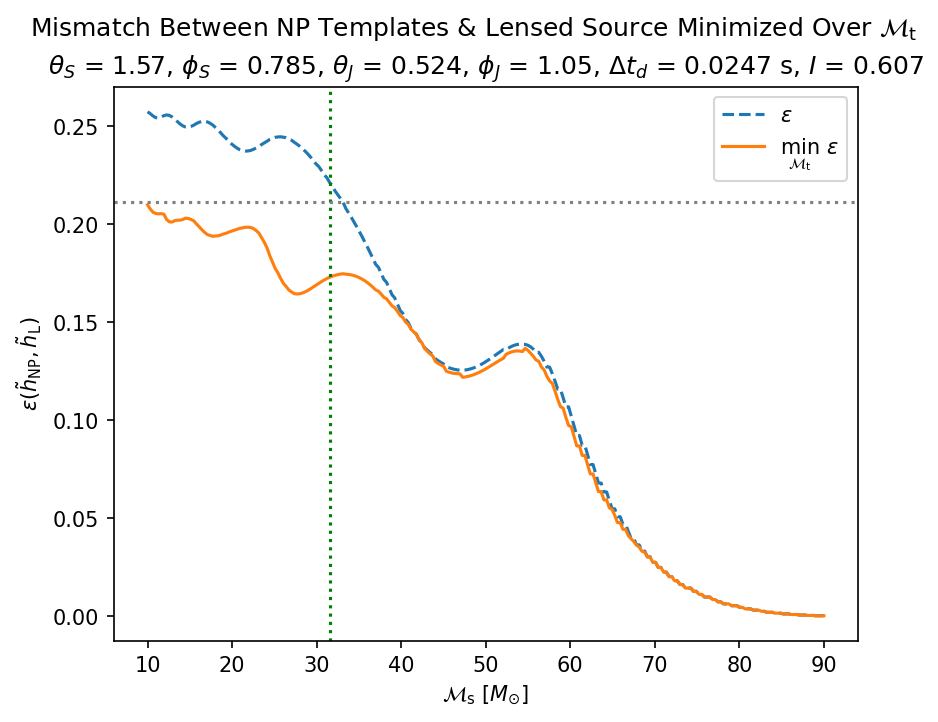

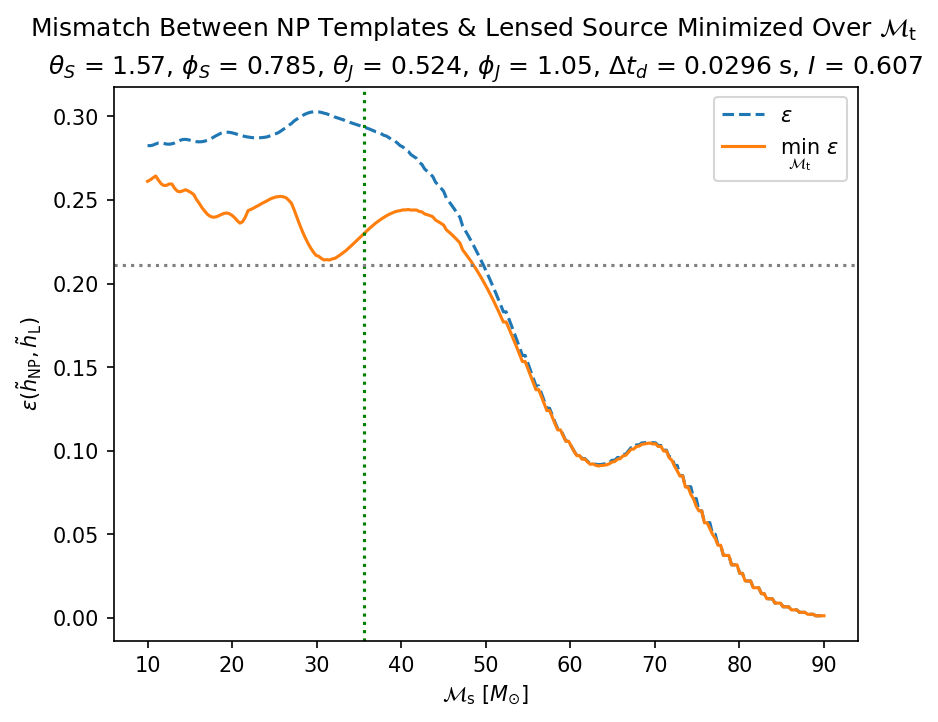

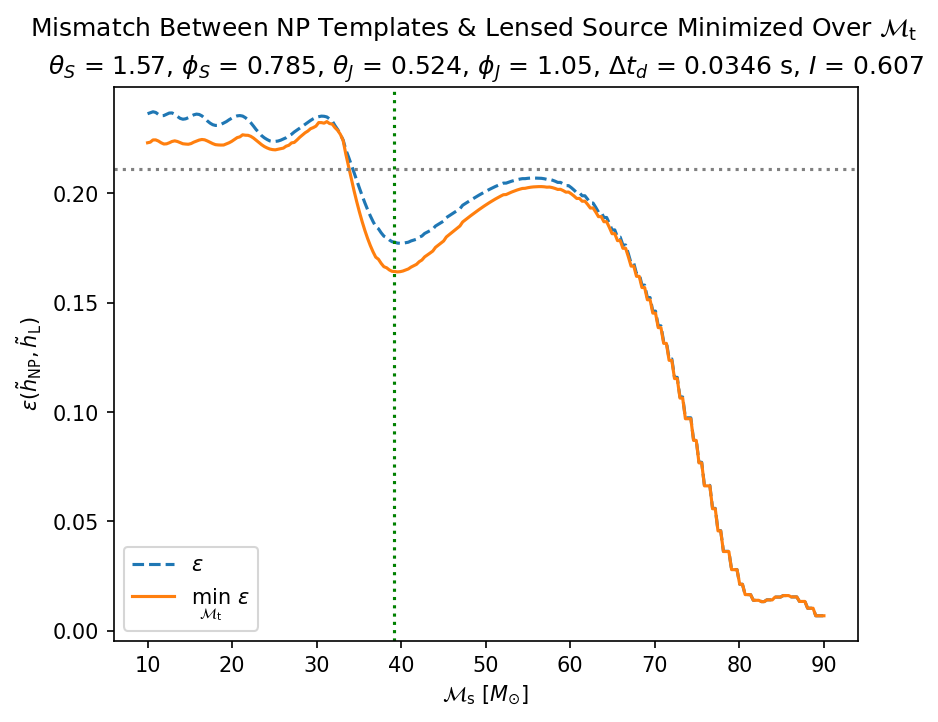

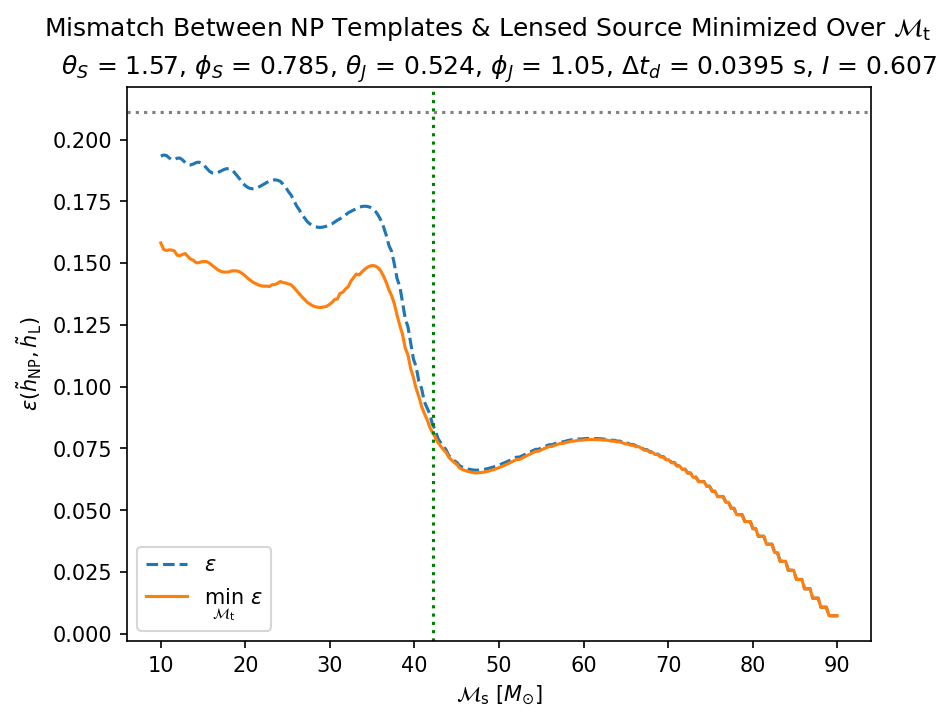

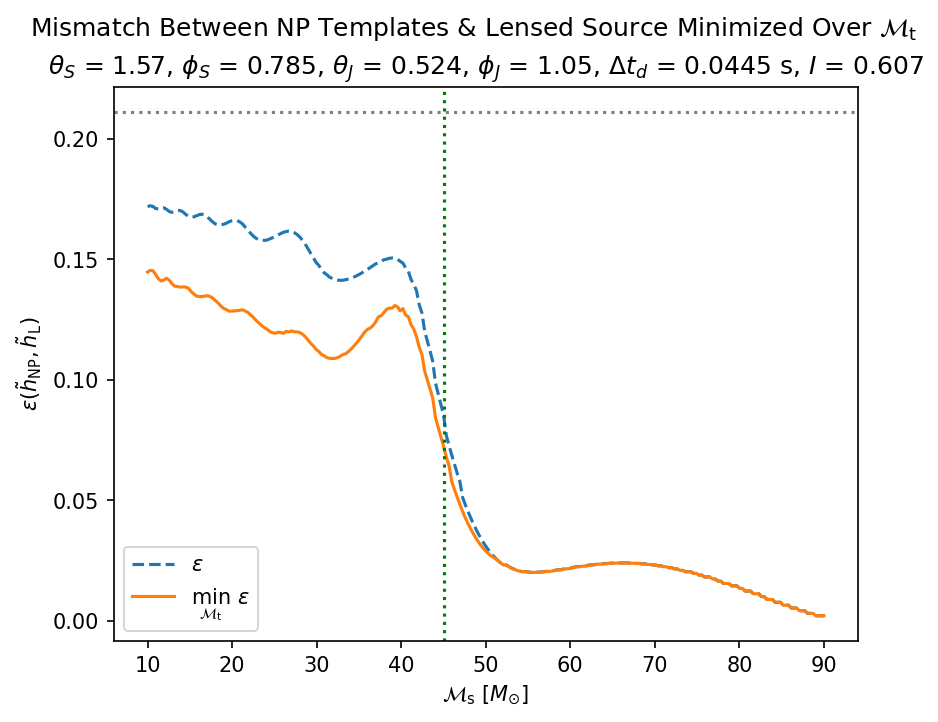

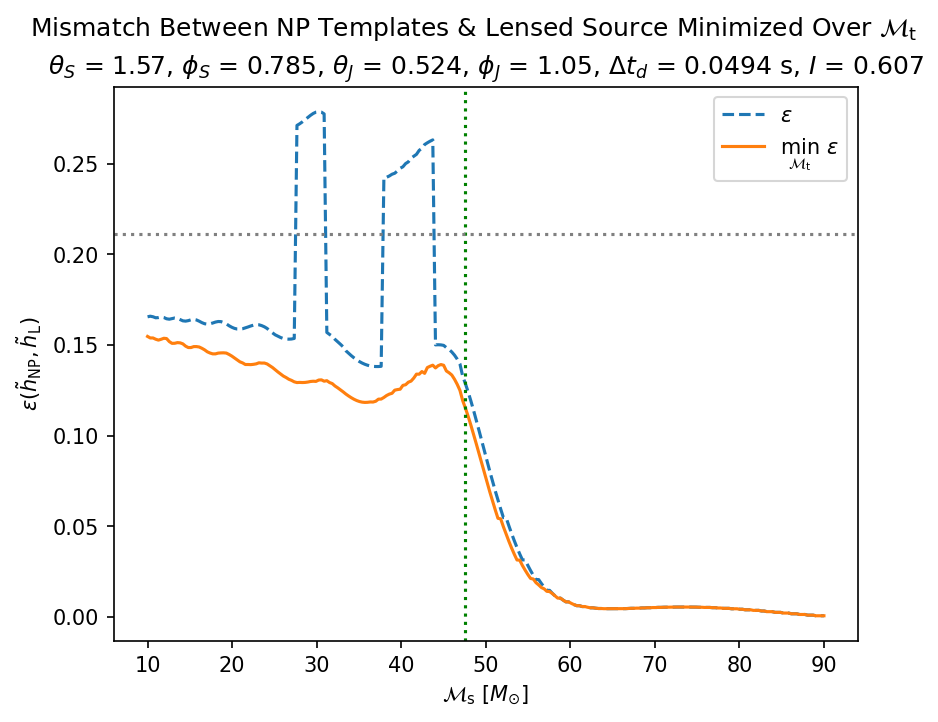

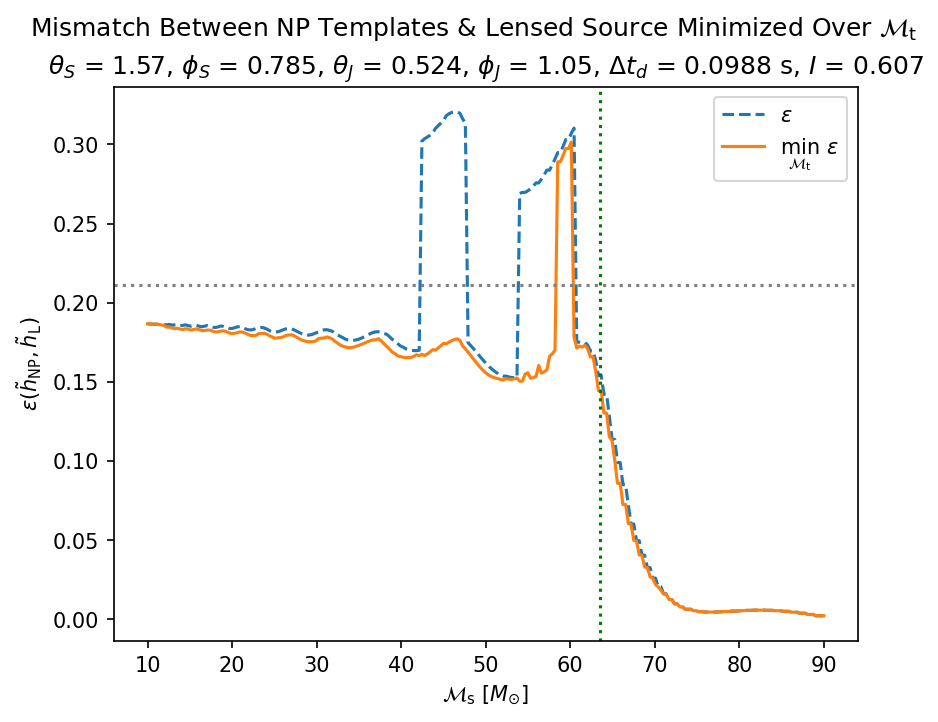

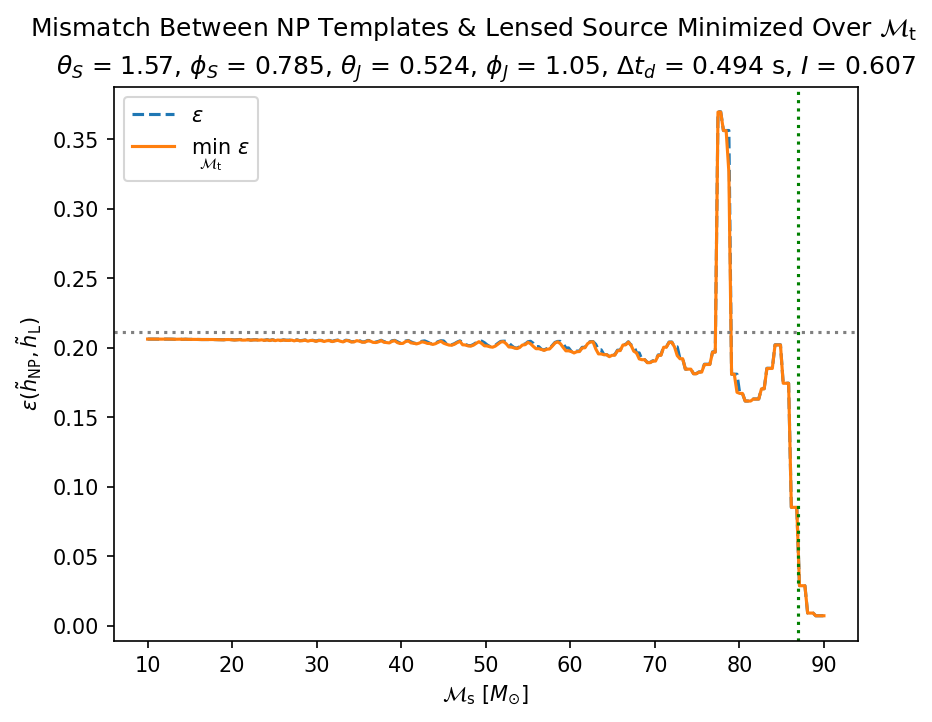

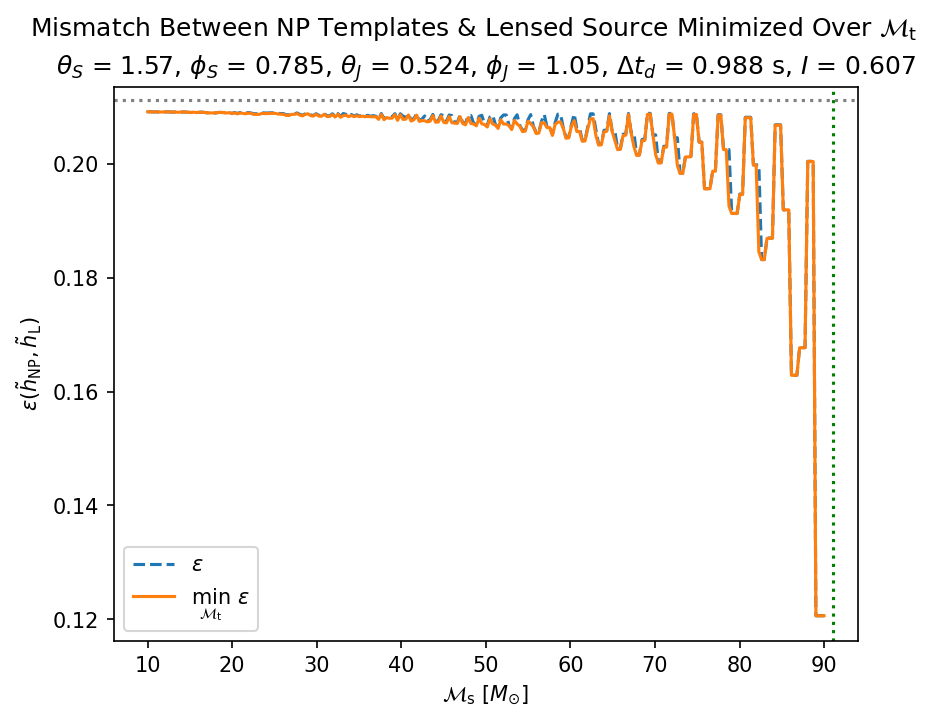

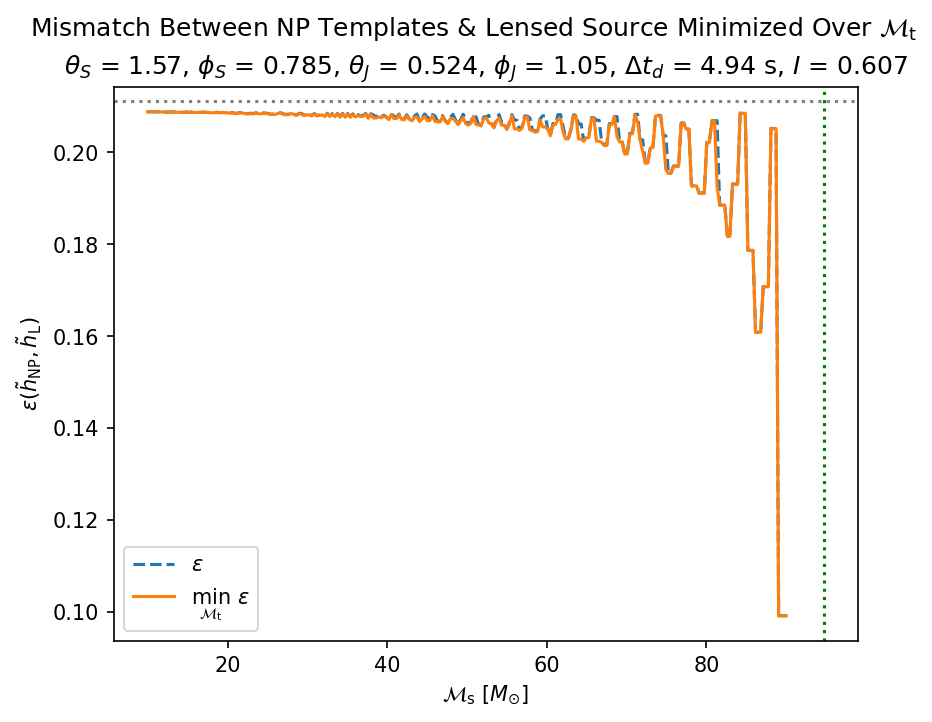

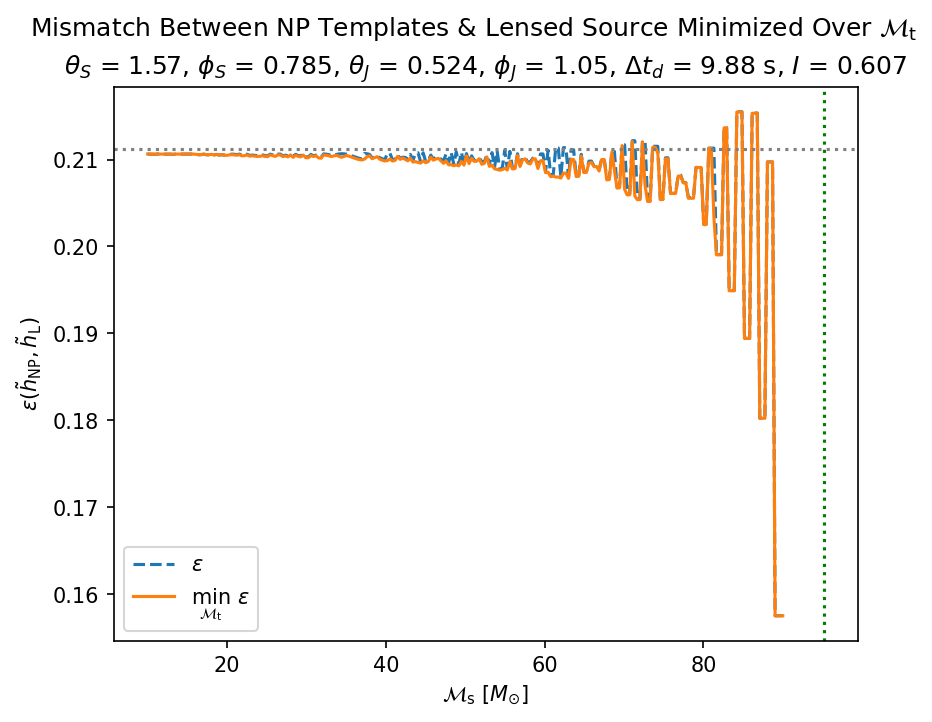

In [35]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 4500, 5e3, 1e4, 5e4, 1e5, 5e5, 1e6])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    mismatch_plots_dict[MLz] = mismatch_plot_psd(opt_match=True)
    plt.show()

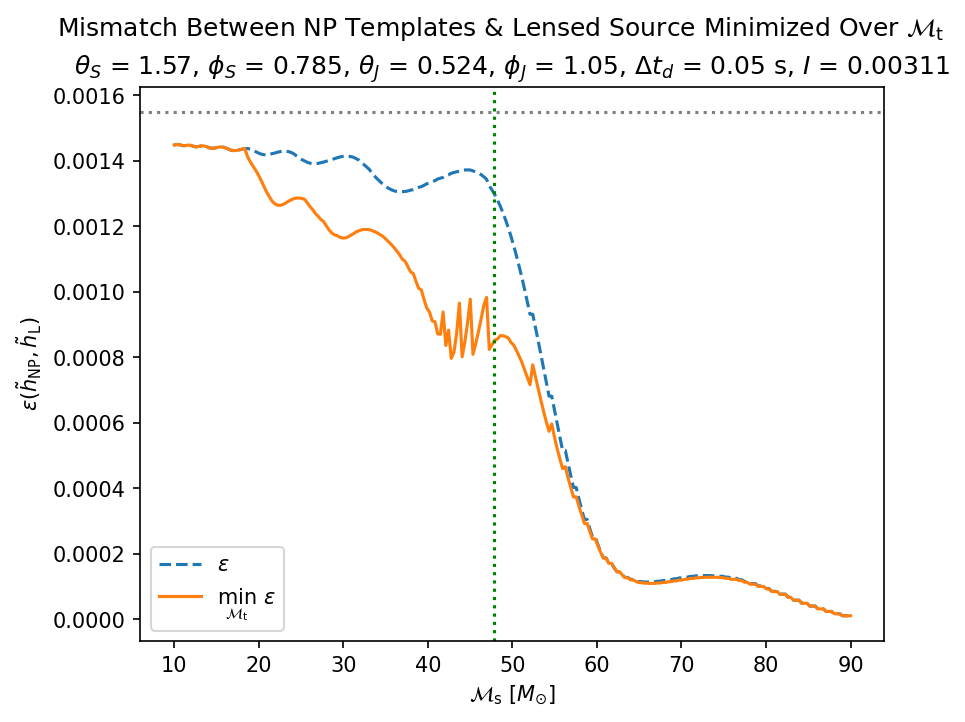

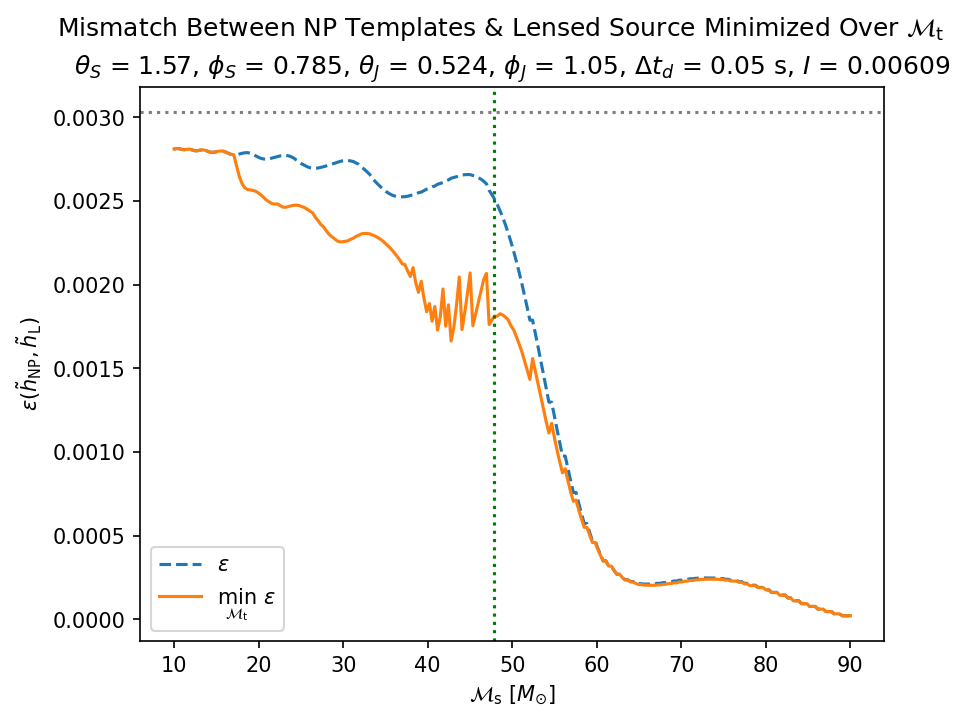

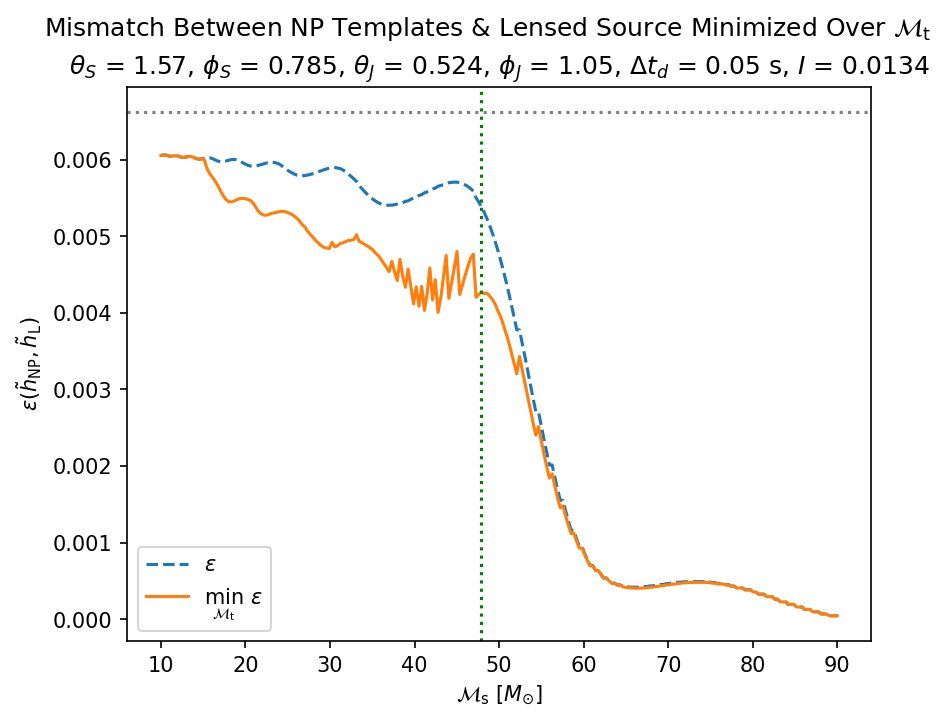

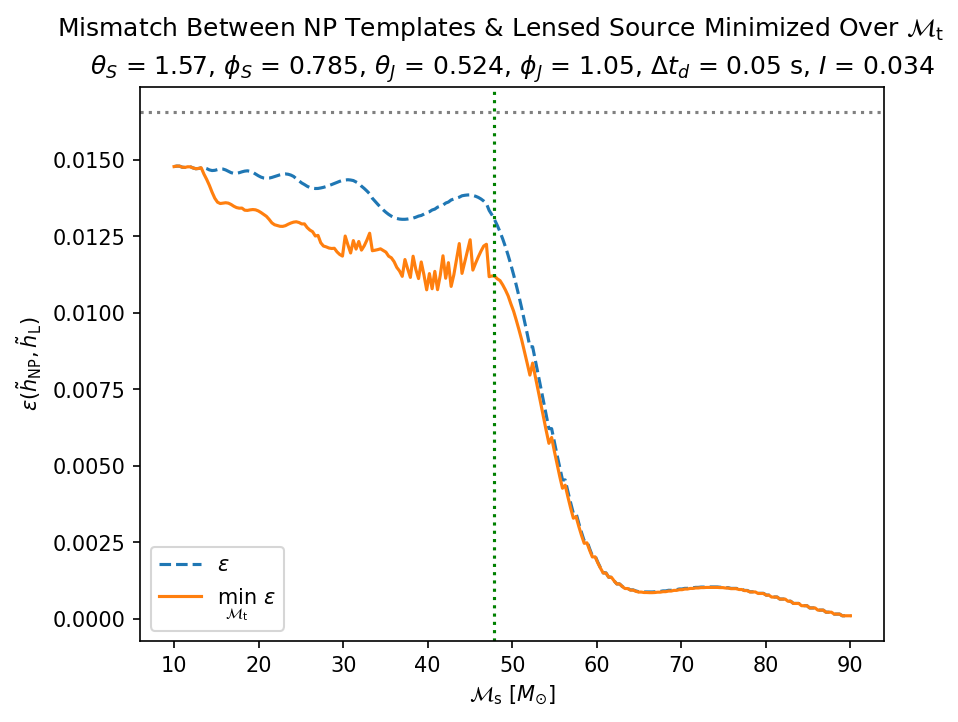

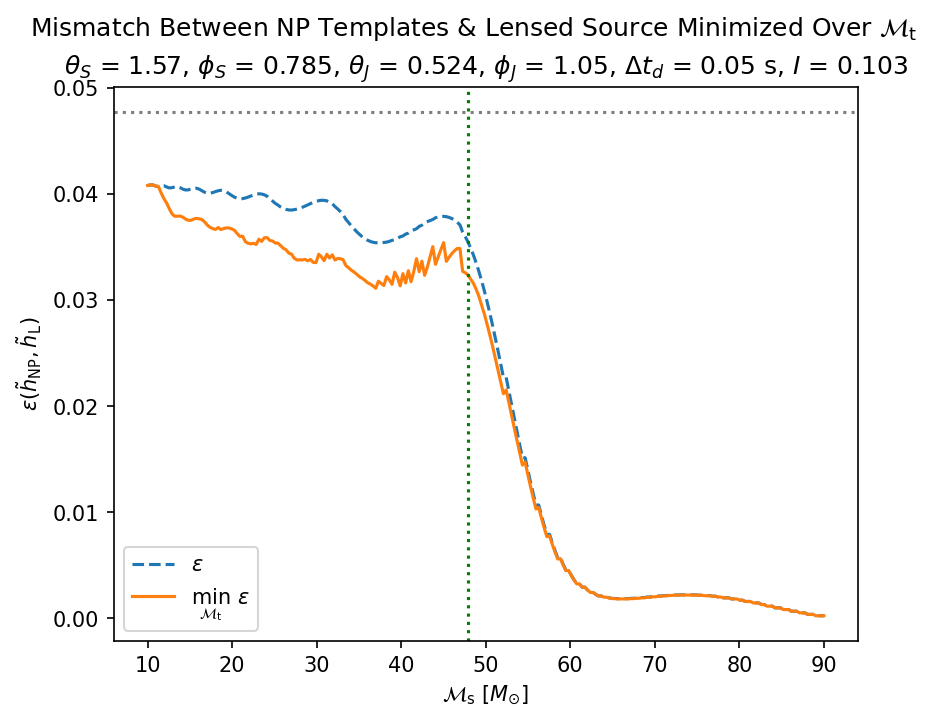

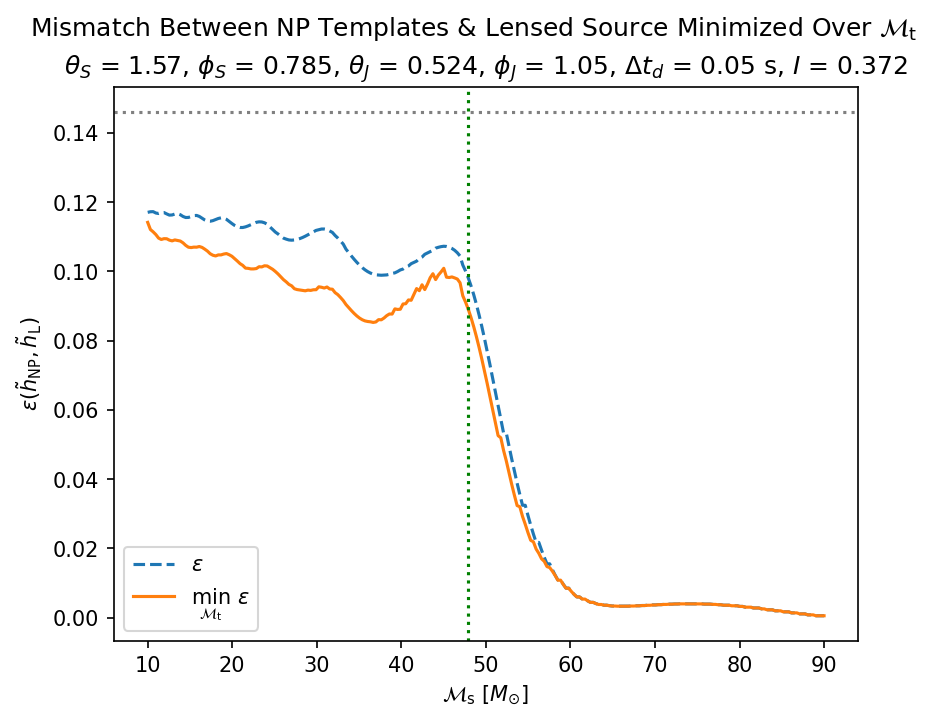

In [9]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

# create y_range and MLz_range based on the same time delay

y_range = np.linspace(0.5, 4, 6)
y_range = y_range[::-1]

time_delay = 0.05
MLz_range = get_MLz_from_time_delay(time_delay, y_range)

for i in range(len(MLz_range)):
    lens_params["y"] = y_range[i]
    lens_params["MLz"] = MLz_range[i] * solar_mass
    mismatch_plot_psd(opt_match=True)
    plt.show()

# analytically analyze mismatch between NP templates and Lensed source

/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/lib/python3.9/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


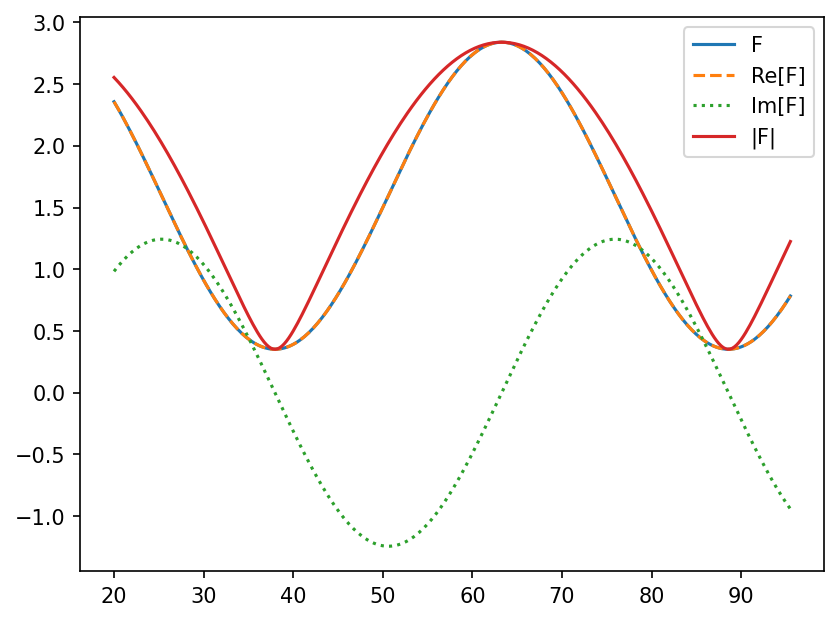

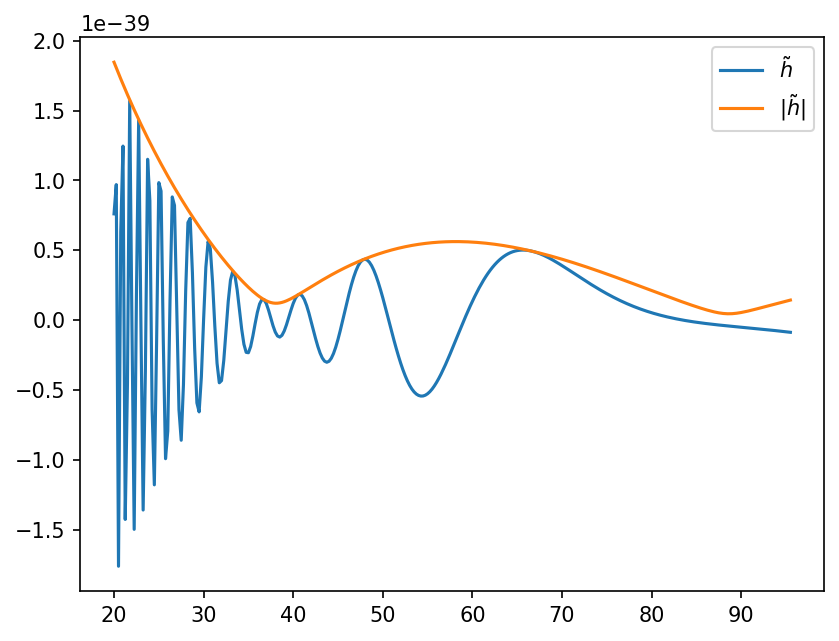

In [45]:
lens_params = lens_params_1.copy()

lens_inst = LensingGeo(lens_params)
f_cut = lens_inst.f_cut()
f_range = np.arange(20, f_cut, 0.25)
F = lens_inst.F(f_range)
lensed_strain = lens_inst.strain(f_range)

plt.plot(f_range, F, label="F") # basically the real part of F
plt.plot(f_range, F.real, label="Re[F]", ls="--")
plt.plot(f_range, F.imag, label="Im[F]", ls=":")
plt.plot(f_range, np.abs(F), label="|F|")
plt.legend()
plt.show()

plt.plot(f_range, lensed_strain, label=r"$\~h$")
plt.plot(f_range, np.abs(lensed_strain), label=r"$|\~h|$")
plt.legend()
plt.show()

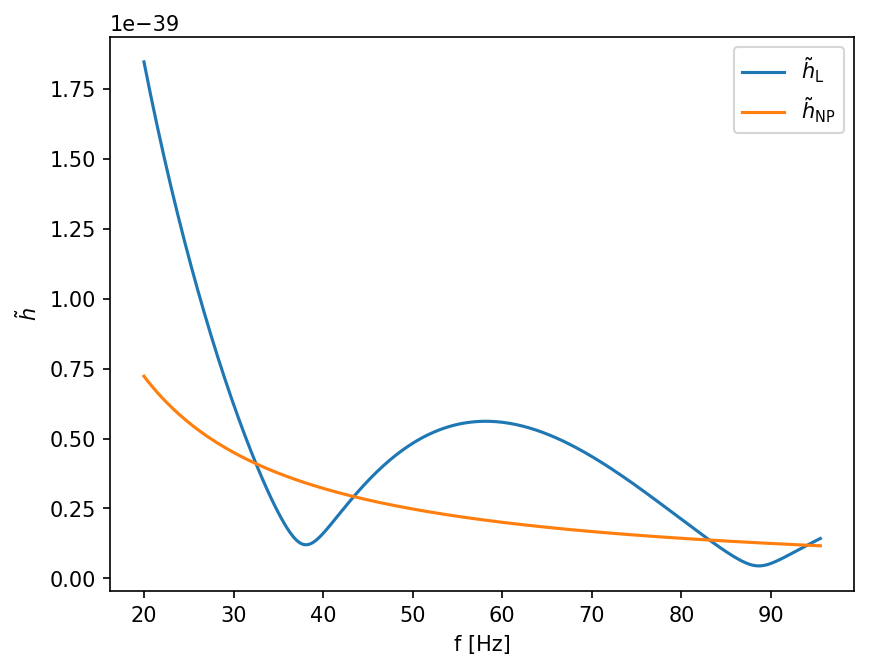

In [62]:
lens_params, RP_params, NP_params = set_to_params (lens_params_1, RP_params_1, NP_params_1)

h_L = get_gw(lens_params)["waveform"]
h_NP = get_gw(NP_params)["waveform"]
f_range = get_gw(lens_params)["f_range"]

plt.plot(f_range, np.abs(h_L), label=r"$\~h_{\rm L}$")
plt.plot(f_range, np.abs(h_NP), label=r"$\~h_{\rm NP}$")
plt.legend()
plt.xlabel("f [Hz]")
plt.ylabel(r"$\~h$")
plt.show()

In [75]:
from scipy.integrate import simps, trapz
lens_params = lens_params_1.copy()

def est_mismatch_plot1():
    mcz_L_arr = np.linspace(10, 90, 300)
    integrated_F_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)
        F = lens_inst.F(f_range)

        integrated_F = simps(np.abs(F), f_range)
        integrated_F_arr[i] = integrated_F

    plt.plot(mcz_L_arr, integrated_F_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$M \approx \int |F(f)| df$???")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g}, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

In [82]:
from scipy.integrate import simps, trapz
lens_params = lens_params_1.copy()

def est_mismatch_plot2():
    mcz_L_arr = np.linspace(10, 90, 300)
    integrated_F_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)
        mu_plus = lens_inst.mu_plus()
        F_abs = mu_plus * np.sqrt(1 + 2 * I**0.5 * np.sin(2*np.pi * Delta_td * f_range) + I)
        max_F_abs = np.max(F_abs)
        integrated_F = simps(F_abs, f_range)
        integrated_F_arr[i] = integrated_F / max_F_abs

    plt.plot(mcz_L_arr, integrated_F_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$M \approx \int |F(f)| df$???")

    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g}, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

In [77]:
from scipy.integrate import simps, trapz
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

def est_mismatch_plot3():
    mcz_L_arr = np.linspace(10, 90, 300)
    Match_arr = np.zeros(len(mcz_L_arr))
    epsilon_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)
        psd = Sn(f_range)
        F = lens_inst.F(f_range)
        h_L = lens_inst.strain(f_range)

        h_NP = get_gw(NP_params)["waveform"]

        L_NP_inner_product = simps(h_L * np.conj(h_NP) / psd, f_range)
        L_inner_product = simps(h_L * np.conj(h_L) / psd, f_range)
        NP_inner_product = simps(h_NP * np.conj(h_NP) / psd, f_range)

        Match = L_NP_inner_product / np.sqrt(L_inner_product * NP_inner_product)
        Match_arr[i] = Match
        epsilon_arr[i] = 1 - Match

    # plt.plot(mcz_L_arr, Match_arr)
    plt.plot(mcz_L_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")
    
    mcz_vertical = (lens_params["eta"] ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
    plt.axvline(x=mcz_vertical, c='green', ls=':')

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g}, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

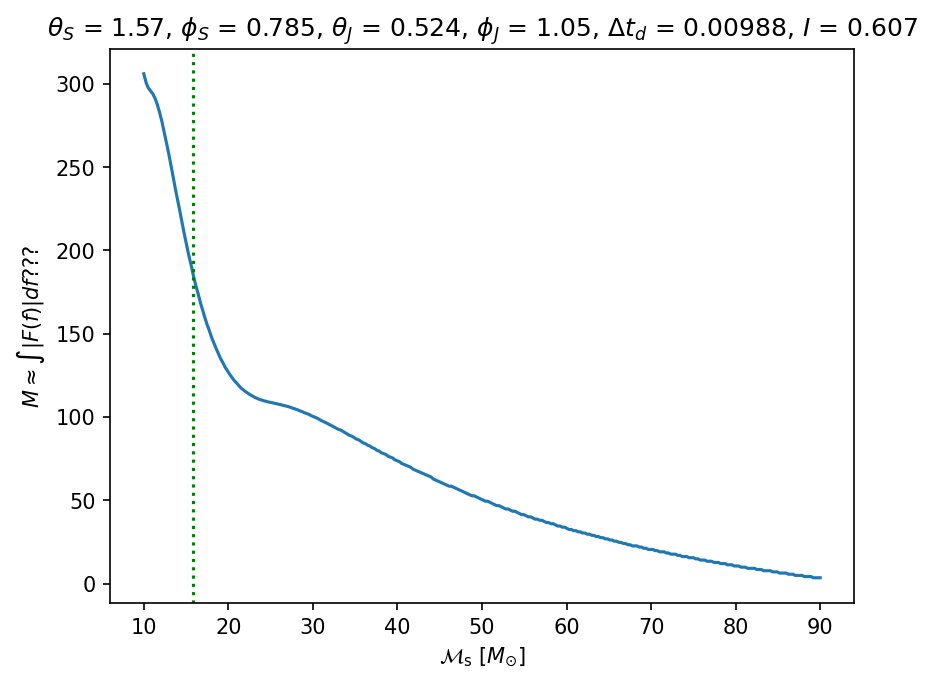

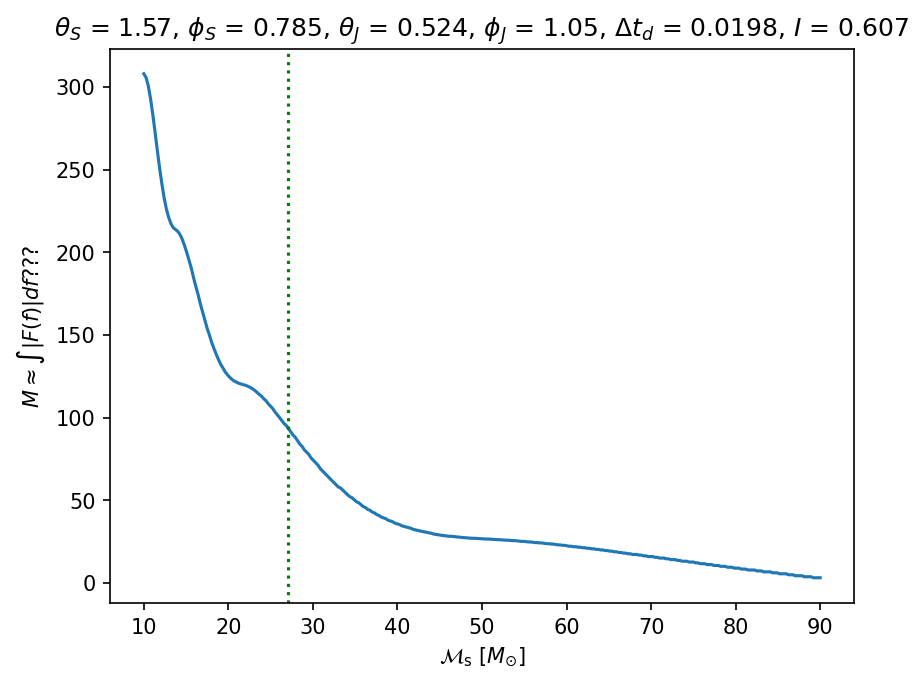

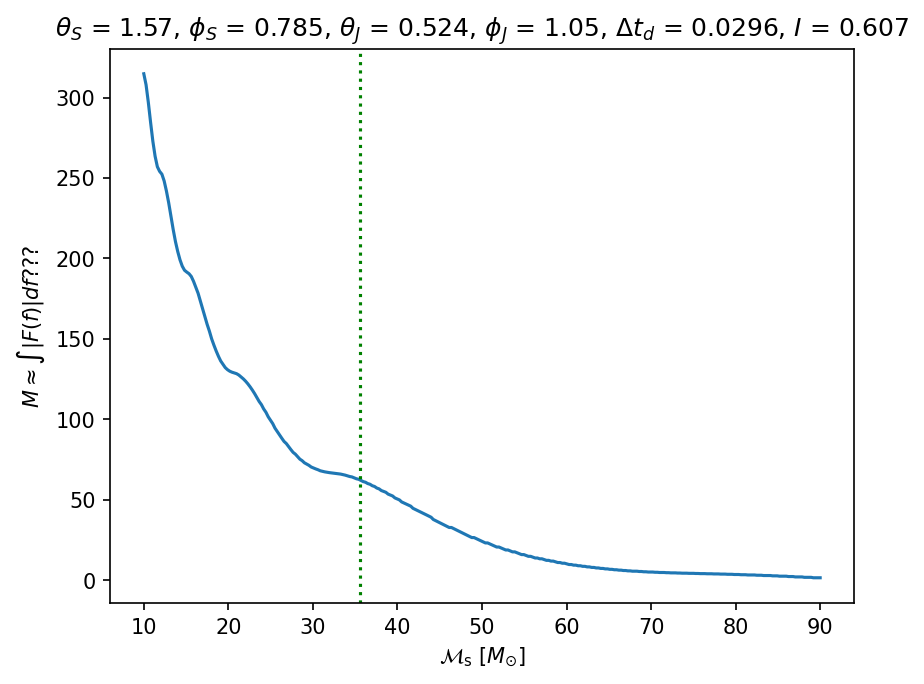

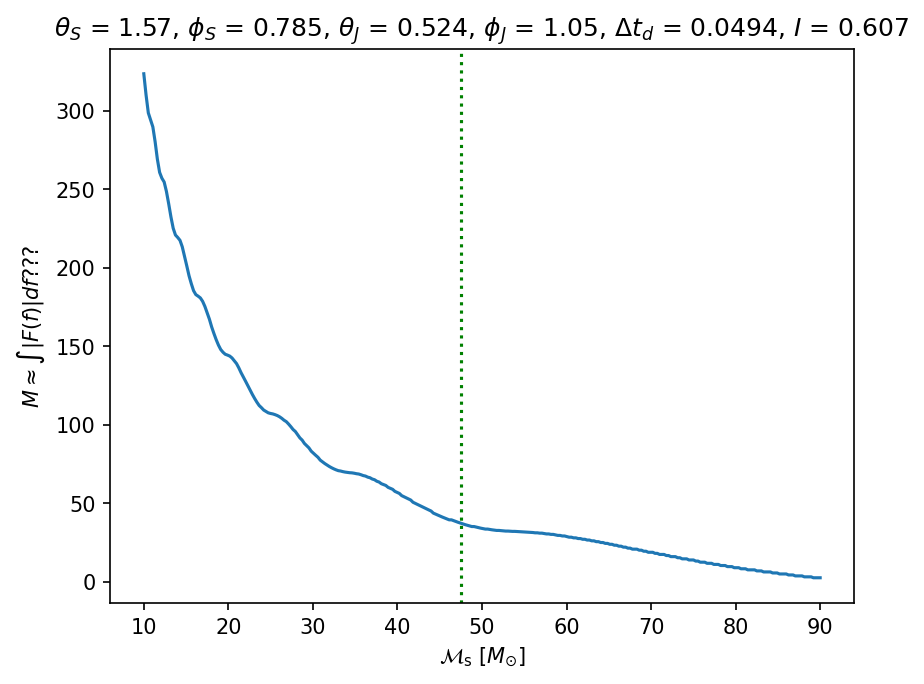

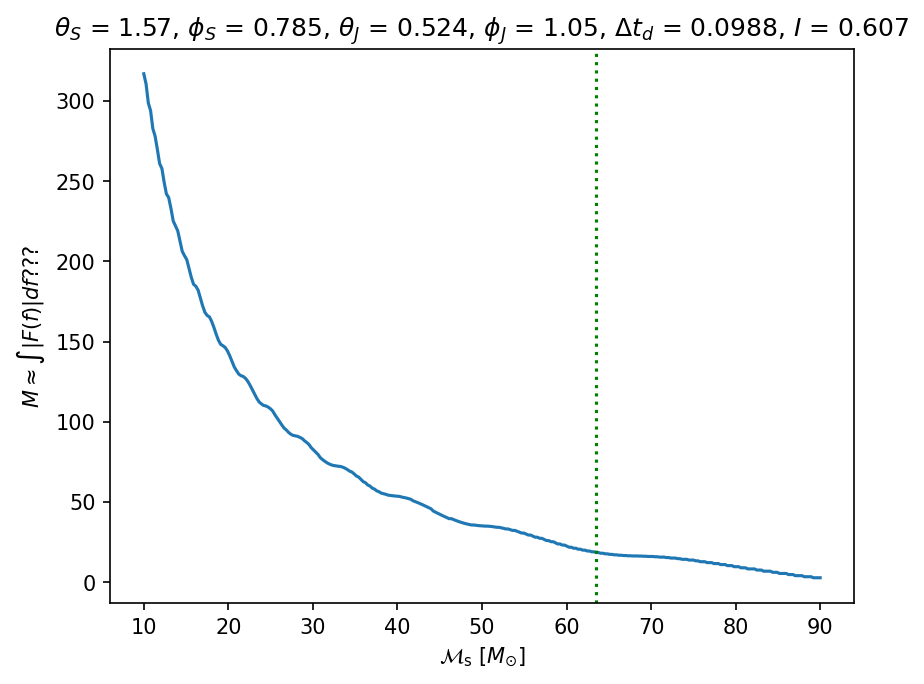

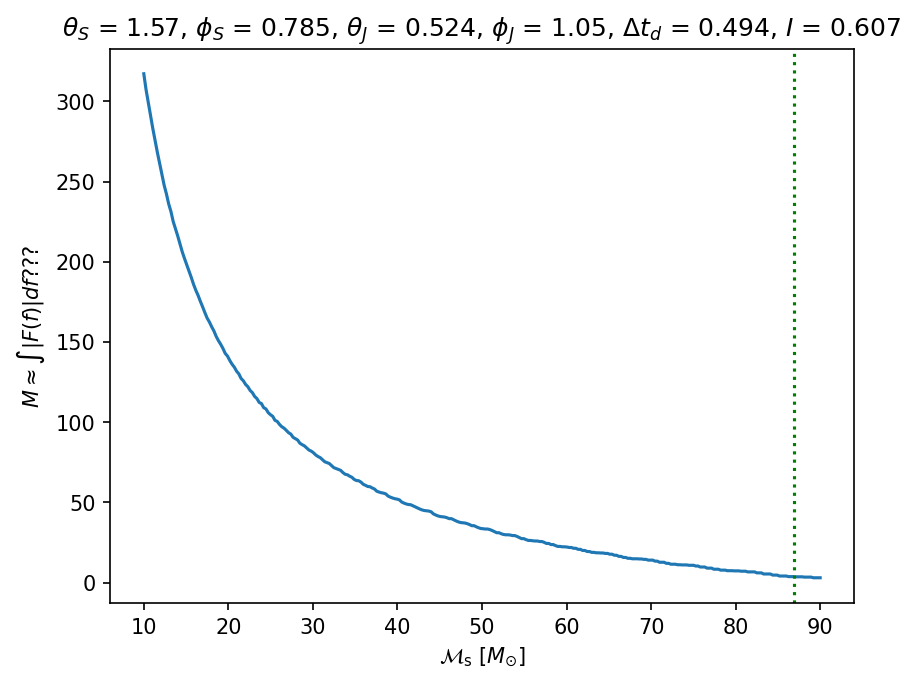

In [78]:
lens_params = lens_params_1.copy()

MLz_range = np.array([1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    est_mismatch_plot1()
    plt.show()

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_77166/4140326617.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  integrated_F_arr[i] = integrated_F / max_F_abs


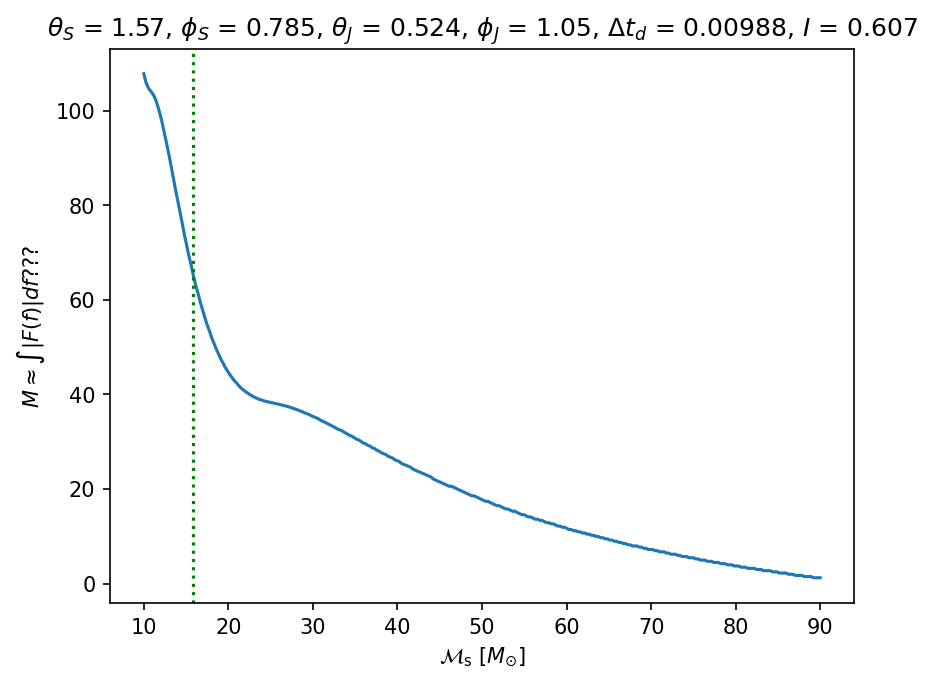

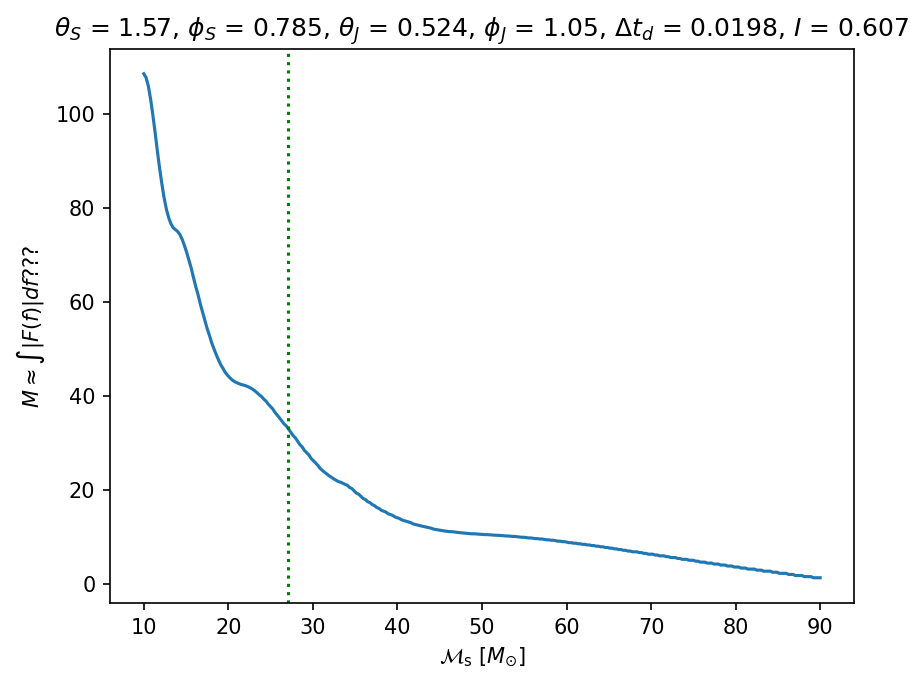

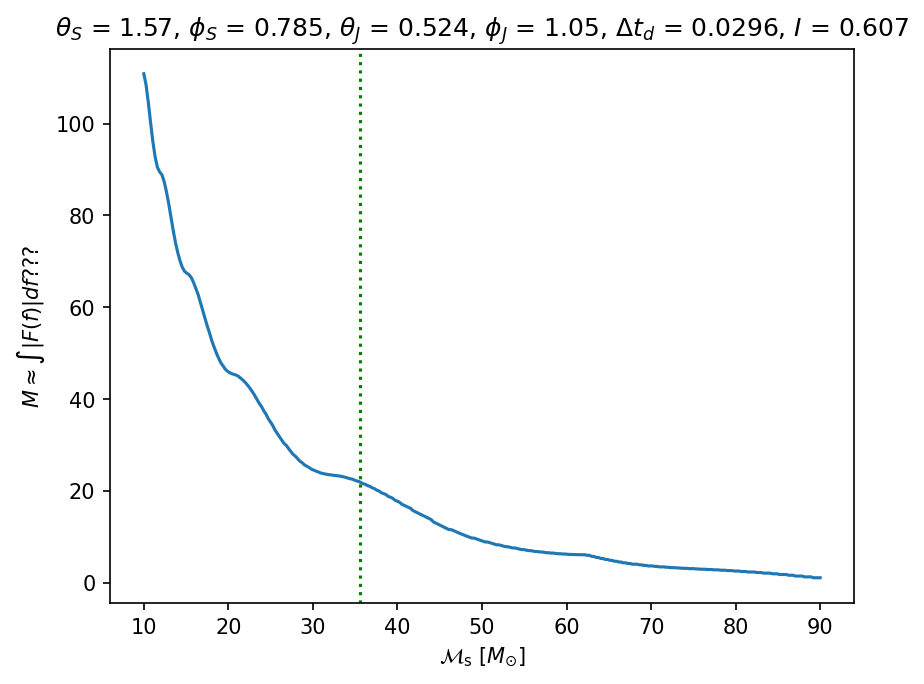

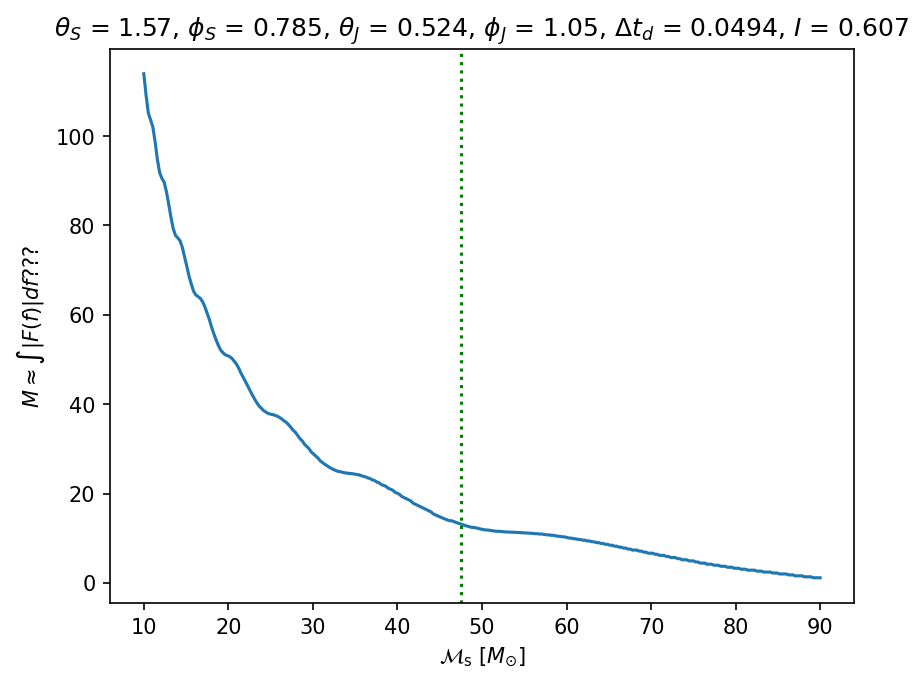

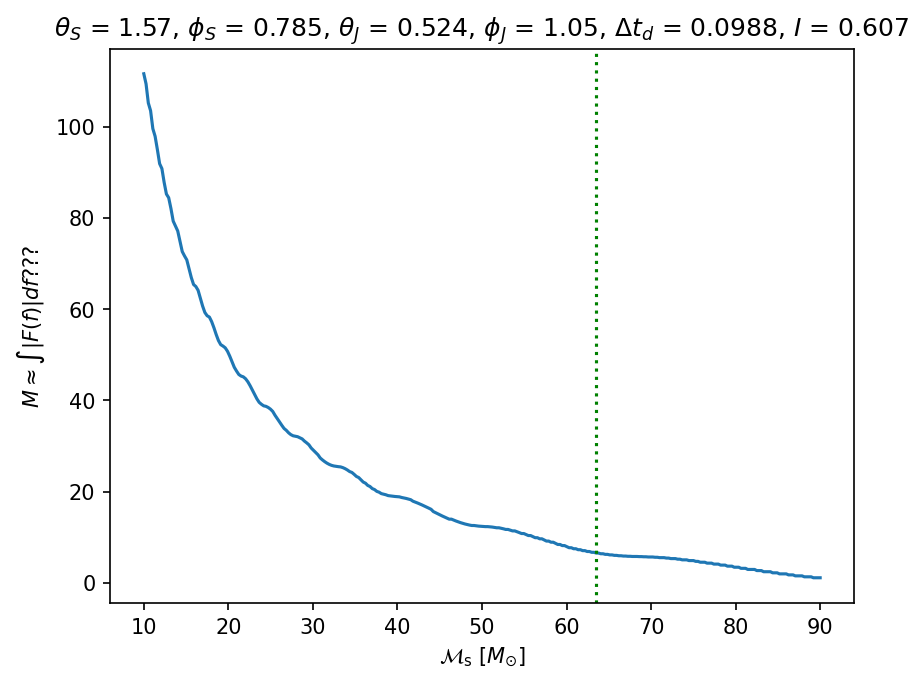

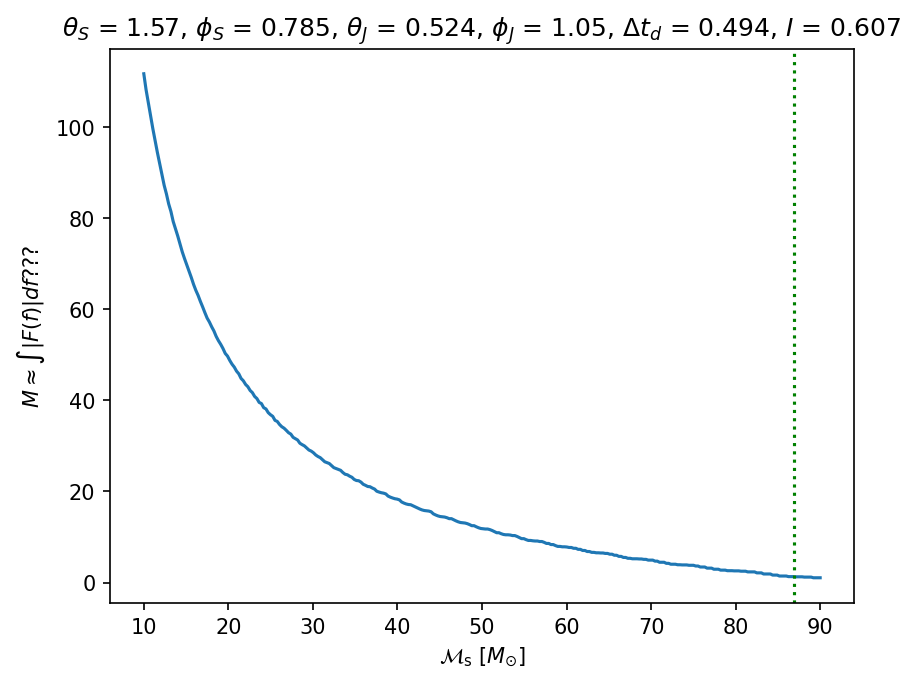

In [83]:
lens_params = lens_params_1.copy()

MLz_range = np.array([1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    est_mismatch_plot2()
    plt.show()

/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_77166/1959367721.py:29: ComplexWarning: Casting complex values to real discards the imaginary part
  Match_arr[i] = Match
/var/folders/y_/v4l1jv1j5b55928djlvnhnm40000gp/T/ipykernel_77166/1959367721.py:30: ComplexWarning: Casting complex values to real discards the imaginary part
  epsilon_arr[i] = 1 - Match


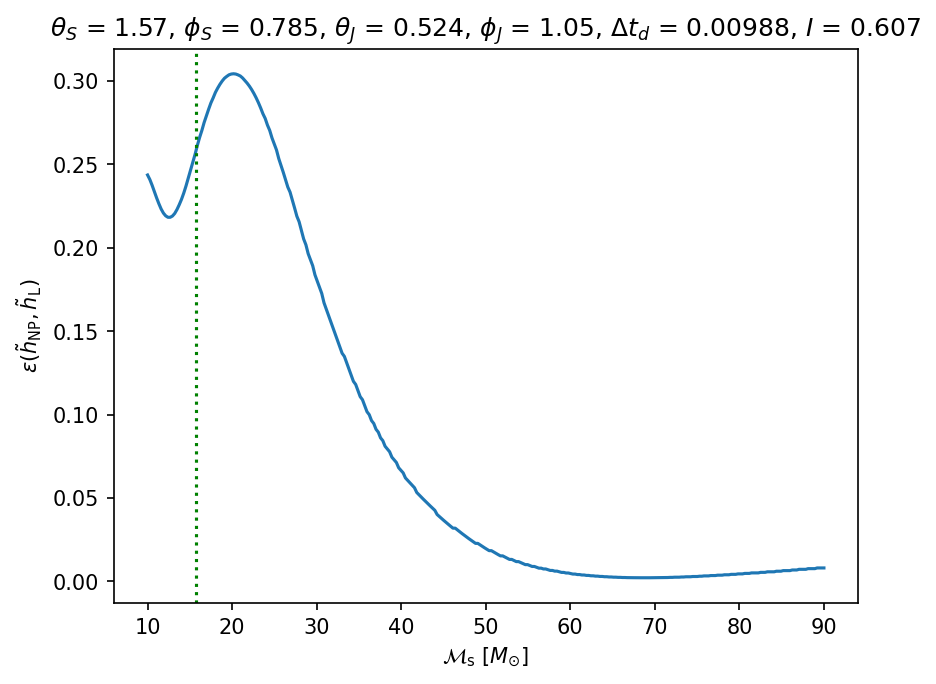

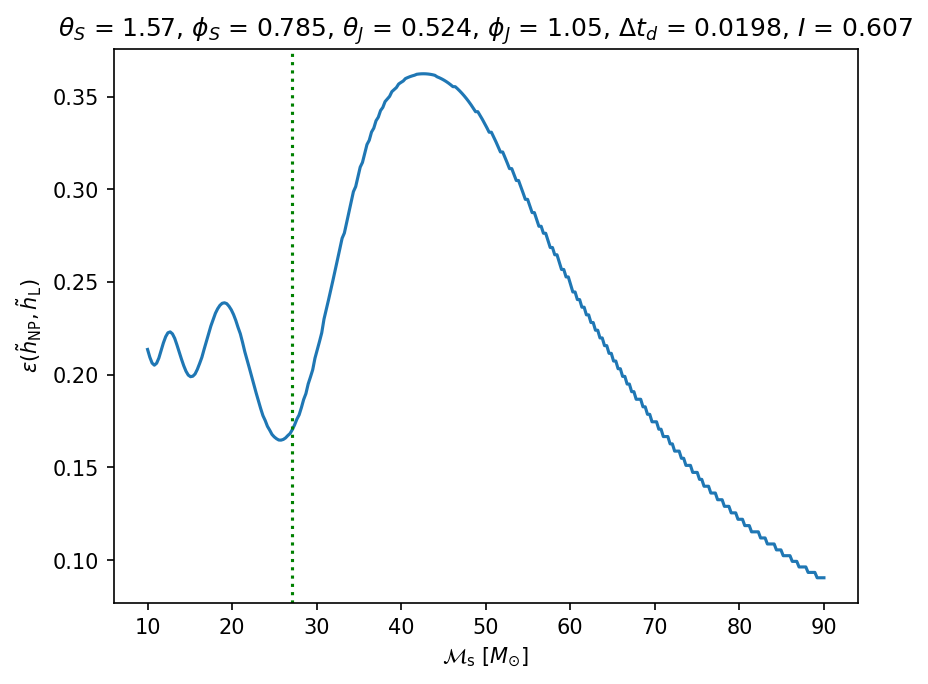

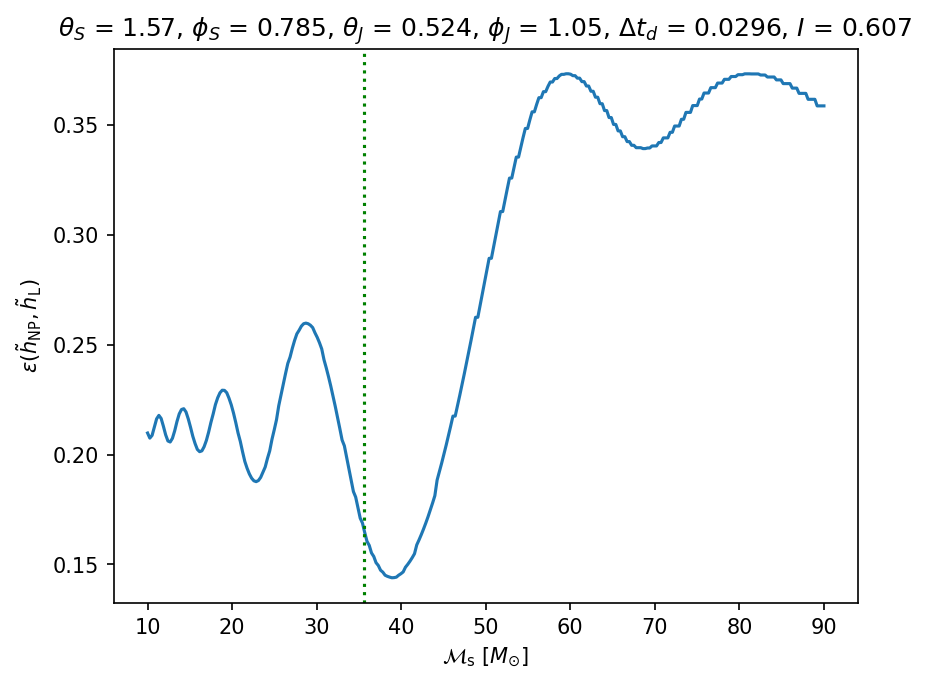

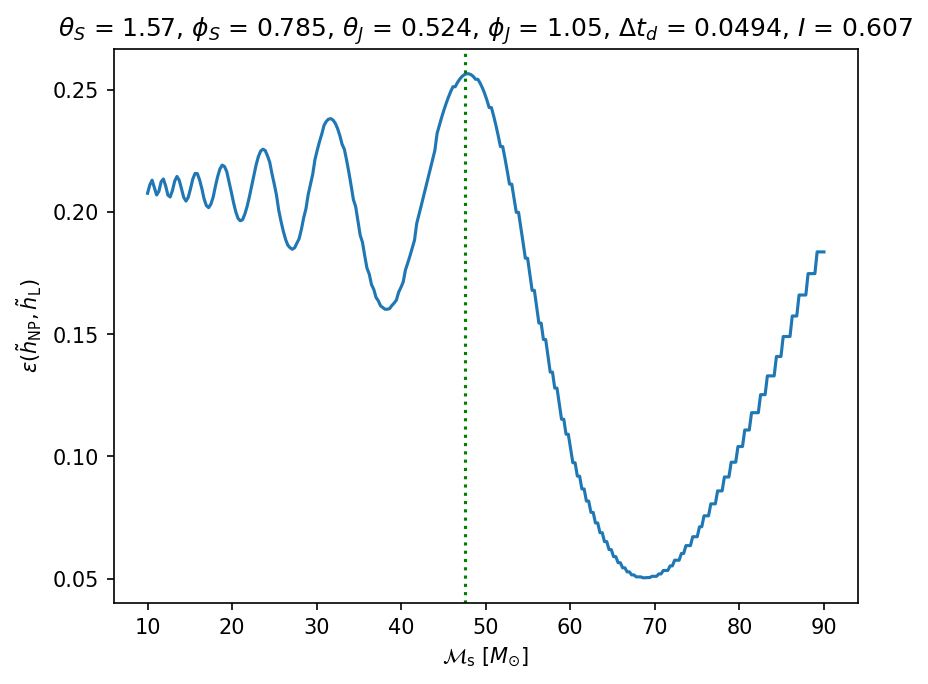

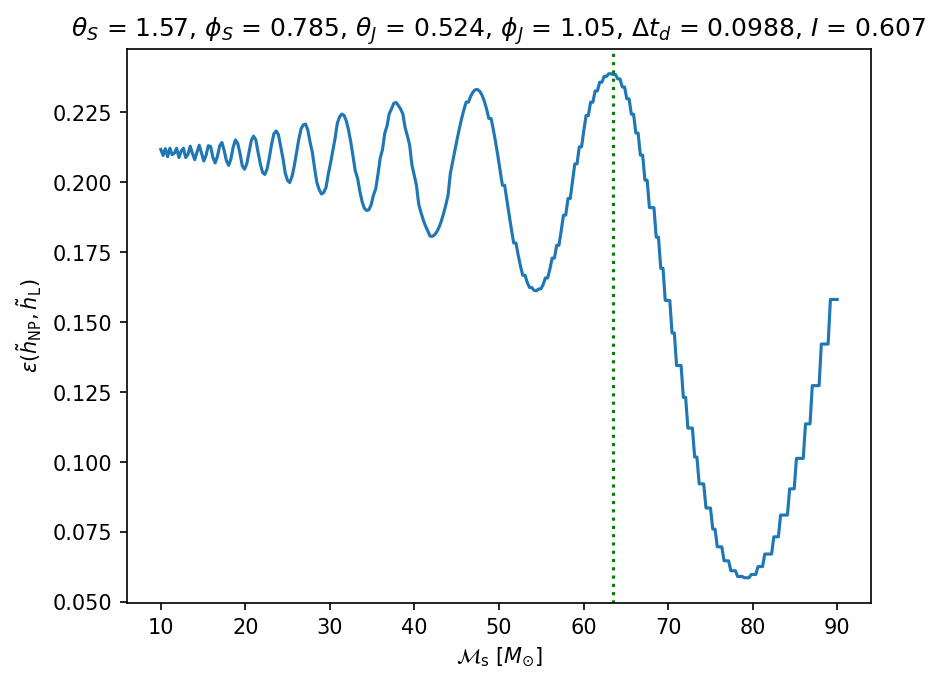

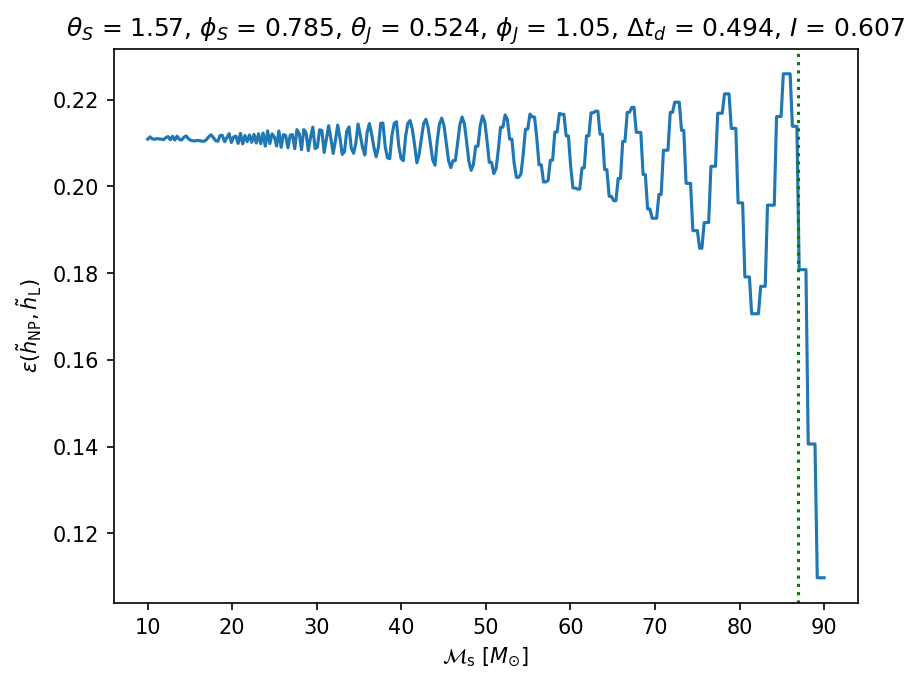

In [66]:
lens_params = lens_params_1.copy()

MLz_range = np.array([1e3, 2e3, 3e3, 4e3, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    est_mismatch_plot3()
    plt.show()

In [43]:
def est_mismatch_plot4():
    mcz_L_arr = np.linspace(10, 90, 300)
    Match_arr = np.zeros(len(mcz_L_arr))
    epsilon_arr = np.zeros(len(mcz_L_arr))

    lens_inst = LensingGeo(lens_params)
    mu_plus = lens_inst.mu_plus()
    mu_minus = lens_inst.mu_minus()
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()

    for i, mcz_L in enumerate(mcz_L_arr):
        lens_params["mcz"] = NP_params["mcz"] = mcz_L * solar_mass
        lens_inst = LensingGeo(lens_params)
        f_cut = lens_inst.f_cut()
        f_range = np.arange(20, f_cut, 0.25)

        h_NP = get_gw(NP_params)["waveform"]

        A1_integrand = np.abs(h_NP) ** 2 * (
            np.abs(mu_plus) ** 0.5
            + np.abs(mu_minus) ** 0.5 * np.sin(2 * np.pi * Delta_td * f_range)
        )
        A2_integrand = np.abs(h_NP) ** 2 * (
            np.abs(mu_plus)
            + np.abs(mu_minus)
            + 2
            * np.abs(mu_plus * mu_minus) ** 0.5
            * np.sin(2 * np.pi * Delta_td * f_range)
        )
        A3_integrand = np.abs(h_NP) ** 2

        A1 = simps(A1_integrand, f_range)
        A2 = simps(A2_integrand, f_range)
        A3 = simps(A3_integrand, f_range)

        Match = A1 / np.sqrt(A2 * A3)
        Match_arr[i] = Match
        epsilon = 1 - Match
        epsilon_arr[i] = epsilon

    plt.plot(mcz_L_arr, epsilon_arr)
    plt.xlabel(r"$\mathcal{M}_{\text{s}}$ $[M_{\odot}]$")
    plt.ylabel(r"$\epsilon(\~h_{\rm NP}, \~h_{\rm L})$")

    mcz_vertical = (
        (lens_params["eta"] ** (3 / 5))
        / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td))
        / solar_mass
    )
    plt.axvline(x=mcz_vertical, c="green", ls=":")

    plt.title(
        r"$\theta_S$ = {:.3g}, $\phi_S$ = {:.3g}, $\theta_J$ = {:.3g}, $\phi_J$ = {:.3g}, $\Delta t_d$ = {:.3g} s, $I$ = {:.3g}".format(
            lens_params["theta_S"],
            lens_params["phi_S"],
            lens_params["theta_J"],
            lens_params["phi_J"],
            Delta_td,
            I,
        )
    )

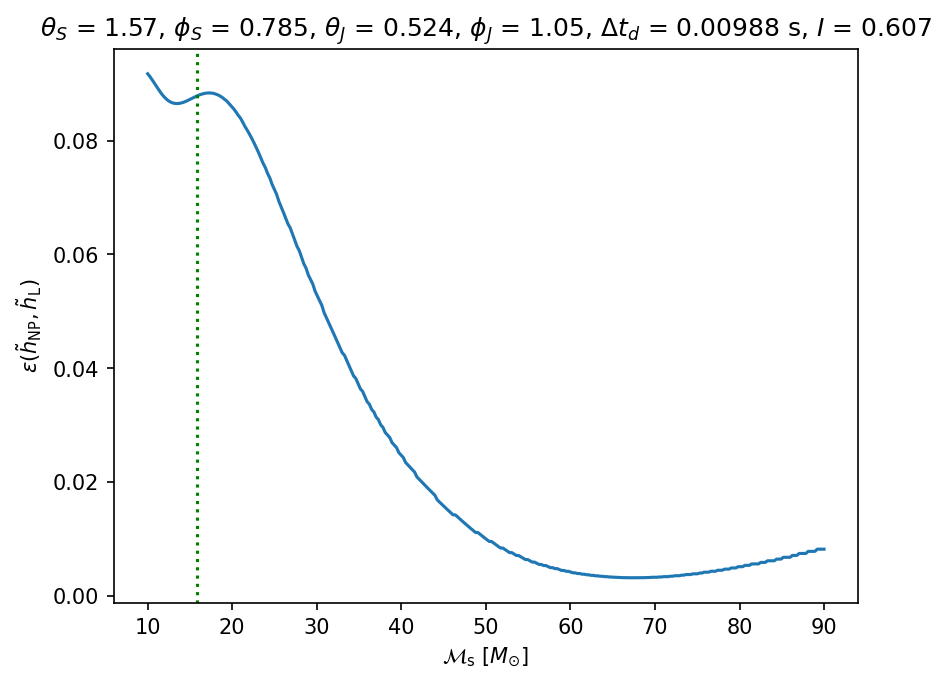

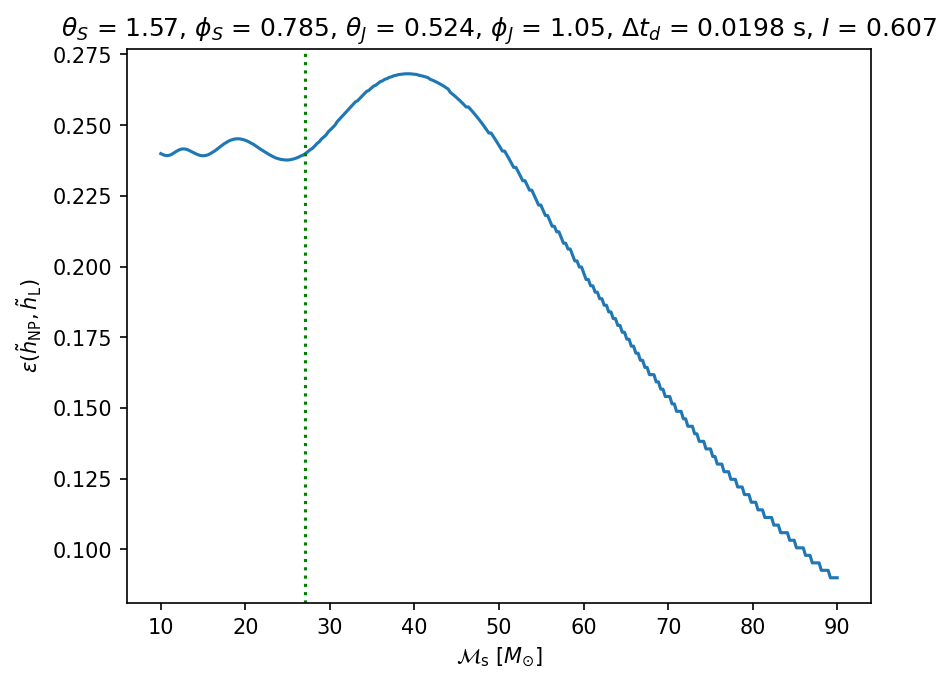

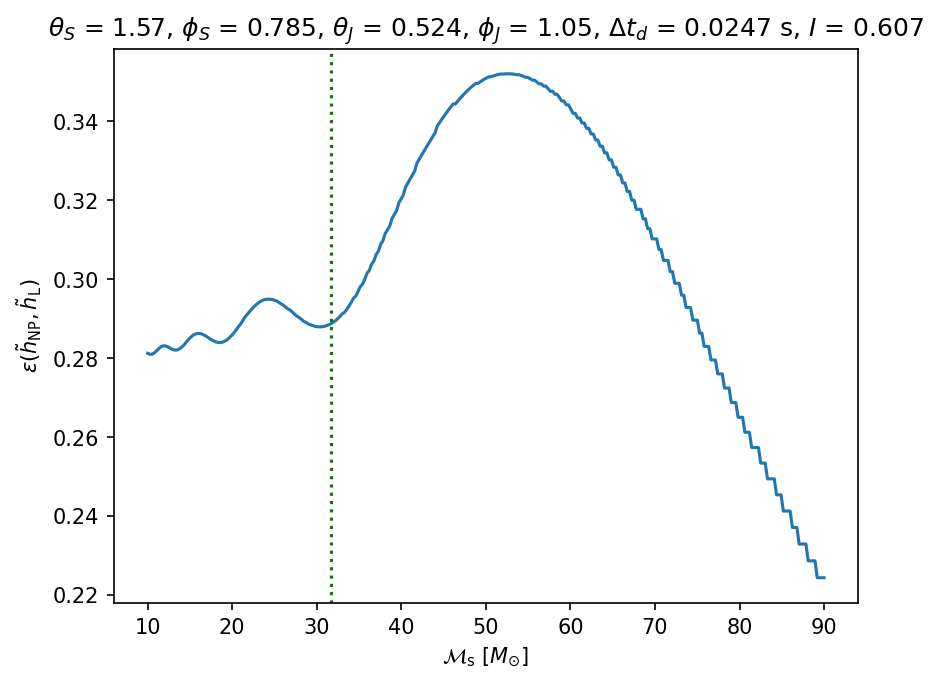

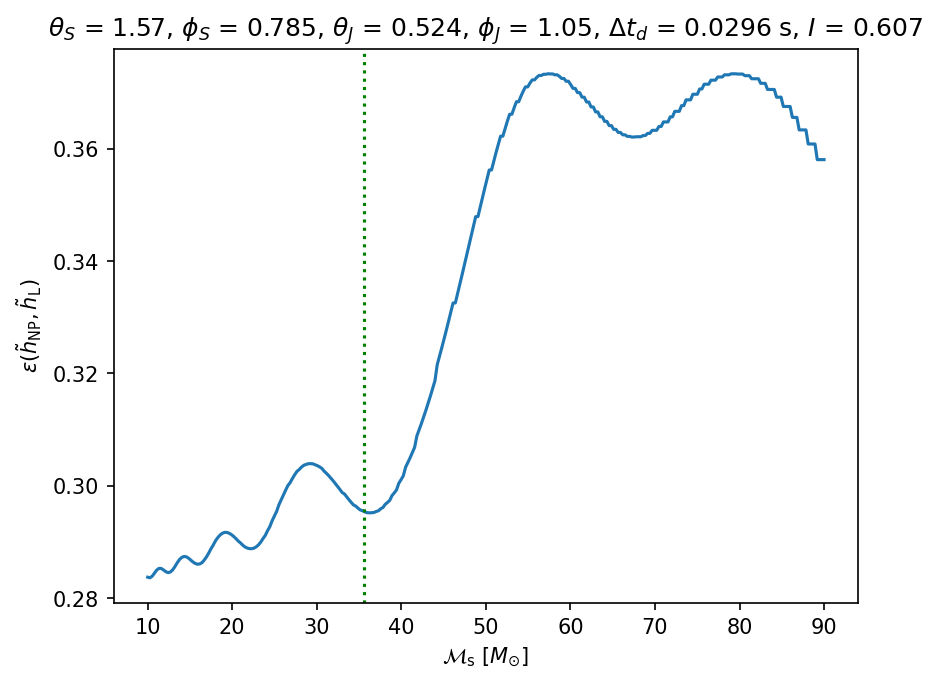

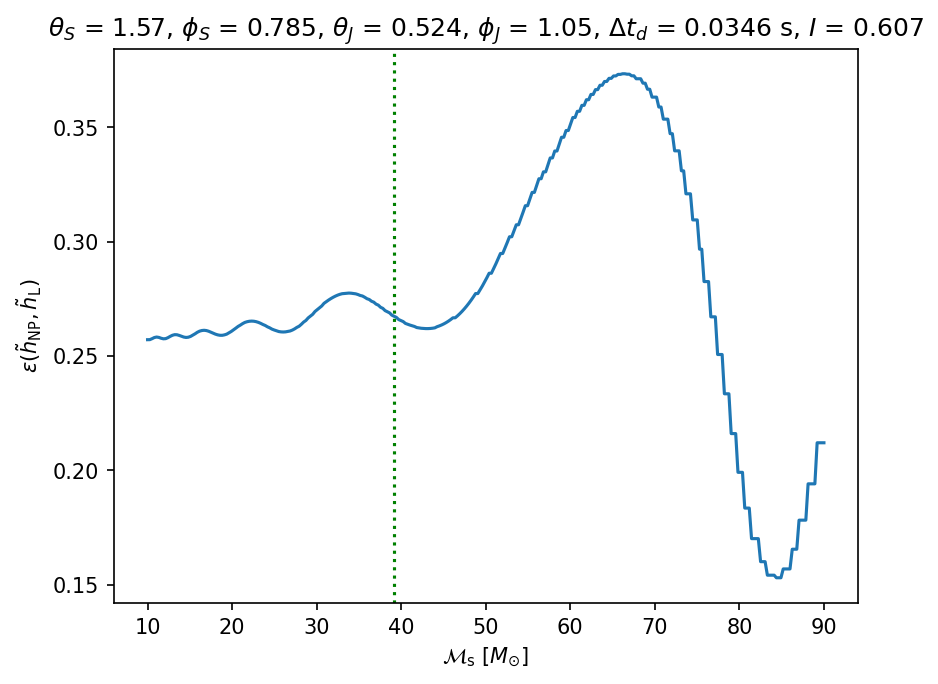

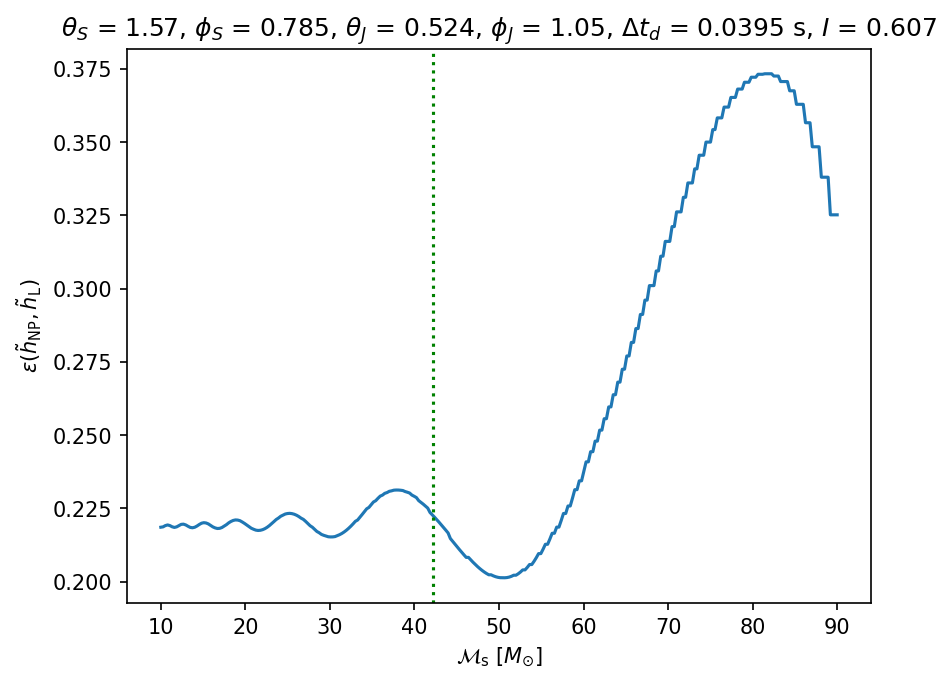

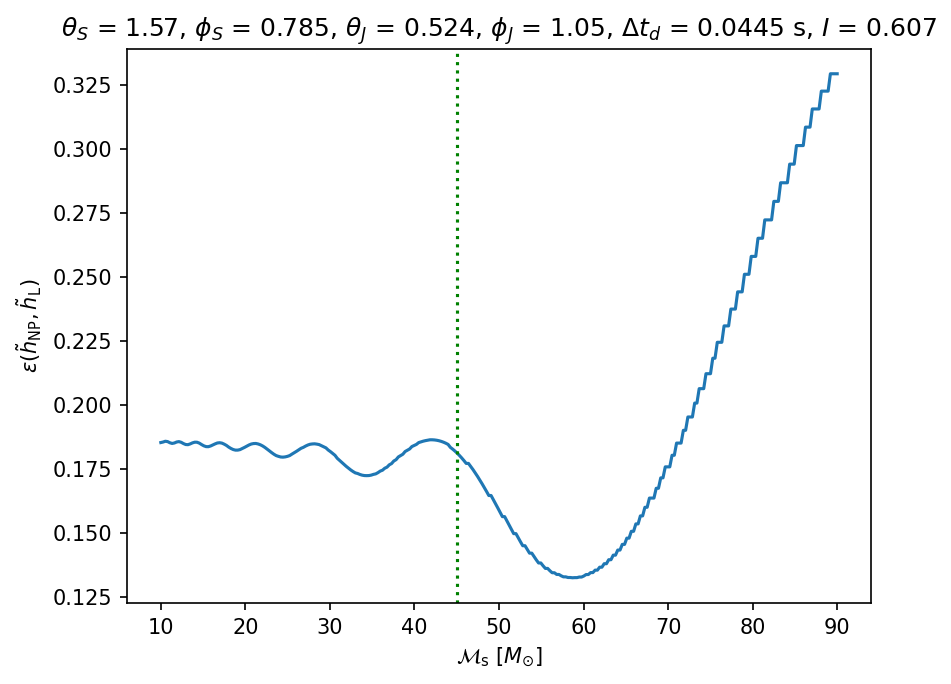

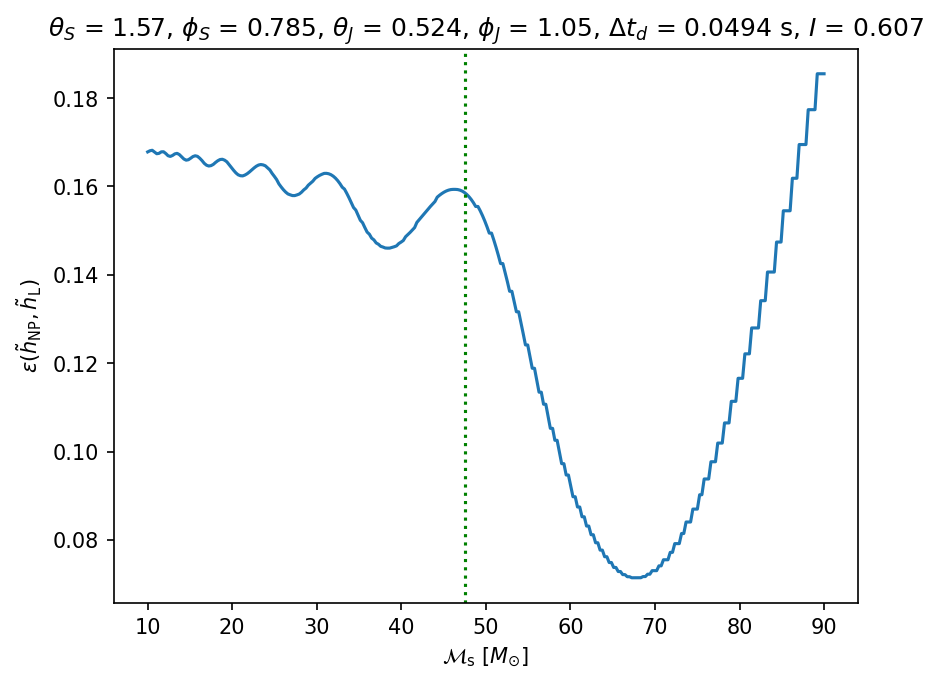

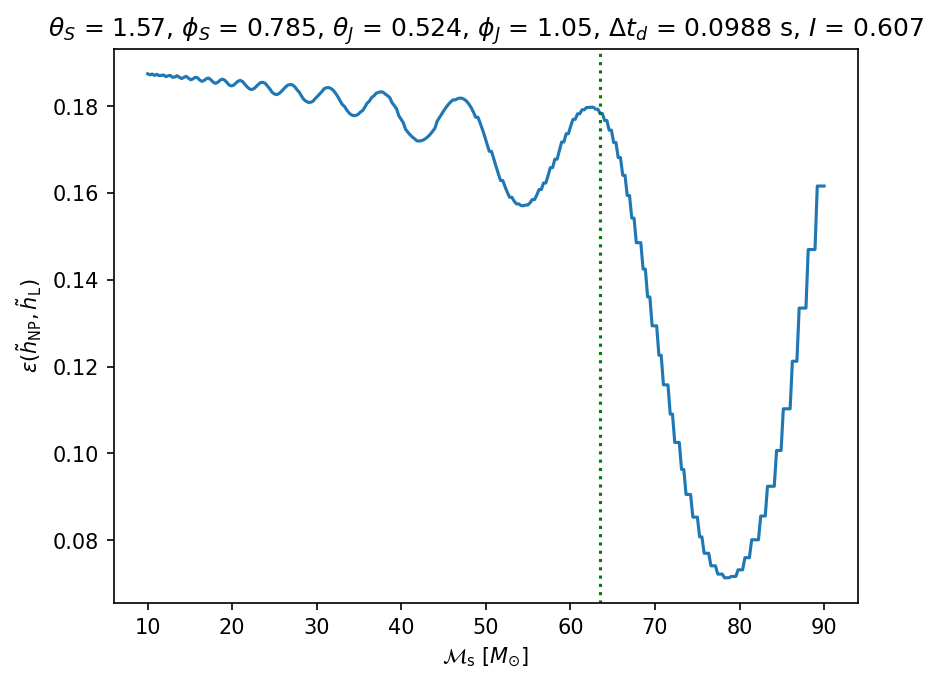

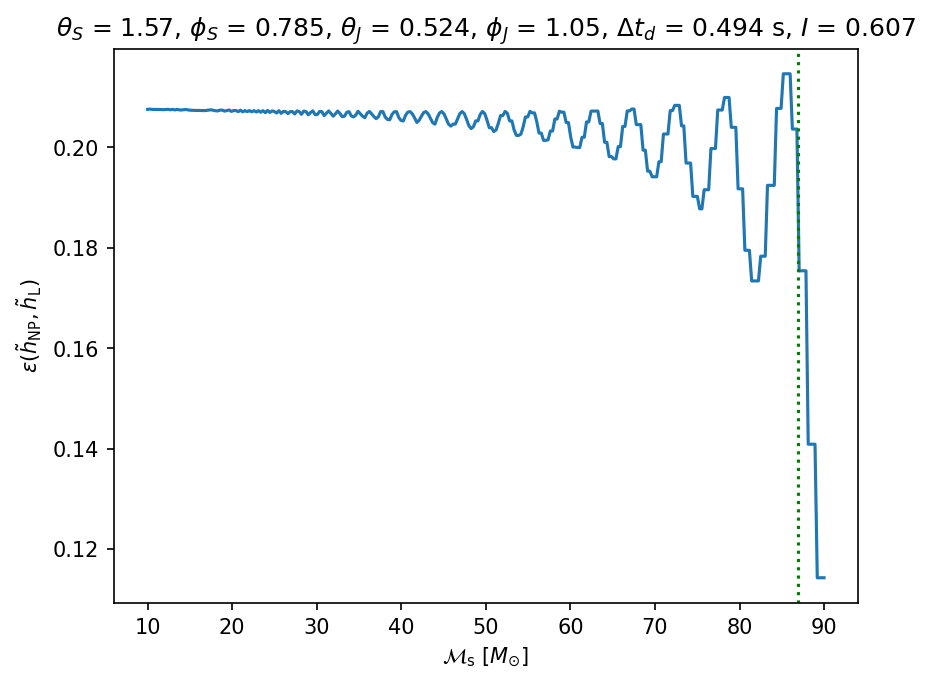

In [44]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

MLz_range = np.array([1e3, 2e3, 2500, 3e3, 3500, 4e3, 4500, 5e3, 1e4, 5e4])
mismatch_plots_dict = {}

for MLz in MLz_range:
    lens_params["MLz"] = MLz * solar_mass
    est_mismatch_plot4()
    plt.show()

# explore $t_c$ and $\phi_c$

In [14]:
def optimize_mismatch_tc(params1, params2, use_optimized_match=True):
    tc_arr = np.linspace(0, 4, 300)
    ep_arr = np.zeros(len(tc_arr))
    idx_arr = np.zeros(len(tc_arr))
    phi_arr = np.zeros(len(tc_arr))

    for i, tc in enumerate(tc_arr):
        params1["t_c"] = tc
        mismatch_results = mismatch_general(params1, params2, use_optimized_match=use_optimized_match)
        ep_arr[i] = np.around(mismatch_results["mismatch"], decimals=4)
        idx_arr[i] = mismatch_results["index"]
        phi_arr[i] = mismatch_results["phi"]

    return {"tc_arr": tc_arr, "ep_arr": ep_arr, "idx_arr": idx_arr, "phi_arr": phi_arr}

In [15]:
def optimize_mismatch_phi_c(params1, params2, use_optimized_match=True):
    phi_c_arr = np.linspace(-np.pi, np.pi, 300)
    ep_arr = np.zeros(len(phi_c_arr))
    idx_arr = np.zeros(len(phi_c_arr))
    phi_arr = np.zeros(len(phi_c_arr))

    for i, phi_c in enumerate(phi_c_arr):
        params1["phi_c"] = phi_c
        mismatch_results = mismatch_general(params1, params2, use_optimized_match=use_optimized_match)
        ep_arr[i] = np.around(mismatch_results["mismatch"], decimals=4)
        idx_arr[i] = mismatch_results["index"]
        phi_arr[i] = mismatch_results["phi"]

    return {"phi_c_arr": phi_c_arr, "ep_arr": ep_arr, "idx_arr": idx_arr, "phi_arr": phi_arr}

In [7]:
lens_params, RP_params, NP_params = set_to_params(lens_params_1, RP_params_1, NP_params_1)

RP_params["omega_tilde"] = 2.23
RP_params["theta_tilde"] = 8

results = optimize_mismatch_gammaP_general(RP_params, lens_params, use_optimized_match=True)
print(results)
RP_params["gamma_P"] = results["ep_min_gamma"]

{'ep_min': 0.04558908171657705, 'ep_min_gamma': 4.823455387329783, 'ep_min_idx': 603.2349407976188, 'ep_min_phi': -1.5387571086310003, 'ep_max': 0.49736183499389075, 'ep_max_gamma': 1.3962634015954636, 'ep_max_idx': 1.0183273000819966, 'ep_max_phi': -3.0463712512017453, 'ep_0': 0.22348650024818983, 'ep_0_ind': 602.8762970948394, 'ep_0_phi': -0.9392223091093947}


# waveform comparison

In [27]:
def find_optimized_params(t_params, s_params, opt_match=True):
    gammaP_results = optimize_mismatch_gammaP_general(t_params, s_params, use_optimized_match=opt_match)
    
    t_params["gamma_P"] = gammaP_results["ep_min_gamma"]
    ep_min_idx = gammaP_results["ep_min_idx"]

    delta_t = get_gw(s_params)["waveform"].delta_t
    t_params["t_c"] = t_params["t_c"] - ep_min_idx * delta_t
    
    mismatch_results1 = mismatch_general(t_params, s_params, use_optimized_match=opt_match)
    # testing
    updated_idx = mismatch_results1["index"] # testing
    t_params["t_c"] = t_params["t_c"] - updated_idx * delta_t # testing

    mismatch_results2 = mismatch_general(t_params, s_params, use_optimized_match=opt_match) # testing
    phi = mismatch_results2["phi"] # testing
    t_params["phi_c"] = phi

    updated_mismatch_results = mismatch_general(t_params, s_params, use_optimized_match=opt_match)

    return {"updated_t_params": t_params, "updated_s_params": s_params, "updated_mismatch_results": updated_mismatch_results}

In [28]:
from scipy.signal import argrelextrema
def waveform_comparison(t_params, s_params, opt_match=True):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
    fig.subplots_adjust(wspace=0.25)

    updated_params = find_optimized_params(t_params, s_params, opt_match)
    t_params = updated_params["updated_t_params"]
    s_params = updated_params["updated_s_params"]
    epsilon = updated_params["updated_mismatch_results"]["mismatch"]
    idx = updated_params["updated_mismatch_results"]["index"]
    phi = updated_params["updated_mismatch_results"]["phi"]

    # template waveform
    t_gw = get_gw(t_params)
    t_phase = t_gw["phase"]

    axes[0].plot(t_gw["f_range"], np.abs(t_gw["waveform"]), label="template", color='black', linestyle='-')

    # source waveform
    s_gw = get_gw(s_params)
    s_phase = s_gw["phase"]

    axes[0].plot(s_gw["f_range"], np.abs(s_gw["waveform"]), label="source", color='black', linestyle='--')

    axes[0].legend(fontsize=20)
    axes[0].set_xlabel("f (Hz)", fontsize=24)
    axes[0].set_ylabel(r"$|\~{h}|$", fontsize=24)
    axes[0].tick_params(axis="both", which="major", labelsize=18)
    axes[0].set_title("Strain", fontsize=24)

    phase_diff = s_phase - t_phase
    # phase_diff = np.unwrap(phase_diff - phase_diff[0])
    phase_diff = np.unwrap(phase_diff)

    axes[1].plot(s_gw["f_range"], phase_diff, color='black', linestyle='-')

    # get Delta t_d and I
    lens_inst = LensingGeo(s_params)
    Delta_td = lens_inst.Delta_td()
    I = lens_inst.I()
    delta_t = t_gw["waveform"].delta_t
    t_c = idx * delta_t
    f_cut = lens_inst.f_cut()

    # plot one cycle
    f_cut_1cycle = 1/Delta_td + 20
    if f_cut_1cycle > f_cut:
        f_cut_1cycle = f_cut
    f_1cycle = np.arange(20, f_cut_1cycle, 0.25)
    s_gw_1cycle = np.abs(s_gw["waveform"][s_gw["f_range"] <= f_cut_1cycle])
    phase_diff_1cycle = phase_diff[s_gw["f_range"] <= f_cut_1cycle]
    # Find peaks
    strain_peaks_idx = argrelextrema(s_gw_1cycle, np.greater)[0]
    phase_diff_peaks_idx = argrelextrema(phase_diff_1cycle, np.greater)[0]
    # Find troughs
    strain_troughs_idx = argrelextrema(s_gw_1cycle, np.less)[0]
    phase_diff_troughs_idx = argrelextrema(phase_diff_1cycle, np.less)[0]
    # Find inflection points
    # Calculate first derivative
    strain_first_derivative = np.gradient(s_gw_1cycle)
    phase_diff_first_derivative = np.gradient(phase_diff_1cycle)
    # Calculate second derivative
    strain_second_derivative = np.gradient(strain_first_derivative)
    phase_diff_second_derivative = np.gradient(phase_diff_first_derivative)
    # Find where the second derivative changes sign
    strain_inflections_idx = np.where(np.diff(np.sign(strain_second_derivative)))[0]
    phase_diff_inflections_idx = np.where(np.diff(np.sign(phase_diff_second_derivative)))[0]
    
    # plot s_gw_1cycle["waveform"] and the peak, trough, and inflection point as red dots
    axes[0].plot(f_1cycle, s_gw_1cycle, 'r--', label="1 cycle of lensed")
    axes[0].plot(f_1cycle[strain_peaks_idx], s_gw_1cycle[strain_peaks_idx], 'r*')
    axes[0].plot(f_1cycle[strain_troughs_idx], s_gw_1cycle[strain_troughs_idx], 'r*')
    axes[0].plot(f_1cycle[strain_inflections_idx], s_gw_1cycle[strain_inflections_idx], 'r*')
    axes[0].legend()

    axes[1].plot(f_1cycle, phase_diff_1cycle, 'r-')
    axes[1].plot(f_1cycle[phase_diff_peaks_idx], phase_diff_1cycle[phase_diff_peaks_idx], 'r*', label="peak")
    axes[1].plot(f_1cycle[phase_diff_troughs_idx], phase_diff_1cycle[phase_diff_troughs_idx], 'r*', label="trough")
    axes[1].plot(f_1cycle[phase_diff_inflections_idx], phase_diff_1cycle[phase_diff_inflections_idx], 'r*', label="inflection")
    ############################################################################################################

    fig.suptitle(r"$\Delta t_d$ = {:.3g} s, $I$ = {:.3g}, $\epsilon = {:.3g}$, idx = {:.3g}, $\phi_c$ = {:.3g}".format(Delta_td, I, epsilon, idx, phi), fontsize=24, y=1.02)

    # axes[1].set_xscale("log")
    axes[1].set_xlabel("f (Hz)", fontsize=24)
    axes[1].set_ylabel(r"$\Phi_{\rm s} - \Phi_{\rm t}$ (rad)", fontsize=24)
    axes[1].tick_params(axis="both", which="major", labelsize=18)
    axes[1].set_title("Phase Difference", fontsize=24)

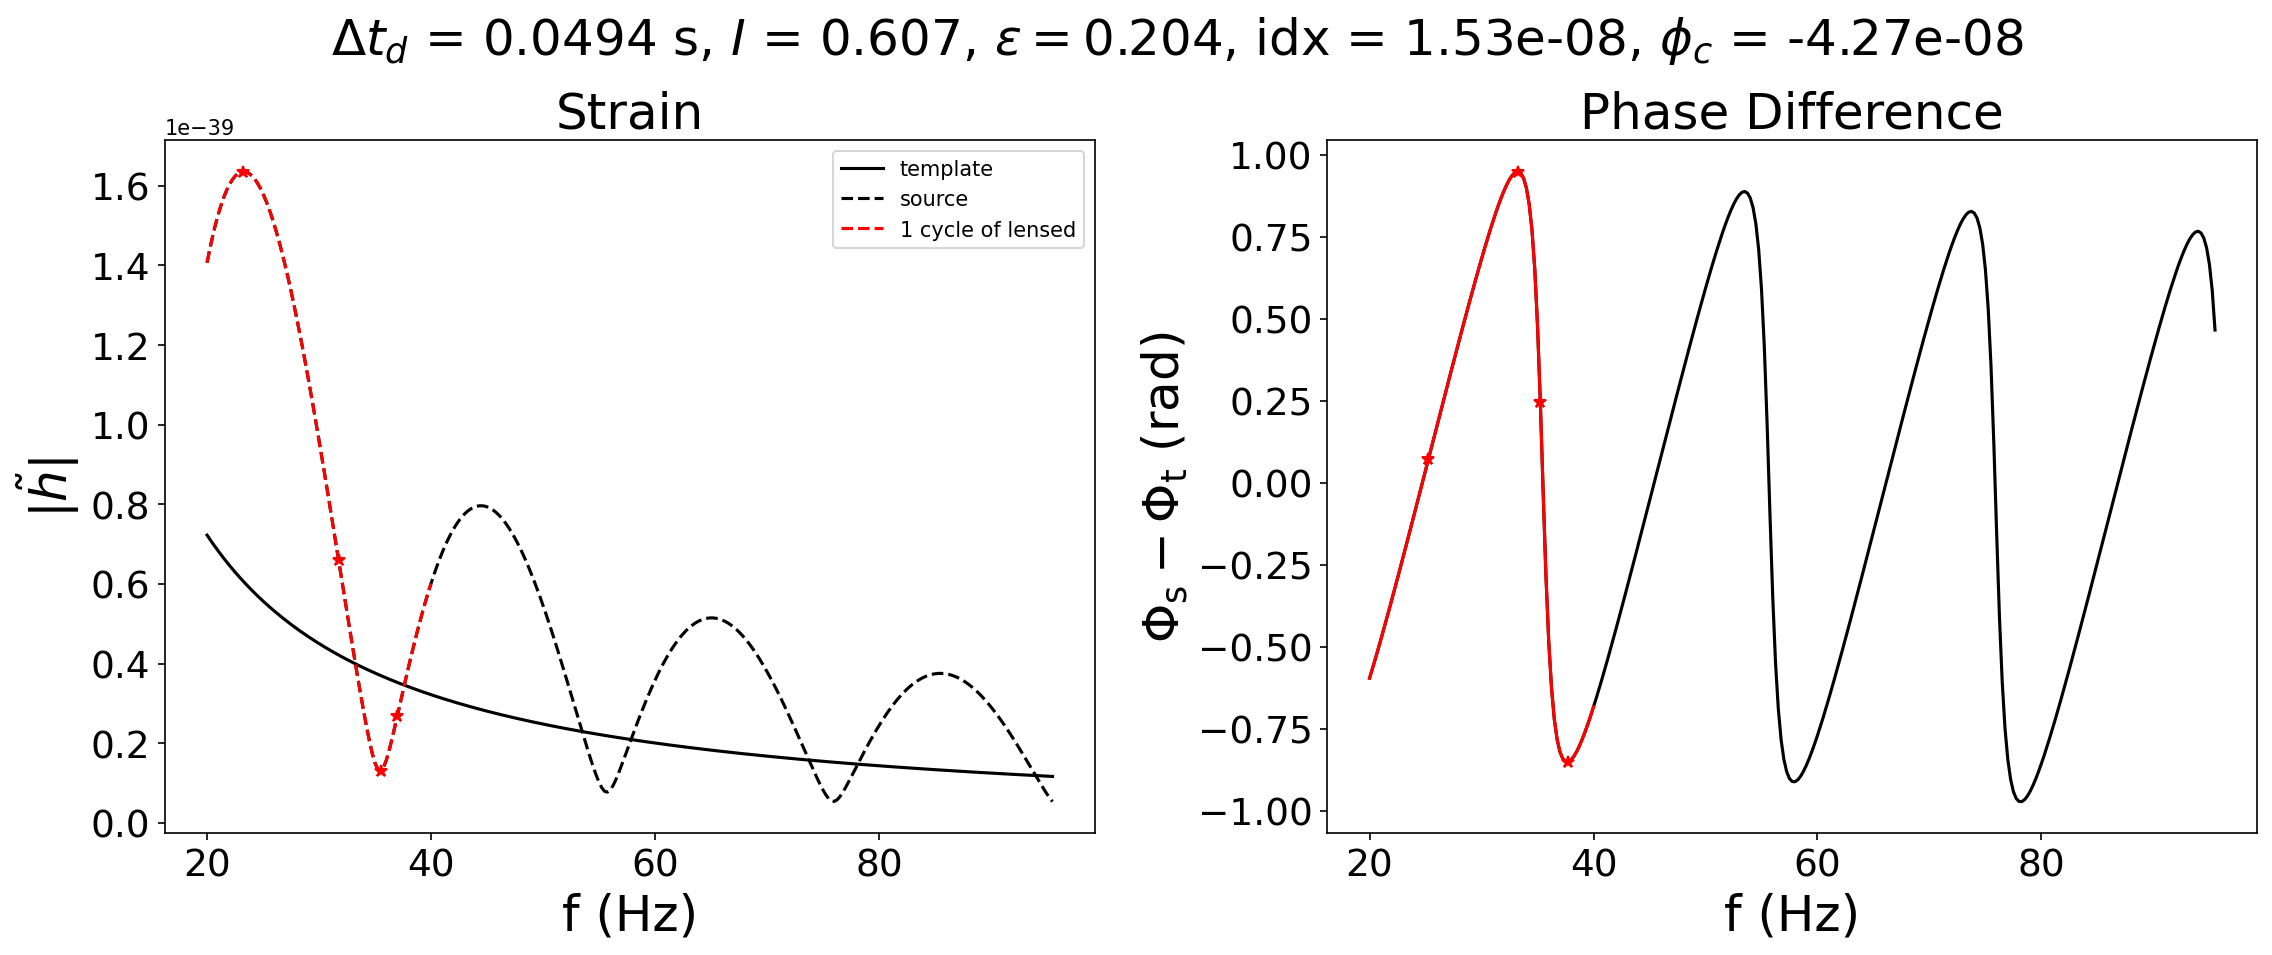

In [16]:
# testing

lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)

lens_params["MLz"] = 5000 * solar_mass
lens_params["mcz"] = NP_params["mcz"] = 20 * solar_mass

waveform_comparison(NP_params, lens_params, opt_match=True)

In [10]:
def waveform_comparison_slider(mcz):
    lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
    lens_params["MLz"] = 1000 * solar_mass
    lens_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    waveform_comparison(NP_params, lens_params, opt_match=True)

interact(waveform_comparison_slider, mcz=widgets.FloatSlider(min=10, max=90, step=0.5))

interactive(children=(FloatSlider(value=10.0, description='mcz', max=90.0, min=10.0, step=0.5), Output()), _do…

<function __main__.waveform_comparison_slider(mcz)>

In [14]:
def waveform_comparison_slider(mcz):
    lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
    lens_params["MLz"] = 2000 * solar_mass
    lens_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    waveform_comparison(NP_params, lens_params, opt_match=True)

interact(waveform_comparison_slider, mcz=widgets.FloatSlider(min=10, max=90, step=0.5))

interactive(children=(FloatSlider(value=10.0, description='mcz', max=90.0, min=10.0, step=0.5), Output()), _do…

<function __main__.waveform_comparison_slider(mcz)>

In [29]:
def waveform_comparison_slider(mcz):
    lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
    lens_params["MLz"] = 3000 * solar_mass
    lens_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    waveform_comparison(NP_params, lens_params, opt_match=True)

interact(waveform_comparison_slider, mcz=widgets.FloatSlider(min=10, max=90, step=0.5))

interactive(children=(FloatSlider(value=10.0, description='mcz', max=90.0, min=10.0, step=0.5), Output()), _do…

<function __main__.waveform_comparison_slider(mcz)>

In [13]:
def waveform_comparison_slider(mcz):
    lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
    lens_params["MLz"] = 4000 * solar_mass
    lens_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    waveform_comparison(NP_params, lens_params, opt_match=True)

interact(waveform_comparison_slider, mcz=widgets.FloatSlider(min=10, max=90, step=0.5))

interactive(children=(FloatSlider(value=10.0, description='mcz', max=90.0, min=10.0, step=0.5), Output()), _do…

<function __main__.waveform_comparison_slider(mcz)>

In [33]:
def waveform_comparison_slider(mcz):
    lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
    lens_params["MLz"] = 5000 * solar_mass
    lens_params["mcz"] = NP_params["mcz"] = mcz * solar_mass
    waveform_comparison(NP_params, lens_params, opt_match=True)

interact(waveform_comparison_slider, mcz=widgets.FloatSlider(min=10, max=90, step=0.5))

interactive(children=(FloatSlider(value=10.0, description='mcz', max=90.0, min=10.0, step=0.5), Output()), _do…

<function __main__.waveform_comparison_slider(mcz)>

[27.67068273 27.99196787 28.31325301 28.63453815 28.95582329 29.27710843
 29.59839357 29.91967871 30.24096386 30.562249   30.88353414 37.95180723
 38.27309237 38.59437751 38.91566265 39.23694779 39.55823293 39.87951807
 40.20080321 40.52208835 40.84337349 41.16465863 41.48594378 41.80722892
 42.12851406 42.4497992  42.77108434 43.09236948 43.41365462 43.73493976]


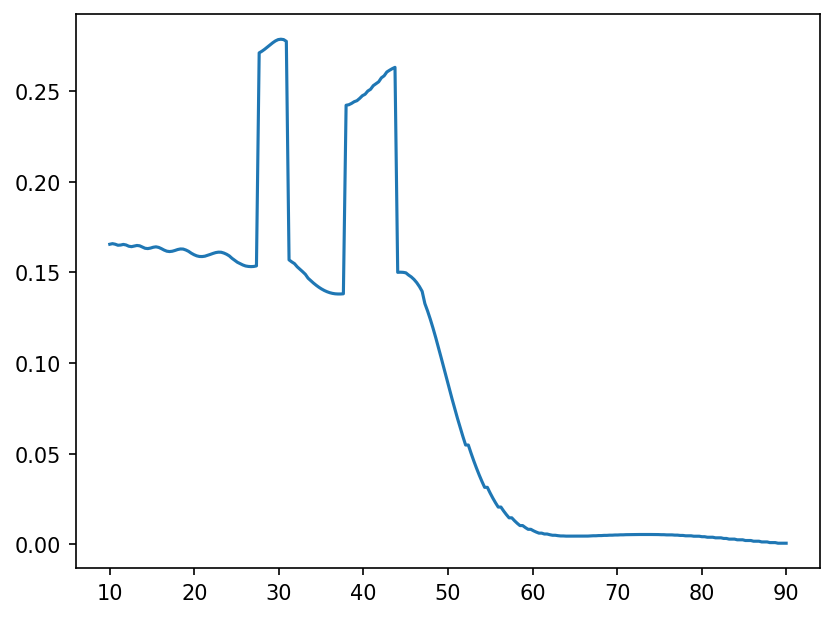

In [32]:
lens_params, NP_params = set_to_params(lens_params_1, NP_params_1)
MLz = 5000
lens_params["MLz"] = MLz * solar_mass # type: ignore
lens_inst = LensingGeo(lens_params)
Delta_td = lens_inst.Delta_td()
mcz_vertical = (0.25 ** (3 / 5)) / (6 ** (3 / 2) * np.pi * (20 + 1 / Delta_td)) / solar_mass
# get ep_NP_L_arr for mcz_L_arr > mcz_vertical in mismatch_plots_dict
ep_NP_L_arr = mismatch_plots_dict[MLz]["ep_NP_L_arr"]
mcz_L_arr = mismatch_plots_dict[MLz]["mcz_L_arr"]
mcz_L_arr_filtered = mcz_L_arr[mcz_L_arr > mcz_vertical]
ep_NP_L_arr_filtered = ep_NP_L_arr[mcz_L_arr > mcz_vertical]

# # find peaks and troughs in ep_NP_L_arr_filtered
# peaks_idx = argrelextrema(ep_NP_L_arr_filtered, np.greater)[0]
# troughs_idx = argrelextrema(ep_NP_L_arr_filtered, np.less)[0]
# print(ep_NP_L_arr_filtered[peaks_idx])
# print(ep_NP_L_arr_filtered[troughs_idx])
# print(mcz_L_arr_filtered[peaks_idx])
# print(mcz_L_arr_filtered[troughs_idx])